# Road Traffic Accident Identification & Severity Classification
by M Arif Rahman

## Context & Objective
__Context__: After collecting number of road traffic accident recorded in X city, as a data scientist in a government institution, you finally came up to analyze the records to find the causes of accidents on the road. Besides that, you might want to predict the severity of accidents based on the records for emergency response, so when there's an accident happened, the response team can **quickly** guesses the severity of an accident to plan how many rescue force and equipment are needed, such as helicopter rescue, based on the information collected from the calls.

__Theoretical Basis__: Based on World Health Organization (WHO), the speed of vehicle is the core of road accidents problem. Speeding influences both crash risk and its consequence. This factor is also influenced by many factors, divided into four group: 
1. Road related, such as the road width, alignment, layout, surroundings, markings, surface quality;
2. Vehicle related, such as vehicle type, condition, and speed;
3. Environment related, such as weather, surface condition, lighting, signs, zones, law, and speed limit;
4. Driver related, such as age, sex, attitudes, fatigue, alcohol level, ownership of vehicle, hazard perception, and reaction time.

Factors that contribute to the level severity of a crash include:
1. Protective devices and gears on vehicle, such as airbags, seat belts, helmets, vehicle type, quality, maintenance, etc.;
2. Roadside hazards, such as trees, poles, fences, sidewalk protections, etc.;
3. Driver behaviour, such as driving attitude, speed, and presence of alcohol.

Source: [World report on road traffic injury prevention](https://iris.who.int/bitstream/handle/10665/42871/9241562609.pdf?sequence=1)

__Objective__: 
- Get insights the major reasons that causes the road accidents based on the dataset, to prove the theory.
- Predicts the accidental severity as target using a quick machine learning classification model.

## A. Import and Inspect Dataset

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.colors
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [3]:
accident = pd.read_csv('RTA Dataset.csv')
accident.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  \
0            Owner              Above 10yr         No defect   
1            Owner                 5-10yrs         No defect   
2            Owner                     NaN         No defect   
3     Governmental                     NaN         No defect   
4            Owner                 5-10yrs         No defect   

  Area_accident_occured   Lanes_or_Medians  \
0     Residential areas                NaN   
1          Office areas  Undivided Two way   
2    Recreational areas              other   
3          Office areas              other   
4      Industrial areas              other   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                                            NaN       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads                     Dry  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0                            2                     2   Going straight   
1                            2                     2   Going straight   
2                            2                     2   Going straight   
3                            2                     2   Going straight   
4                            2                     2   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestri

In [4]:
accident.shape

(12316, 32)

In [5]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
accident.duplicated().sum()

0

In [7]:
accident.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [8]:
print('Percentage of NaN in:')
for i in accident.columns.to_list():
    print(f'{i:<30} {100*(1-(accident[i].count()/accident.Time.count())):.3f}%')

Percentage of NaN in:
Time                           0.000%
Day_of_week                    0.000%
Age_band_of_driver             0.000%
Sex_of_driver                  0.000%
Educational_level              6.017%
Vehicle_driver_relation        4.701%
Driving_experience             6.731%
Type_of_vehicle                7.714%
Owner_of_vehicle               3.914%
Service_year_of_vehicle        31.893%
Defect_of_vehicle              35.945%
Area_accident_occured          1.941%
Lanes_or_Medians               3.126%
Road_allignment                1.153%
Types_of_Junction              7.202%
Road_surface_type              1.397%
Road_surface_conditions        0.000%
Light_conditions               0.000%
Weather_conditions             0.000%
Type_of_collision              1.259%
Number_of_vehicles_involved    0.000%
Number_of_casualties           0.000%
Vehicle_movement               2.501%
Casualty_class                 0.000%
Sex_of_casualty                0.000%
Age_band_of_casualty      

In [9]:
print(accident['Area_accident_occured'].value_counts())
print()
print(accident['Weather_conditions'].value_counts())

Area_accident_occured
Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64

Weather_conditions
Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: count, dtype: int64


In [10]:
accident_no_NA = accident.drop(columns= ['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality'])
accident_no_NA.dropna(inplace=True)
print(f'After droping features with <10% NAs')
print(f'Rows remaining: {accident_no_NA.shape[0]:>21} rows')
print(f'Rows remaining (in percentage): {100*accident_no_NA.shape[0]/accident.Time.count():>7.3f}%')

After droping features with <10% NAs
Rows remaining:                  8439 rows
Rows remaining (in percentage):  68.521%


From the inspection, we can conclude that:
1. All of the features are categorical, while the numerical is and ordinal data. Some are ordinal categories.
2. There are no duplicates.
3. 4 features have >20% of missing values, such as Service_year_of_vehicle, Defect_of_vehicle, Work_of_casuality, Fitness_of_casuality.
4. 12 features have a small number of missing values, with <10% of NAs.
5. If we just drop all NAs on features with <10% of NAs, dropped whole feature with >20% NAs, we dropped 31.48% of the dataset, which is pretty big.
6. If we check some of the features, for example in Weather_conditions, it has a variable of Unknown, which is the same as NA, because we don't know where unknown and NA belongs to between the categories. It can be seen into 2 interpretations, There are more NAs in this dataset, or there are more Unknown/Other variables in these features.
7. From two point above (point 5 and 6), we can consider imputate some NAs into Unknown/Others.
8. Area_accident_occured variables are not clean or in the same format (i.e. leading whitespaces)
9. Type_of_vehicle have a quite naming error (i.e. Lorry (11?40Q)), we can fix the format into appropiate vehicle naming, such as Lorry (11-40Q)
10. Time dataset are considered as string, convert it into time dtypes.

## B. Dataset Cleaning

### 1. Fixing the Format

In [11]:
# clean Area_accident_occured value formatting (inspection result no. 7)
accident['Area_accident_occured'] = accident['Area_accident_occured'].str.strip()

# there are still error with merged place name (Rural village areasOffice areas)
accident = accident[accident['Area_accident_occured'] != 'Rural village areasOffice areas']
accident['Area_accident_occured'].value_counts()

Area_accident_occured
Other                  3819
Office areas           3451
Residential areas      2060
Church areas           1060
Industrial areas        456
School areas            415
Recreational areas      328
Outside rural areas     218
Hospital areas          121
Market areas             63
Rural village areas      44
Unknown                  22
Name: count, dtype: int64

In [12]:
# change ? to strip (-)
accident['Type_of_vehicle'] = accident['Type_of_vehicle'].str.strip()

accident['Type_of_vehicle'].mask(accident['Type_of_vehicle'] == 'Lorry (41?100Q)', 'Lorry (41-100Q)', inplace=True)
accident['Type_of_vehicle'].mask(accident['Type_of_vehicle'] == 'Lorry (11?40Q)', 'Lorry (11-40Q)', inplace=True)
accident['Type_of_vehicle'].mask(accident['Type_of_vehicle'] == 'Public (13?45 seats)', 'Public (13-45 seats)', inplace=True)

In [13]:
# before we imputate NAs into Unknown/Others and merge it, we need to make Unknowns and Other values into the same format
accident['Driving_experience'].mask(accident['Driving_experience'] == 'unknown', 'Unknown', inplace=True)
accident['Lanes_or_Medians'].mask(accident['Lanes_or_Medians'] == 'other', 'Other', inplace=True)

### 2. NA Imputation

To avoid confusion between Unknown and Other, we can merge these two values because these values happens because we we don't know where Unknown, Other, and NA belongs to between the categories. This is the mapping for masking:

- Defect_of_vehicle         | 35.95% | NA -> Unknown
- Road_allignment           | 1.153% | NA -> Other
- Educational_level         | 6.017% | NA/Unknown -> Unknown
- Driving_experience        | 6.731% | NA/unknown -> Unknown
- Service_year_of_vehicle   | 31.89% | NA/Unknown -> Unknown
- Type_of_vehicle           | 7.714% | NA/Other -> Other
- Owner_of_vehicle          | 3.914% | NA/Other -> Other
- Road_surface_type         | 1.397% | NA/Other -> Other
- Area_accident_occured     | 1.941% | NA/Unknown/Other -> Other
- Lanes_or_Medians          | 3.126% | NA/Unknown/other -> Other
- Types_of_Junction         | 7.202% | NA/Unknown/Other -> Other
- Type_of_collision         | 1.259% | NA/Unknown/Other -> Other
- Vehicle_movement          | 2.501% | NA/Unknown/Other -> Other
- Cause_of_accident         | 0.000% | Unknown/Other -> Other
- Weather_conditions        | 0.000% | Unknown/Other -> Other

In [14]:
# to avoid confusion between Unknown and Other, we can merge these two values because these values 
# happens because we we don't know where Unknown, Other, and NA belongs to between the categories.
NA_other = ['Type_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction', 'Type_of_collision', 'Vehicle_movement', 'Owner_of_vehicle', 'Road_surface_type', 'Road_allignment'] # from NA to Other
NA_unknown = ['Educational_level', 'Driving_experience', 'Service_year_of_vehicle', 'Defect_of_vehicle'] # from NA to Unknown
unknown_other = ['Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction', 'Type_of_collision', 'Vehicle_movement', 'Cause_of_accident', 'Weather_conditions'] # from Unknown to Other

# fill NAs
accident[NA_other] = accident[NA_other].fillna('Other')
accident[NA_unknown] = accident[NA_unknown].fillna('Unknown')

# Transform Unknow to Other
accident[unknown_other] = accident[unknown_other].mask(accident[unknown_other] == 'Unknown', 'Other')
accident[['Casualty_class', 'Sex_of_casualty']] = accident[['Casualty_class', 'Sex_of_casualty']].mask(accident[['Casualty_class', 'Sex_of_casualty']] == 'na', 'NA')
accident[['Age_band_of_casualty', 'Casualty_severity']] = accident[['Age_band_of_casualty', 'Casualty_severity']].mask(accident[['Age_band_of_casualty', 'Casualty_severity']] == 'na', 'NA')

In [15]:
accident.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation         578
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle           0
Defect_of_vehicle                 0
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction                 0
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision                 0
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                  0
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

### 3. Transform Dtype

In [16]:
accident['Time'] = pd.to_datetime(accident['Time'])

C:\Users\M Arif Rahman\AppData\Local\Temp\ipykernel_21484\2791194737.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accident['Time'] = pd.to_datetime(accident['Time'])


## C. Exploratory Data Analysis (EDA)

In [17]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12296 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12296 non-null  datetime64[ns]
 1   Day_of_week                  12296 non-null  object        
 2   Age_band_of_driver           12296 non-null  object        
 3   Sex_of_driver                12296 non-null  object        
 4   Educational_level            12296 non-null  object        
 5   Vehicle_driver_relation      11718 non-null  object        
 6   Driving_experience           12296 non-null  object        
 7   Type_of_vehicle              12296 non-null  object        
 8   Owner_of_vehicle             12296 non-null  object        
 9   Service_year_of_vehicle      12296 non-null  object        
 10  Defect_of_vehicle            12296 non-null  object        
 11  Area_accident_occured        12296 non-null  o

If we compare the theoretical basis with the dataset features, we can segments it into 2 parts:
1. Causes, the factors that influence road traffic accidents, includes:<br> 
->Road related: <br>`[Lanes_or_Medians, Road_allignment, Types_of_Junction, Road_surface_type]`<br> 
->Vehicle related: <br>
`[Type_of_vehicle, Service_year_of_vehicle, Defect_of_vehicle, Vehicle_movement]`<br>
->Environment related: <br>`[Time, Day_of_week, Road_surface_conditions, Light_conditions, Weather_conditions, Area_accident_occured]`<br>
->Driver Related: <br>`[Age_band_of_driver, Sex_of_driver, Educational_level, Driving_experience,  Owner_of_vehicle, Cause_of_accident]`

2. Effect, the consequences of the accident, includes in the remaining of the features: <br>
`[Type_of_collision, Number_of_vehicles_involved, Number_of_casualties, Casualty_class, Age_band_of_casualty, Sex_of_casualty, Casualty_severity, Accident_severity]`

There are features that doesn't seems give any help to the analysis or cannot fit into any groups, such as `[Vehicle_driver_relation, Work_of_casuality, Fitness_of_casuality, Pedestian_movement]`. Besides, some of these features have quite some NAs so we can just drop it instead.

In [18]:
# drop mentioned columns above
accident = accident.drop(columns= ['Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement'])

In [19]:
accident.to_csv('RTA_cleaned.csv', index=False)

### 1. Category Distribution Analysis
Since there is no continuous data in this dataset, we can skip outliers detection and continue to plot categorical distribution of each category (Road-Vehicle related, driver related, etc.)

#### Distribution Analysis Preparation

In [20]:
# Defines group categories
road = ['Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type']
vehicle = ['Type_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Vehicle_movement']
environment = ['Day_of_week', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Area_accident_occured']
driver = ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Driving_experience',  'Owner_of_vehicle', 'Cause_of_accident']

consequences = ['Type_of_collision', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Casualty_class', 'Age_band_of_casualty', 'Sex_of_casualty', 'Accident_severity']

In [21]:
# Since the values in int features (Number_of_vehicles_involved, Number_of_casualties) are
# categories, we can just transform these into string
accident[['Number_of_vehicles_involved', 'Number_of_casualties']] = accident[['Number_of_vehicles_involved', 'Number_of_casualties']].astype(str)

In [22]:
# create groupby iteration, so the visualization will be ordered descending
categories = [road, vehicle, environment, driver, consequences]

for i in categories:
    for j in i:
        globals()['table_%s' %j] = accident.groupby([j])['Time'].count().sort_values(ascending=False).reset_index().rename(columns={'Time':'count'})

In [23]:
# Defines groupby categories again that was created before. NOTE: must run the i j iteration first!
road_tables = [table_Lanes_or_Medians, table_Road_allignment, table_Types_of_Junction, table_Road_surface_type] # type: ignore
vehicle_tables = [table_Type_of_vehicle, table_Service_year_of_vehicle, table_Defect_of_vehicle, table_Vehicle_movement] # type: ignore
environment_tables = [table_Day_of_week, table_Road_surface_conditions, table_Light_conditions, table_Weather_conditions, table_Area_accident_occured] # type: ignore
driver_tables = [table_Age_band_of_driver, table_Sex_of_driver, table_Educational_level, table_Driving_experience,  table_Owner_of_vehicle, table_Cause_of_accident] # type: ignore

consequences_tables = [table_Type_of_collision, table_Number_of_vehicles_involved, table_Number_of_casualties, table_Casualty_class, table_Age_band_of_casualty, table_Sex_of_casualty, table_Accident_severity] # type: ignore

#### Road Category Distribution

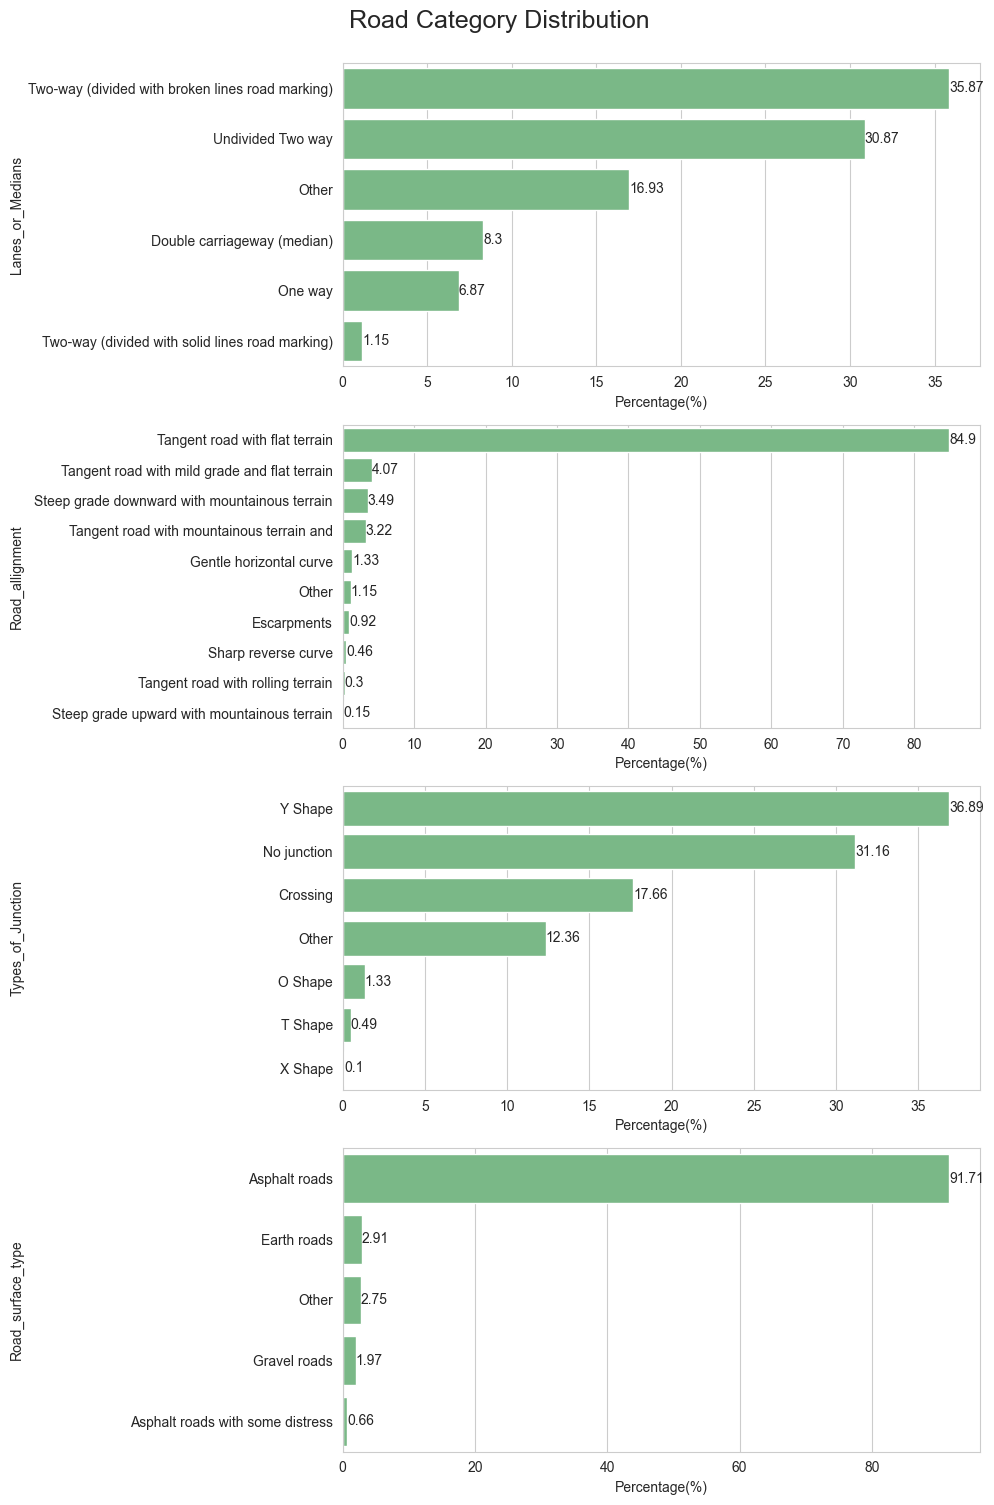

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,15), dpi=100)
plt.suptitle('Road Category Distribution', y = 1, fontsize = 18)
for i in range(0, len(road_tables)):
    plt.subplot(4, 1, i+1)
    ax = sns.barplot(
        y = road_tables[i][road[i]],
        x = 100*(round(road_tables[i]['count'] / road_tables[i]['count'].sum(),4)),
        width=0.8,
        color='#6FC381'
    )
    for container in ax.containers:
        ax.bar_label(container) # type: ignore
    ax.yaxis.set_label_coords(-0.5,0.5)
    plt.tight_layout()
    plt.xlabel('Percentage(%)')
plt.show()

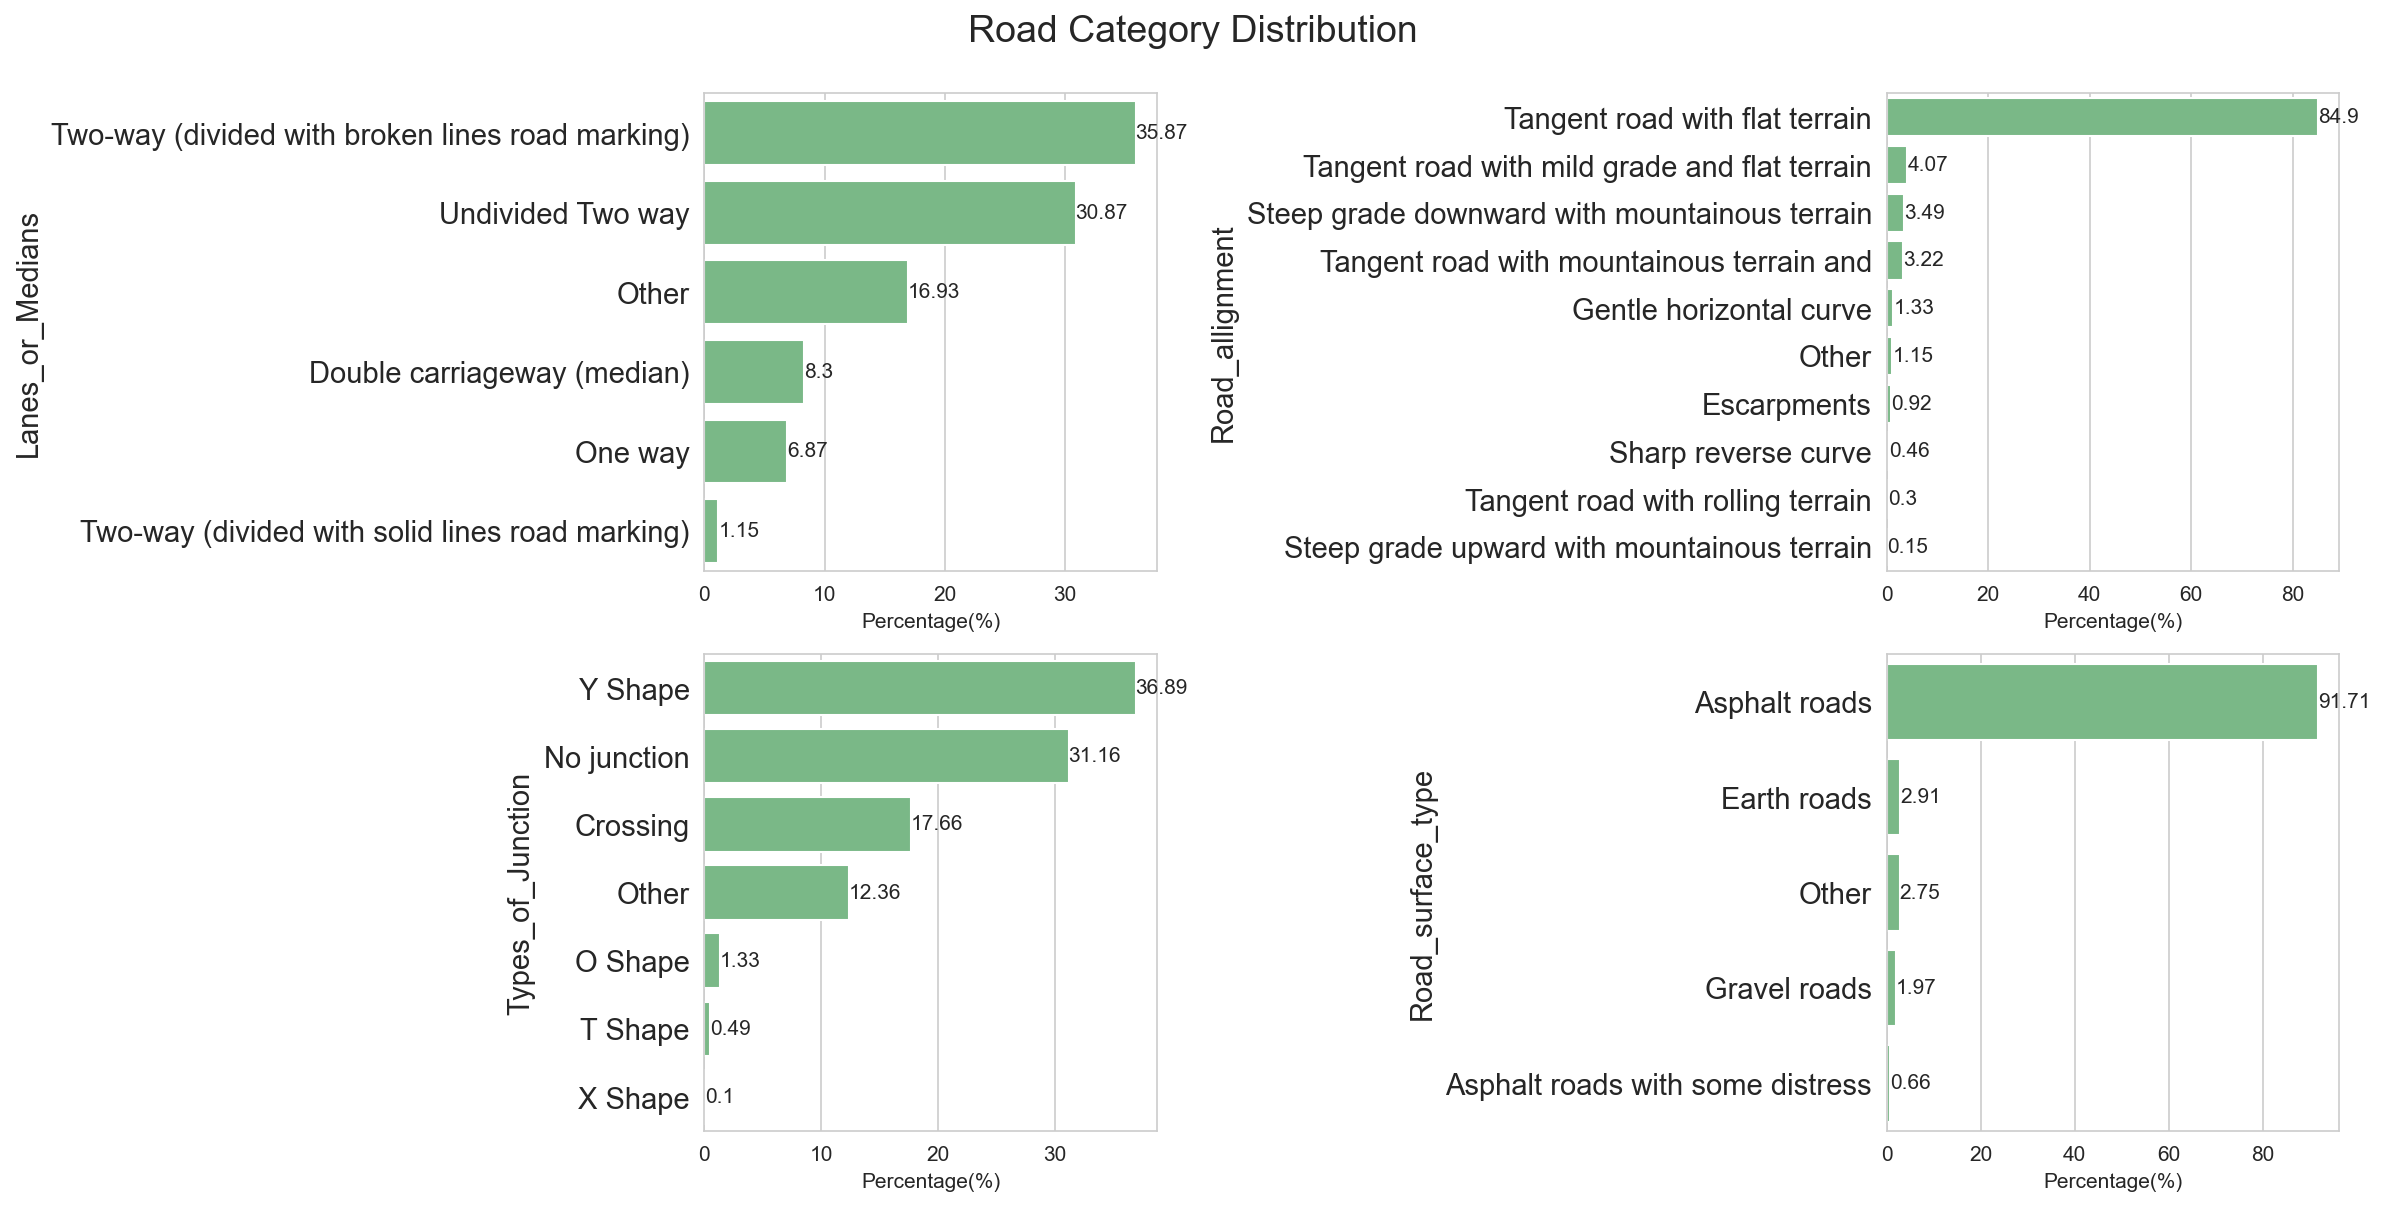

In [25]:
# PPT Format
sns.set_style('whitegrid')
plt.figure(figsize=(16,8), dpi=150)
plt.suptitle('Road Category Distribution', y = 1, fontsize = 18)
for i in range(0, len(road_tables)):
    plt.subplot(2, 2, i+1)
    ax = sns.barplot(
        y = road_tables[i][road[i]],
        x = 100*(round(road_tables[i]['count'] / road_tables[i]['count'].sum(),4)),
        width=0.8,
        color='#6FC381'
    )
    for container in ax.containers:
        ax.bar_label(container) # type: ignore
    plt.yticks(fontsize = 14)
    plt.ylabel(ylabel = road[i], fontsize = 14)
    plt.tight_layout()
    plt.xlabel('Percentage(%)')
plt.show()

Road Category Interpretation:
- On `Lanes_or_Medians`, Two ways road without proper markings (undivided/broken line markings) influence highly to road traffic accidents.
- On `Road_allignment`, Tangent/straight road influences highly to road traffic accidents, followed by steep downward road
- On `Types_of_junction`, no junction, Y junction, and plus (+) crossing influence accidents
- On `Road_surface_type`, Asphalt roads influence highly to the road traffic accidents.

Straight, clean road surface tends to encourage drivers to increase their speed while driving. Supported by broken markings and/or undivided roads, crash risk increases as speed of vehicle increases (WHO). These information can be enriched with another category, especially environment and cause of accident.

#### Vehicle Category Distribution

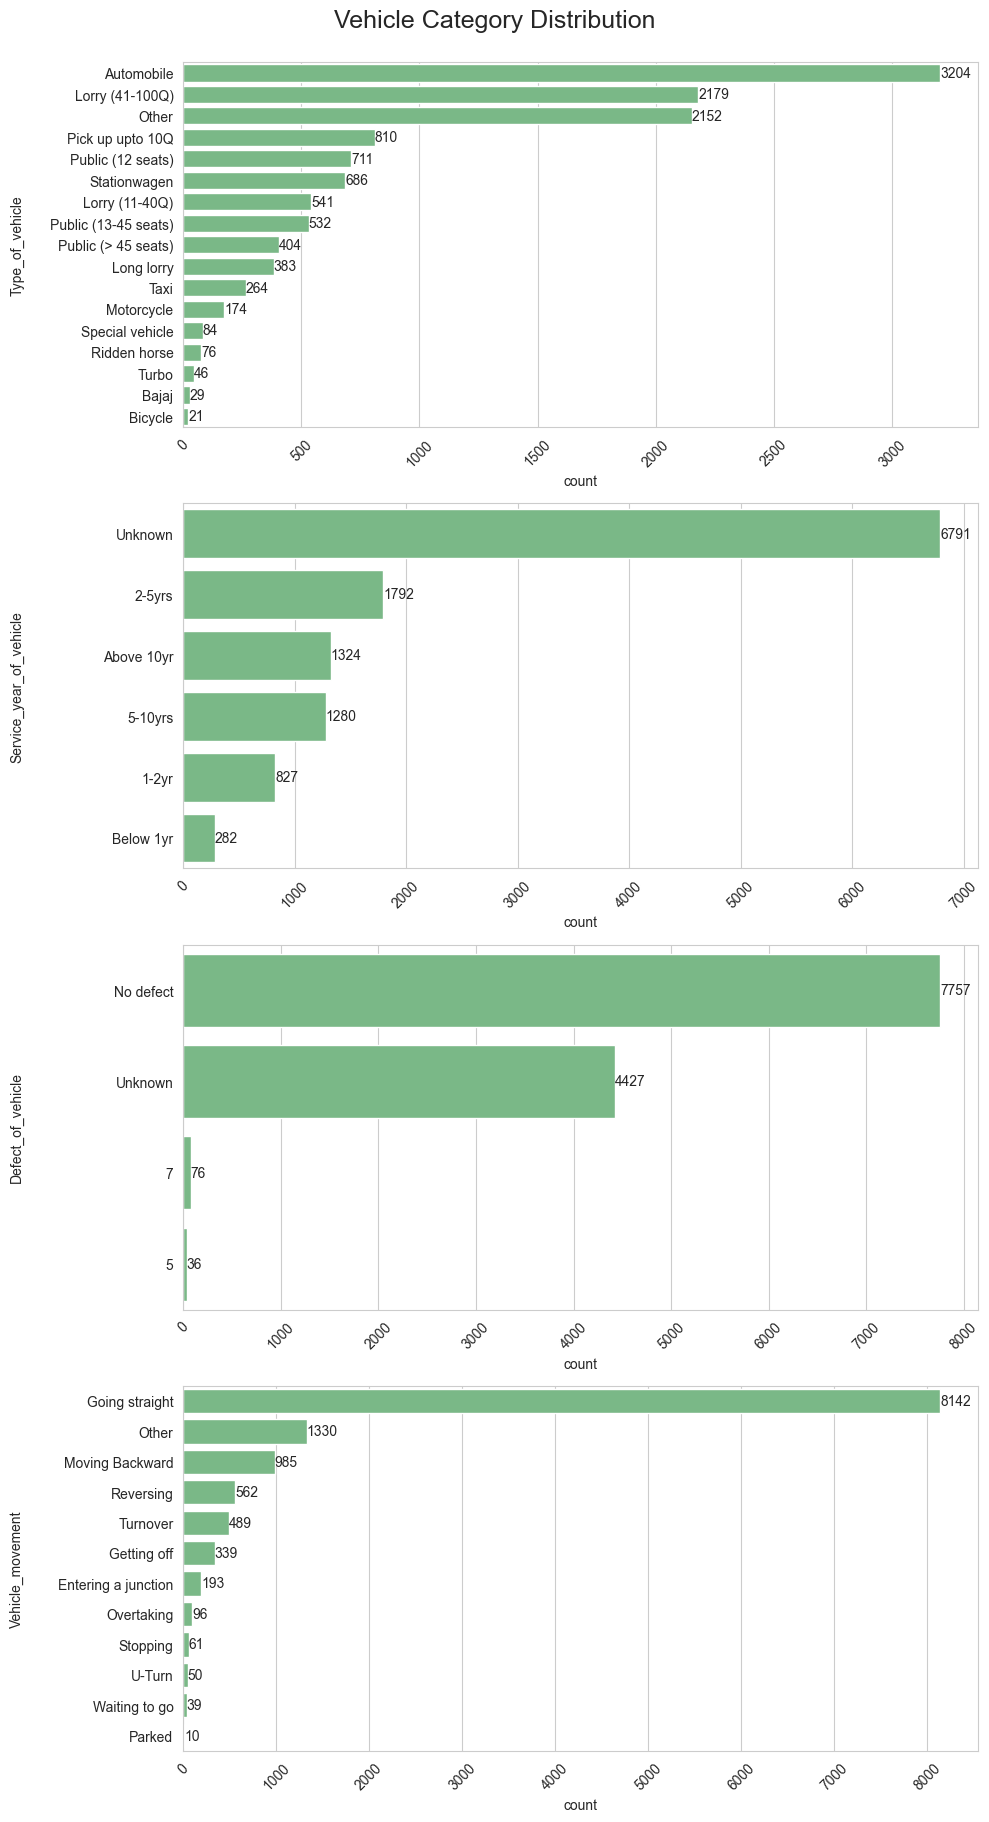

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,18), dpi=100)
plt.suptitle('Vehicle Category Distribution', y = 1, fontsize = 18)
for i in range(0, len(vehicle)):
    plt.subplot(len(vehicle), 1, i+1)
    ax = sns.barplot(
        y = vehicle_tables[i][vehicle[i]],
        x = vehicle_tables[i]['count'],
        color = '#6FC381',
        width=0.8
    )
    for container in ax.containers:
        ax.bar_label(container) # type: ignore
    ax.yaxis.set_label_coords(-0.2,0.5)
    plt.tight_layout()
    plt.xticks(rotation = 45)
plt.show()

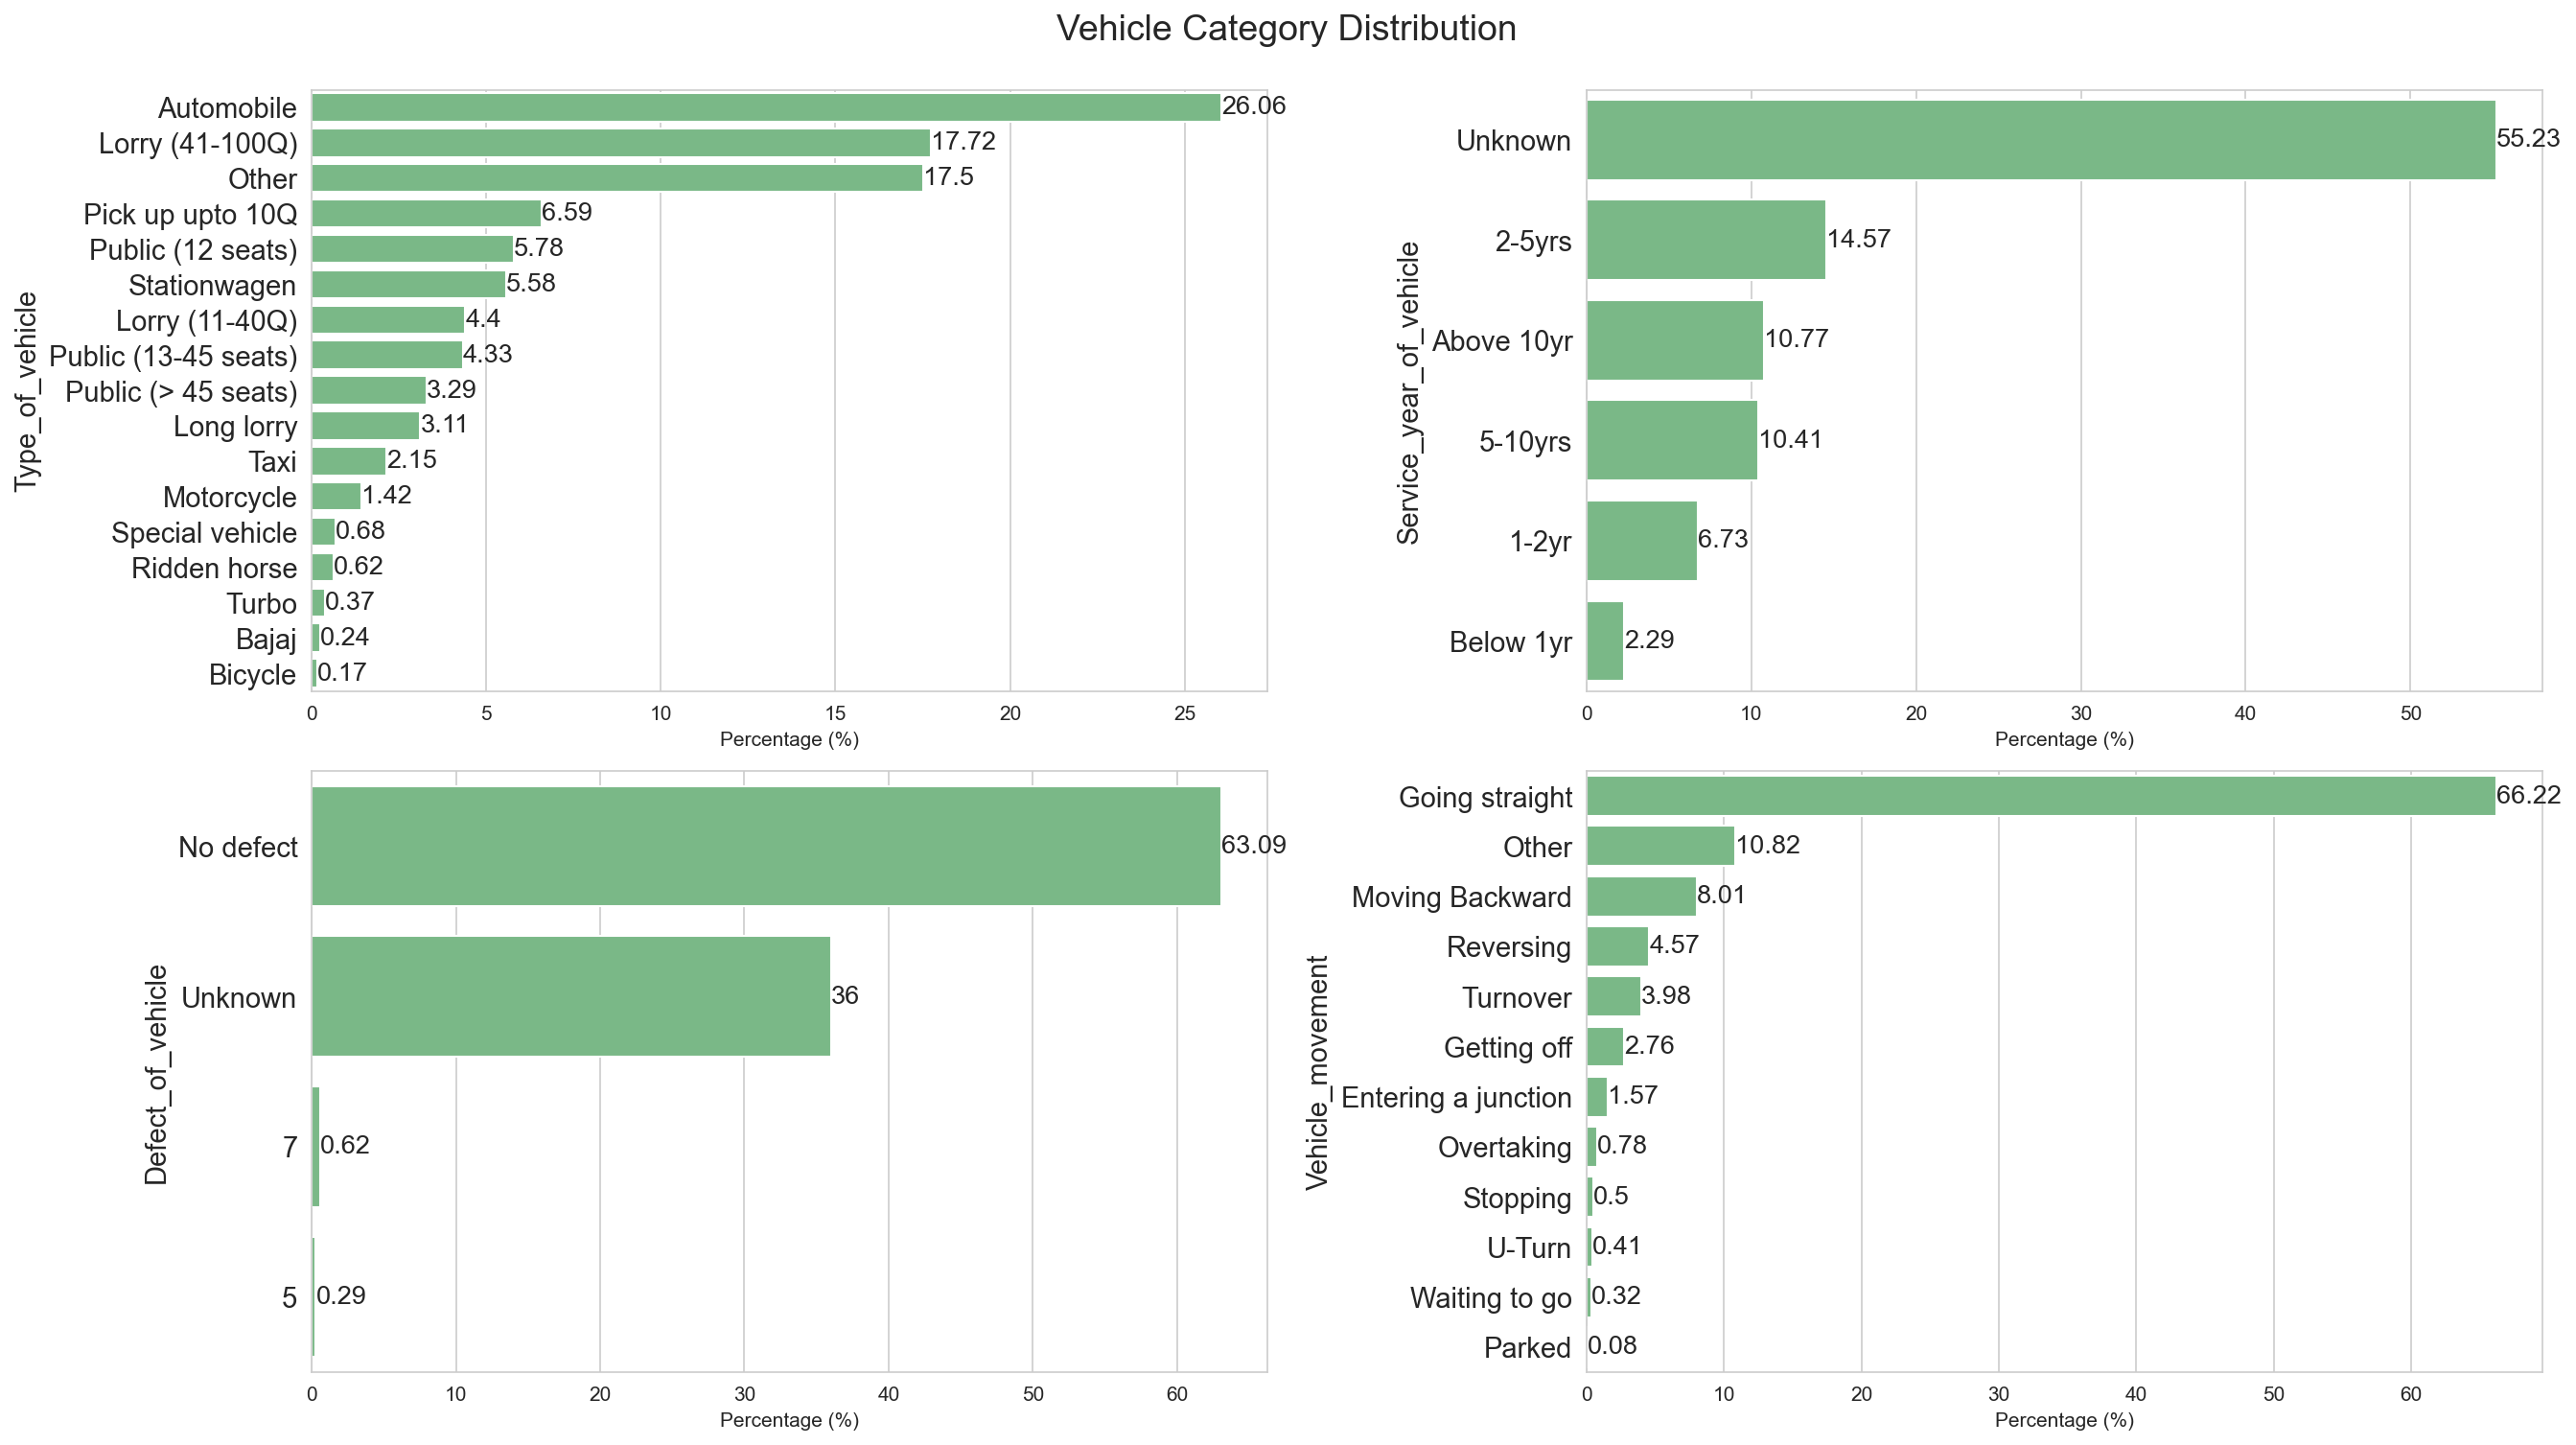

In [27]:
# PPT Format
sns.set_style('whitegrid')
plt.figure(figsize=(18,10), dpi=150)
plt.suptitle('Vehicle Category Distribution', y = 1, fontsize = 18)
for i in range(0, len(road_tables)):
    plt.subplot(2, 2, i+1)
    ax = sns.barplot(
        y = vehicle_tables[i][vehicle[i]],
        x = 100*(round(vehicle_tables[i]['count'] / vehicle_tables[i]['count'].sum(),4)),
        width=0.8,
        color='#6FC381'
    )
    for container in ax.containers:
        ax.bar_label(container, fontsize = 13) # type: ignore
    plt.yticks(fontsize = 14)
    plt.ylabel(ylabel = vehicle[i], fontsize = 14)
    plt.tight_layout()
    plt.xlabel('Percentage (%)')
plt.show()

Vehicle Category Interpretation:
- On `Type_of_vehicle`, automobiles, or cars, have the highest rate of road traffic accidents, followed by Lorry weighing between 41-100 Quintal (1 Quintal = 100 kg), such as box truck, delivery truck, ambulance, etc.
- On `Service_year_of vehicle`, vehicle that haven't been serviced for more than 3 years is the most vehicle that involved to road traffic accidents.
- On `Defect_of_vehicle`, apparently vehicles with no defects dominates the records.
- On `Vehicle_movement`, vehicle that went straight have the most records, it can be seen with other dataset such as `Cause_of_accident` and `Road_allignment` or `Lanes_or_Medians` to gain more clarity.

From this dataset, vehicles that have the capacity for speeding such as cars and heavier capacity such as lorry are tends to be involved into road traffic accidents. While vehicle defects may not really contribute in road traffic accidents, but the longer car haven't been serviced, the higher the probability to involved in traffic accidents.

#### Environment Category Distribution

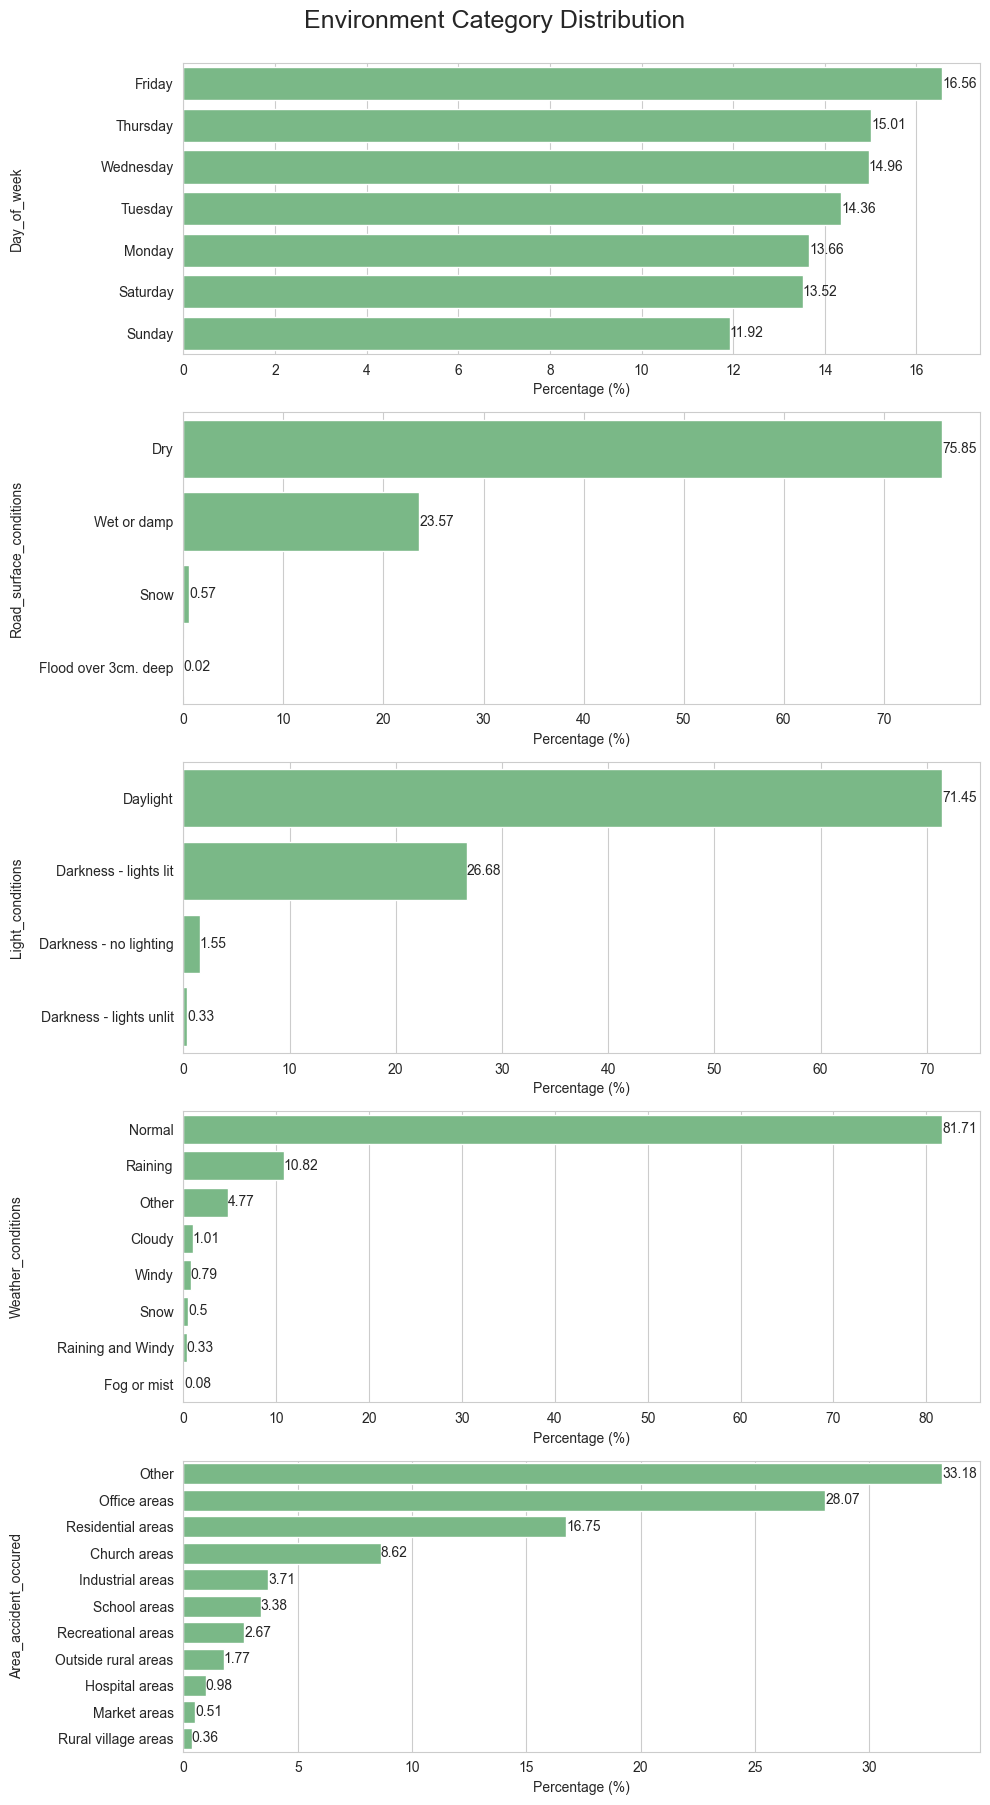

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,18), dpi=100)
plt.suptitle('Environment Category Distribution', y = 1, fontsize = 18)
for i in range(0, len(environment)):
    plt.subplot(len(environment), 1, i+1)
    ax = sns.barplot(
        y = environment_tables[i][environment[i]],
        x = 100*(round(environment_tables[i]['count'] / environment_tables[i]['count'].sum(),4)),
        color = '#6FC381',
        width=0.8
    )
    for container in ax.containers:
        ax.bar_label(container) # type: ignore
    ax.yaxis.set_label_coords(-0.2,0.5)
    plt.tight_layout()
    plt.xlabel('Percentage (%)')
plt.show()

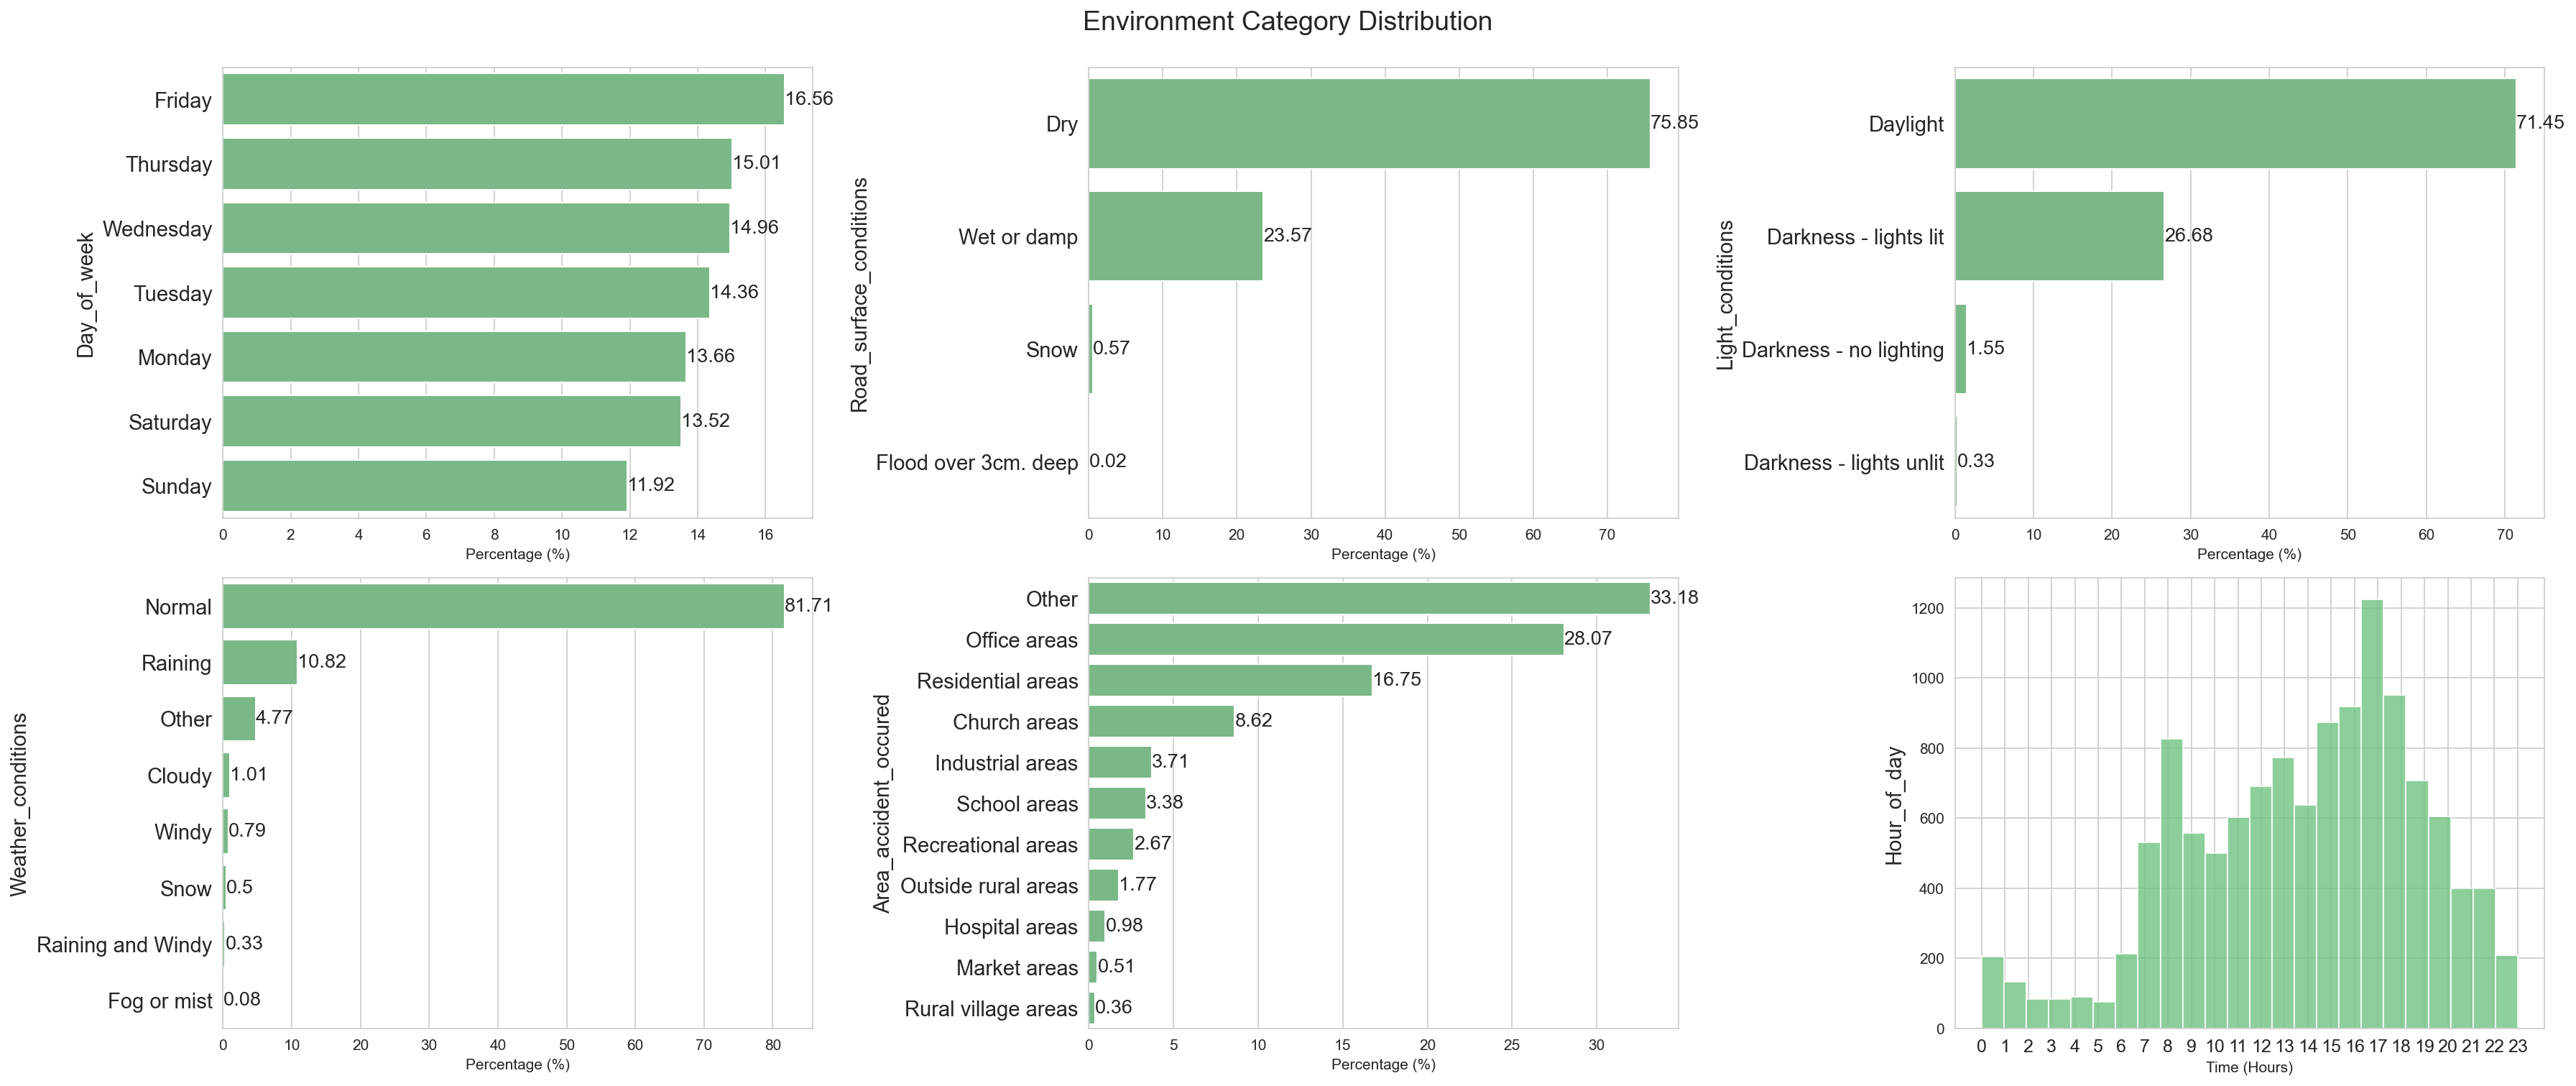

In [29]:
# PPT format
sns.set_style('whitegrid')
accident['Hour_of_day'] = accident['Time'].dt.hour
plt.figure(figsize=(24,10), dpi=150)
plt.suptitle('Environment Category Distribution', y = 1, fontsize = 18)
for i in range(0, len(environment_tables)):
    plt.subplot(2, 3, i+1)
    ax = sns.barplot(
        y = environment_tables[i][environment[i]],
        x = 100*(round(environment_tables[i]['count'] / environment_tables[i]['count'].sum(),4)),
        width=0.8,
        color='#6FC381'
    )
    for container in ax.containers:
        ax.bar_label(container, fontsize = 13) # type: ignore
    plt.yticks(fontsize = 14)
    plt.ylabel(ylabel = environment[i], fontsize = 14)
    plt.tight_layout()
    plt.xlabel('Percentage (%)')
plt.subplot(2, 3, 6)
plt.hist(accident['Hour_of_day'],
          color= '#6FC381',
          bins=24,
          stacked=True, 
          alpha=0.8)
plt.xlabel('Time (Hours)')
plt.ylabel(ylabel = 'Hour_of_day', fontsize = 14)
plt.xticks(list(range(0,24,1)), fontsize = 12)
plt.show()

Environment Category Interpretation:
- On `Day_of_week`, road traffic accident mostly happened on Friday, though it seems it give no effect since it's quite distributed. We can see it when compare the average of records between weekdays and weekend.
- On `Road_surface_conditions`, accidents happened in dry roads, followed by wet roads.
- On `Light_conditions`, apparently accident happened mostly in daylight or lit roads. This should be observed in one particular road to compare its traffic density between day and night, or we can compare it with Area_accident_occured.
- On `Weather_conditions`, accidents happened during normal day, followed by rainy days.
- On `Area_accident_occured`, accidents mostly happened on office areas, followed by residential area. This can be compared with Road categories and light conditions.

This category is probably better be seen when compared to another features, such as road alignment, cause of accident, or even its own subcategories.

#### Driver Category Distribution

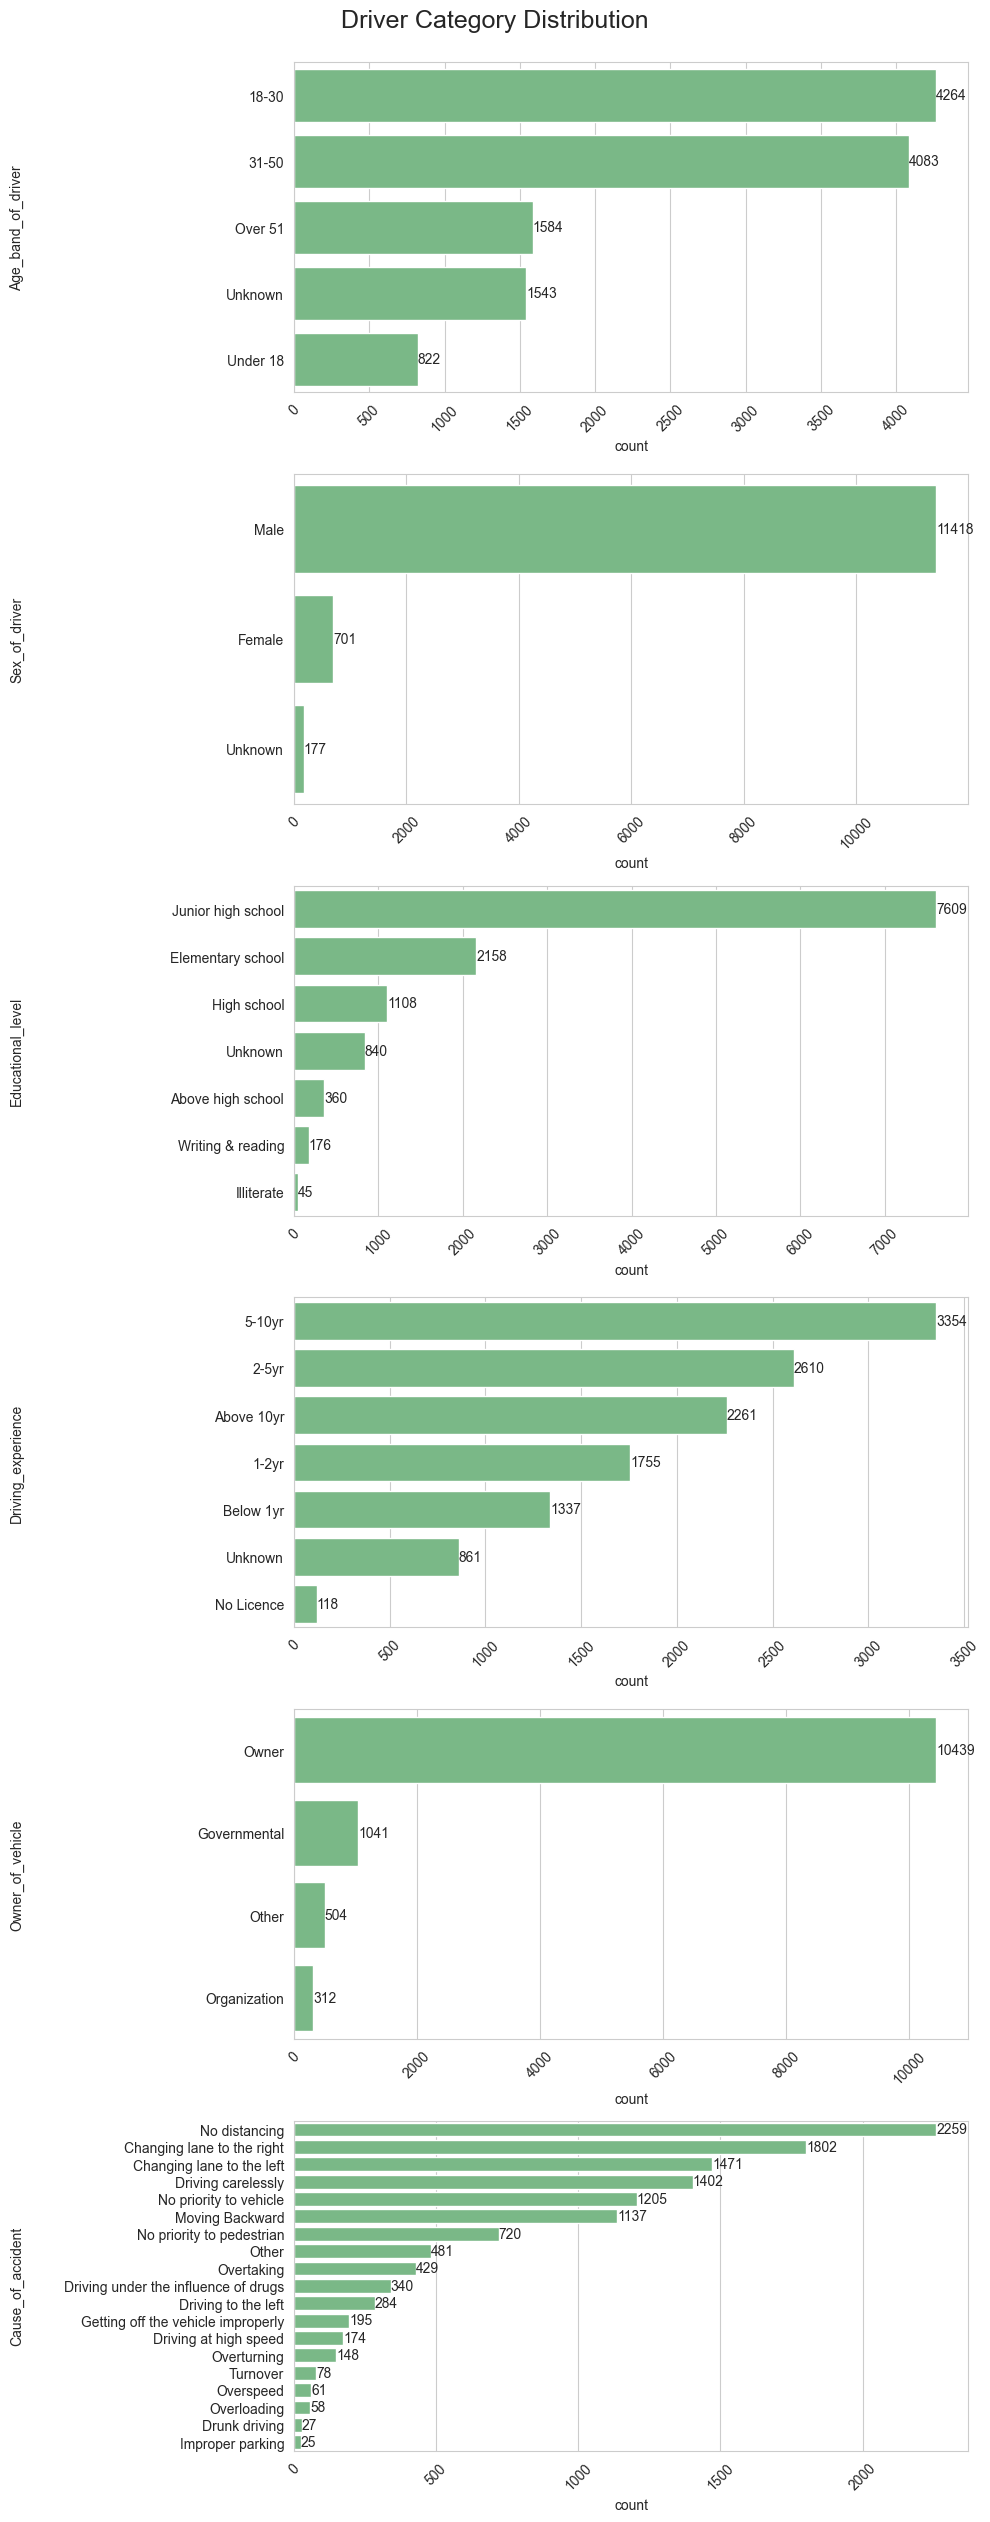

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,25), dpi=100)
plt.suptitle('Driver Category Distribution', y = 1, fontsize = 18)
for i in range(0, len(driver)):
    plt.subplot(len(driver), 1, i+1)
    ax = sns.barplot(
        y = driver_tables[i][driver[i]],
        x = driver_tables[i]['count'],
        color = '#6FC381',
        width=0.8
    )
    for container in ax.containers:
        ax.bar_label(container) # type: ignore
    ax.yaxis.set_label_coords(-0.4,0.5)
    plt.tight_layout()
    plt.xticks(rotation = 45)
plt.show()

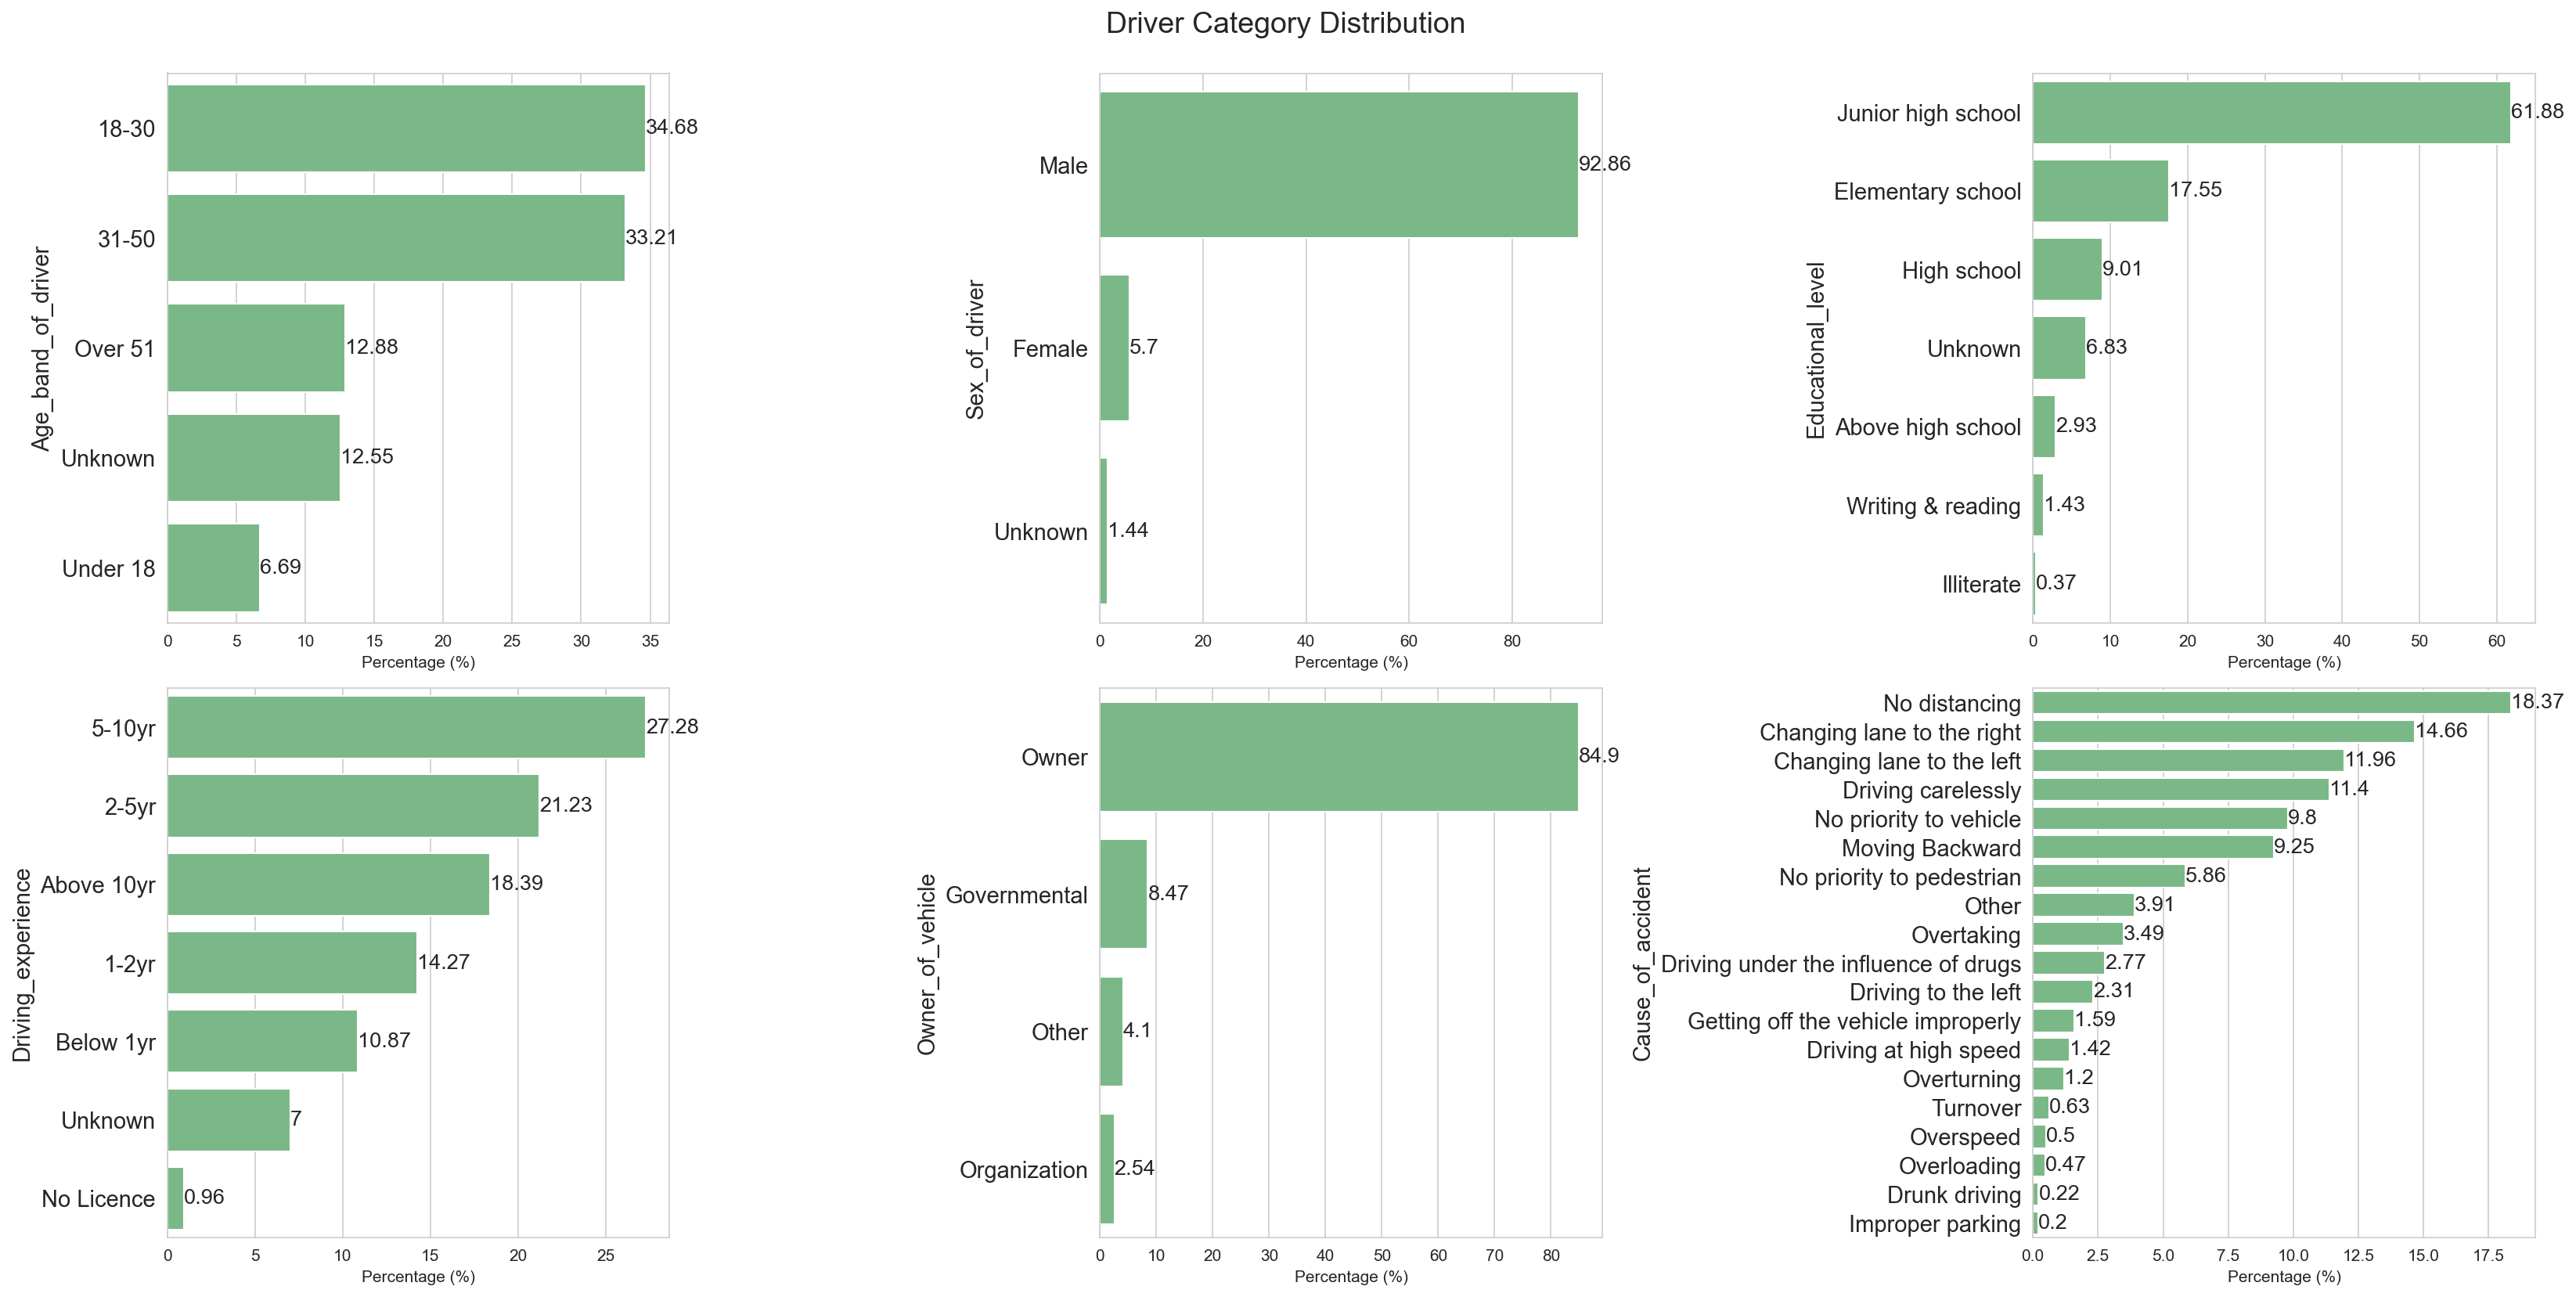

In [31]:
# PPT format
sns.set_style('whitegrid')
plt.figure(figsize=(22,11), dpi=150)
plt.suptitle('Driver Category Distribution', y = 1, fontsize = 18)
for i in range(0, len(driver_tables)):
    plt.subplot(2, 3, i+1)
    ax = sns.barplot(
        y = driver_tables[i][driver[i]],
        x = 100*(round(driver_tables[i]['count'] / driver_tables[i]['count'].sum(),4)),
        width=0.8,
        color='#6FC381'
    )
    for container in ax.containers:
        ax.bar_label(container, fontsize = 13) # type: ignore
    plt.yticks(fontsize = 14)
    plt.ylabel(ylabel = driver[i], fontsize = 14)
    plt.tight_layout()
    plt.xlabel('Percentage (%)')
plt.show()

Driver Category Interpretation:
- On `Age_band_of_driver`, apparently age 18-50 is the most drivers that involved into the traffic accident. This value itself doesn't add up much information since the margin age is too wide. However, this value can be compared with other features such as education and experience.
- On `Sex_of_driver`, Males are dominant that involved into the road traffic accident.
- On `Educational_level`, lower education such as junior HS and elementary have the highest record that involved into the accident. This can be compared with age band of the driver.
- On `Driving_experience`, apparently higher experience in driving have the highest record involved in traffic accident.
- On `Owner_of_vehicle`, most of the driver that involved in the accident owned their own car.
- On `Cause_of_accident`, it quite diverse the cause of road accidents in this dataset, but mostly no distancing between vehicle are the cause of road traffic accident, meanwhile drunk driving is one of the lowest.

Cause_of_accident seems to be the most important features in this category, because it's directly linked to the crash and its casualties.

#### Consequences Distribution

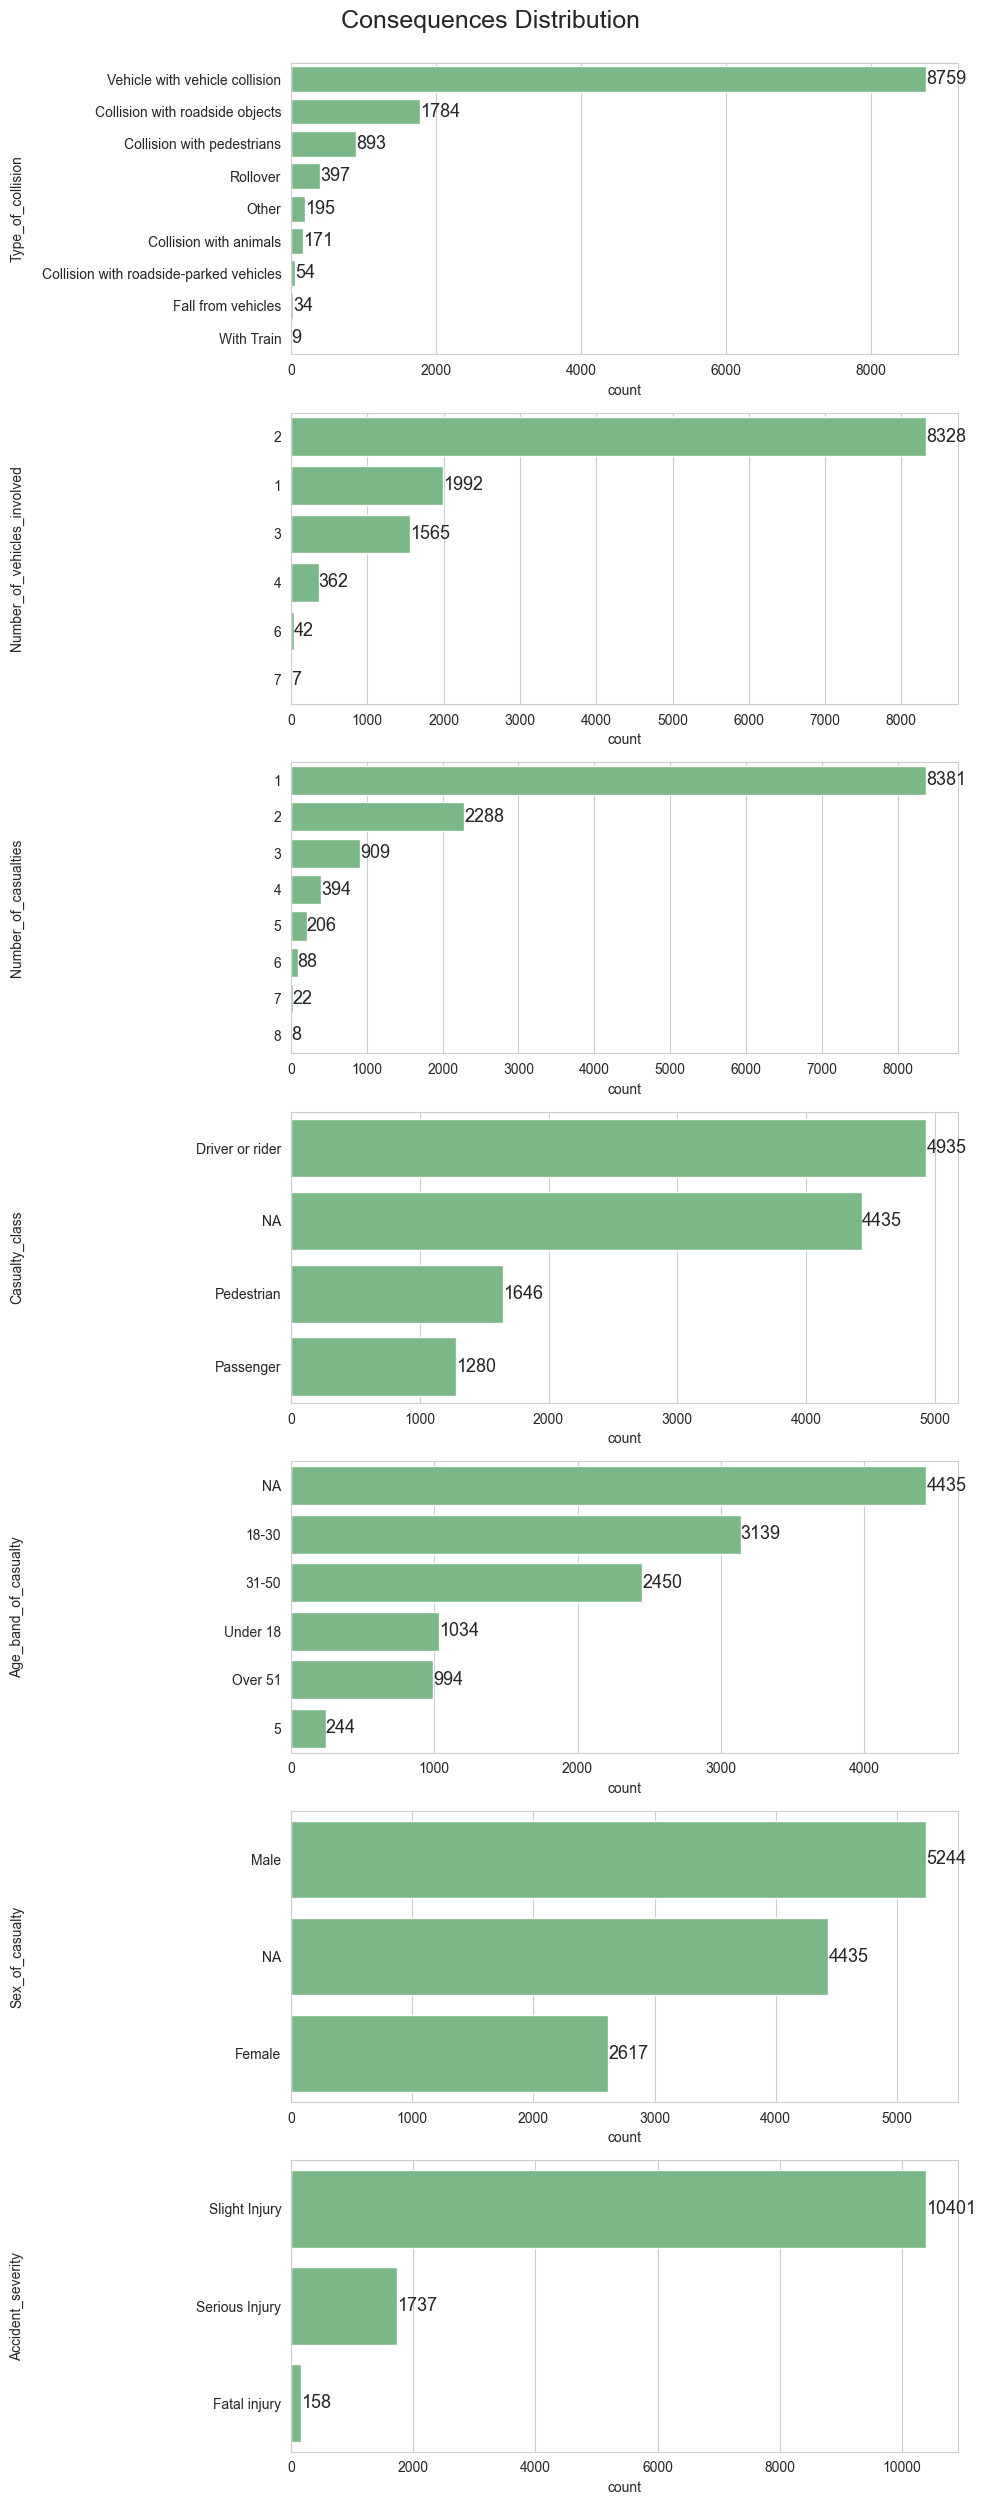

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,25), dpi=100)
plt.suptitle('Consequences Distribution', y = 1, fontsize = 18)
for i in range(0, len(consequences)):
    plt.subplot(len(consequences), 1, i+1)
    ax = sns.barplot(
        y = consequences_tables[i][consequences[i]],
        x = consequences_tables[i]['count'],
        color = '#6FC381',
        width=0.8
    )
    for container in ax.containers:
        ax.bar_label(container, fontsize = 13) # type: ignore
    ax.yaxis.set_label_coords(-0.4,0.5)
    plt.tight_layout()
plt.show()

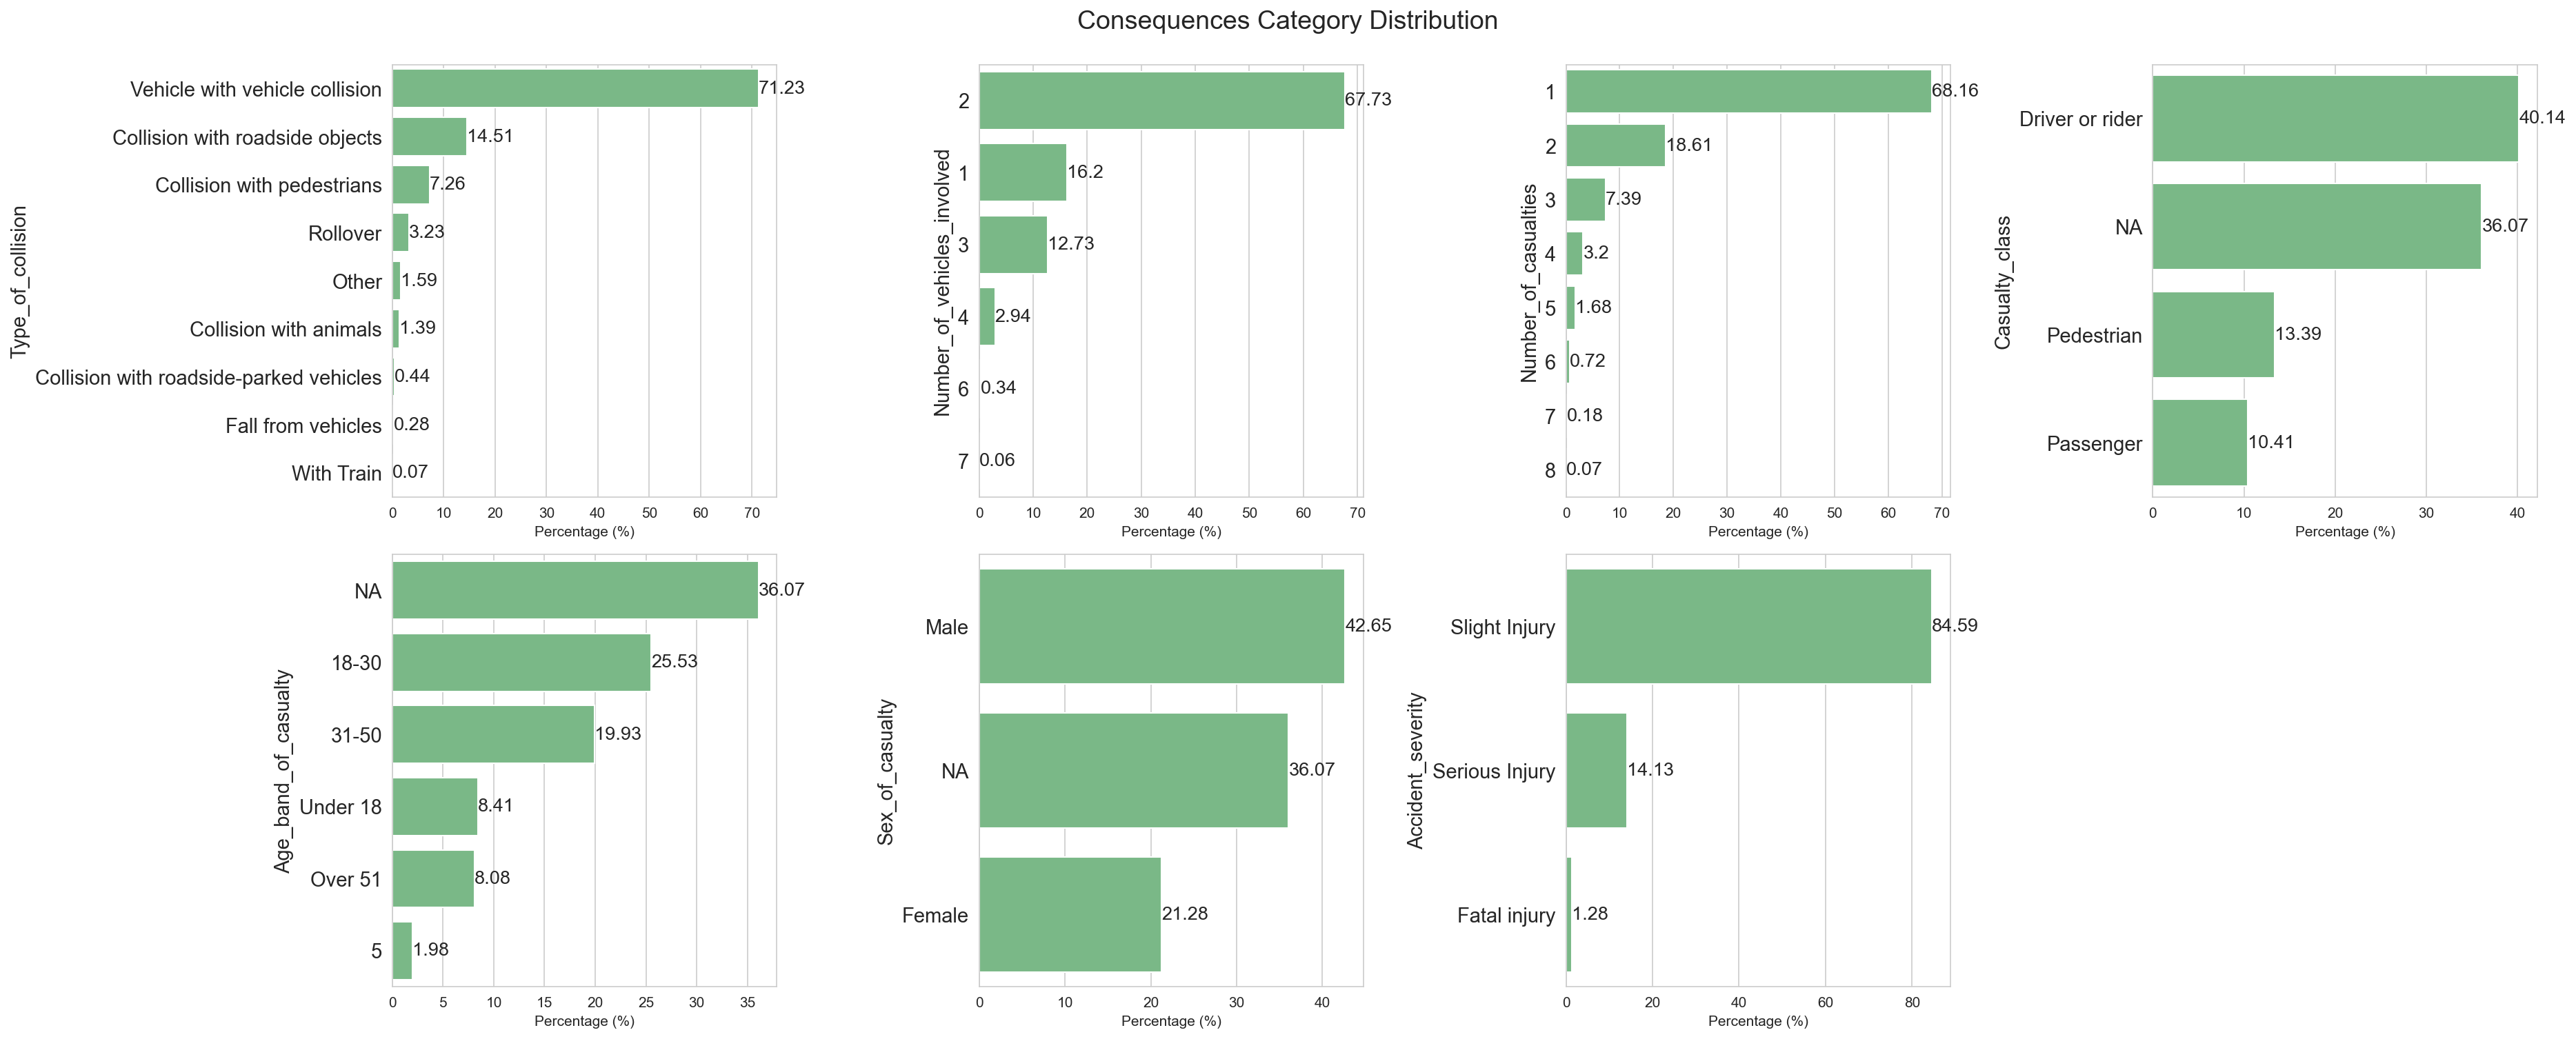

In [33]:
# PPT format
sns.set_style('whitegrid')
plt.figure(figsize=(25,10), dpi=150)
plt.suptitle('Consequences Category Distribution', y = 1, fontsize = 18)
for i in range(0, len(consequences_tables)):
    plt.subplot(2, 4, i+1)
    ax = sns.barplot(
        y = consequences_tables[i][consequences[i]],
        x = 100*(round(consequences_tables[i]['count'] / consequences_tables[i]['count'].sum(),4)),
        width=0.8,
        color='#6FC381'
    )
    for container in ax.containers:
        ax.bar_label(container, fontsize = 13) # type: ignore
    plt.yticks(fontsize = 14)
    plt.ylabel(ylabel = consequences[i], fontsize = 14)
    plt.tight_layout()
    plt.xlabel('Percentage (%)')
plt.show()

Consequences Category Interpretation:
- On `Type_of_collision`, accident happens mostly on vehicle with vehicle collisions, which can be compared with Number_of_vehicles_involved.
- On `Number_of_vehicles_involved`, most of the accidents involves 2 vehicles, followed by single accident. Can be compared with Type_of_collision.
- On `Number_of_casualties`, the number of casualties in this dataset are usually only 1 victims, which can be explored more through another features.
- On `Casualty_class`, drivers or riders are dominant to be the casualties of road traffic accident.
- On `Sex_of_casualty`, male are dominan to be the casualties, though some of the casualty are Unknown.
- On `Casualty_severity`, most of the casualties are considered have a severe injury with the level of 3, but this is need to be clarified with Accident_severity, because these two features have a contrast value (Fatal casualty injury vs Slight accident injury).
- On `Accident_severity`, most of the accident are classified as slight injury.

This category is best used when compared with another features to gain more informations, such as accident severity with cause of accident, type of collision, etc.

#### Category Distribution Analysis Follow-Up Questions
After checking the distribution of every aspect on each category, we can gain more questions to be dig down through deep-dive EDA:

1. Unknowns in casualties (class, sex, age-band, etc.) have the exact same of value counts, which is 4435 records. Based on the feature description, the Unknows can be interpreted as the casualties that wasn't dead in the accident. We can add a new feature that the accident caused death or not.
1. How time are related to the consequences category? (Number_of_vehicle_involved, Accident_severity) (vertical bar plot)
2. Casualty_severity are quite opposite with Accident_severity. But it could be the pedestrians that were have a fatal casualties. So, which Casualty_class are having the most severe casualty (Casualty_severity) and what make it different with Accident_severity? (barplot)
3. How does number of vehicle related to number of casualties? Also how about each of it with severity? (scatter)
4. What causes collisions that happened in this dataset? (compare Cause_of_accident w/ Type_of_collisions) and what's the consequences from the type of collisions? (Number_of_vehicle_involved, Number_of_casualties, Accident_severity) (scatter)
5. Is there any relation between driving experience with the cause of accident? (scatter)
6. How was the lighting condition on each time, especially nightime? (Vertical bar plot)
7. How lighting condition can cause road traffic accidents? (scatter)
8. Which area that have bad lighting condition? (Filter Lighting with unlit/broken lighting) (scatter)
9. Is there any areas that have bad Road markings? (filter lanes or median to broken/undivided road markings) (scatter)
10. In types of junction, which have the most severe accident? (scatter)
11. Which type of vehicle that involved have the most severe accident? (scatter)
12. What cause of accident based on the type of vehicle? (scatter)
13. What type of accident based in the type of vehicle? (scatter)
14. How is the condition of road in certain areas? (scatter)

### 2. Deep-Dive Exploratory Data Analysis


In [34]:
# color maps

from matplotlib import colors
color_map = colors.LinearSegmentedColormap.from_list('custom', ['#B2DFBC', '#6A352F'])
color_map_inverse = colors.LinearSegmentedColormap.from_list('custom', ['#6A352F', '#B2DFBC'])
color_map2 = colors.LinearSegmentedColormap.from_list('custom', ['#B2DFBC', '#3D3D3D'])
color_map2_inverse = colors.LinearSegmentedColormap.from_list('custom', ['#3D3D3D', '#B2DFBC'])
color_map3 = colors.LinearSegmentedColormap.from_list('custom', ['#B2DFBC', '#3D3D3D', '#441E1A'])
color_map4 = colors.ListedColormap(['#A3D0AD', '#9DB379', '#909548', '#7A6638', '#441E1A'])
color_map5 = colors.ListedColormap(['#72C083', '#ACCA75', '#C9CF6E', '#E6D367', '#B09D50', '#7a6638', '#5d2823'])
color_map6 = colors.ListedColormap(['#72C083', '#B6C185', '#B8B35C', '#958f4a', '#7a6638', '#5d2823'])

In [35]:
accident_order = ['Slight Injury', 'Serious Injury', 'Fatal injury']

#### Casualties Occurance

Identify if the accident caused casualties (death or injury) or not:

In [36]:
accident['Death_occured'] = (accident['Casualty_class'] != 'NA')

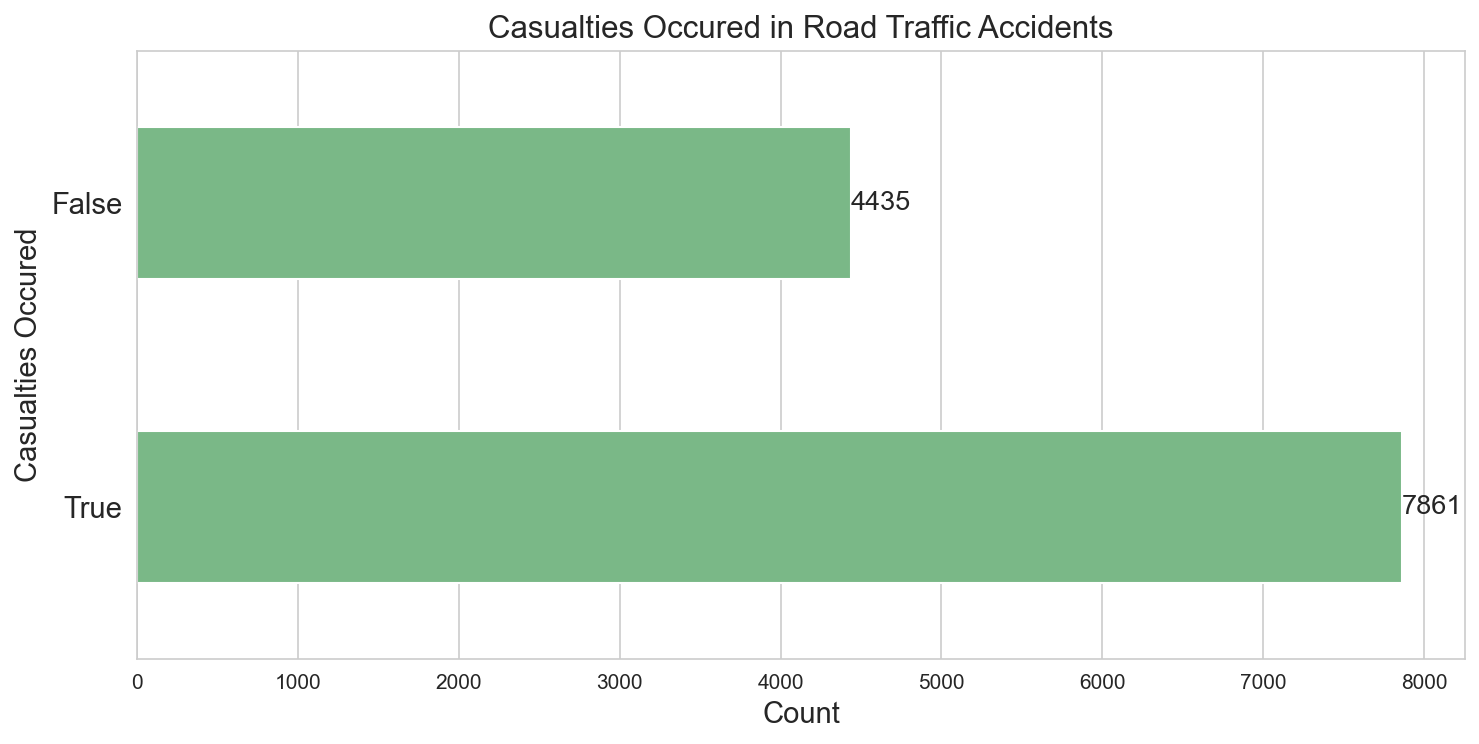

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5), dpi=150)
plt.title('Casualties Occured in Road Traffic Accidents', fontsize = 15)
ax = sns.countplot(
        y = accident['Death_occured'],
        width=0.5,
        color='#6FC381'
    )
for container in ax.containers:
    ax.bar_label(container, fontsize = 13) # type: ignore
plt.yticks(fontsize = 14)
plt.ylabel(ylabel = 'Casualties Occured', fontsize = 14)
plt.tight_layout()
plt.xlabel('Count', fontsize = 14)
plt.show()

In [38]:
4435 / (4435 + 7861)

0.3606864020819779

In [39]:
7861 / (4435 + 7861)

0.6393135979180221

64% of accidents records the casualties information like driver or pedestrians, age band, sex, etc. The problem is i cant identify and cannot sure if this information is for injured or death casualties, because most slight accidents have the casualties information.

#### Single, Normal, and Pileup Collisions

Identify if the collision considered as single (1 vehicle), normal (2 vehicle), or pileup (> 2 vehicle):

In [40]:
accident[['Number_of_vehicles_involved', 'Number_of_casualties']] = accident[['Number_of_vehicles_involved', 'Number_of_casualties']].astype(int)

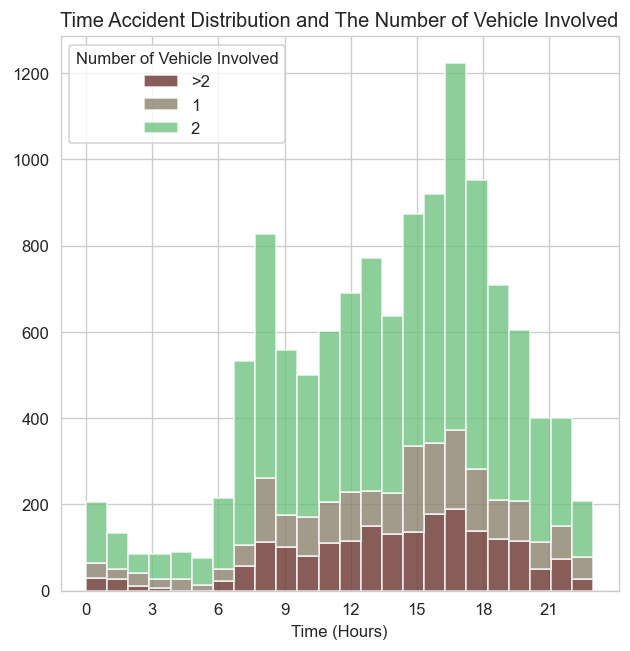

In [41]:
accident['Single_pileup_collision'] = np.where(accident['Number_of_vehicles_involved'] > 2, '>2', [x for x in accident['Number_of_vehicles_involved'].values])
accident['Hour_of_day'] = accident['Time'].dt.hour

sns.set_style('whitegrid')

plt.figure(figsize=(6,6), dpi = 120)
plt.title('Time Accident Distribution and The Number of Vehicle Involved')
plt.hist([accident[accident['Single_pileup_collision'] == '>2']['Hour_of_day'],
          accident[accident['Single_pileup_collision'] == '1']['Hour_of_day'],
          accident[accident['Single_pileup_collision'] == '2']['Hour_of_day']], 
          color= ['#6A352F','#8B826F','#6FC381'],
          bins=24,
          stacked=True, 
          alpha=0.8)
plt.legend(['>2', '1', '2'], title = 'Number of Vehicle Involved')
plt.xlabel('Time (Hours)')
plt.xticks(list(range(0,24,3)))
plt.show()

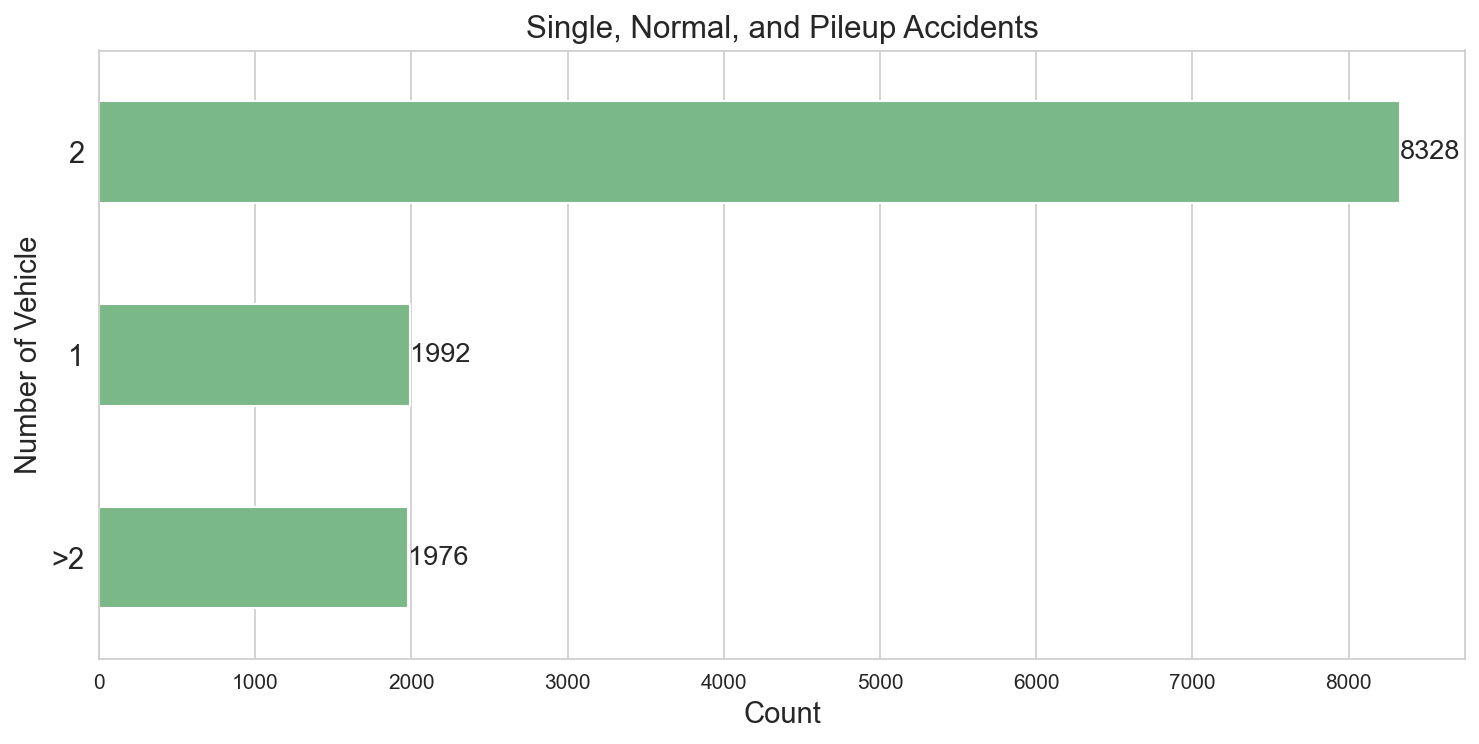

In [42]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5), dpi=150)
plt.title('Single, Normal, and Pileup Accidents', fontsize = 15)
ax = sns.countplot(
        y = accident['Single_pileup_collision'],
        width=0.5,
        color='#6FC381'
    )
for container in ax.containers:
    ax.bar_label(container, fontsize = 13) # type: ignore
plt.yticks(fontsize = 14)
plt.ylabel(ylabel = 'Number of Vehicle', fontsize = 14)
plt.tight_layout()
plt.xlabel('Count', fontsize = 14)
plt.show()

Normal between 2 vehicles are dominant in this dataset. If > 2 vehicle involved were merged, the count value is almost the same with single value.

#### Time-Severity Relation

##### Day

In [43]:
accident['Weekday-weekend'] = np.where(accident['Day_of_week'].isin(['Saturday','Sunday']), 'Weekend', 'Weekday')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [44]:
day_severity = accident.groupby(['Day_of_week', 'Accident_severity'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
day_severity['percent'] = 100*(round(day_severity['count'] / day_severity['count'].sum(), 4))
day_severity_pivot = day_severity.pivot_table(index='Day_of_week', columns= 'Accident_severity', values='percent', fill_value = 0)
day_severity_pivot = day_severity_pivot.reindex(day_order)
day_severity_pivot = day_severity_pivot.reindex(accident_order, axis= 1)

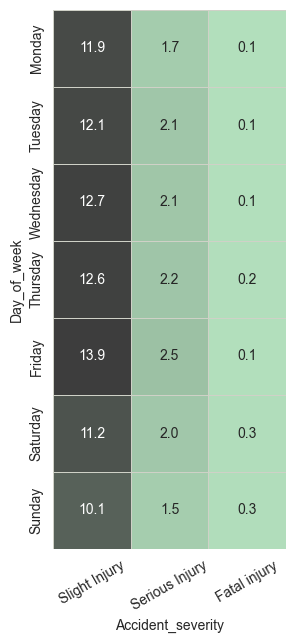

In [45]:
plt.figure(figsize=(3,7))
sns.heatmap(day_severity_pivot, 
            cmap= color_map2, 
            vmax = 13, 
            annot=True, 
            fmt= '.1f', 
            linewidths=0.5, 
            linecolor='#CFD1C7', 
            cbar=False)
plt.xticks(rotation = 30)
plt.show()

Day Interpretation:
- Apparently, fatal accident on weekends (Saturday - Sunday) is 0.2% occurs more often than weekdays 

##### Hours

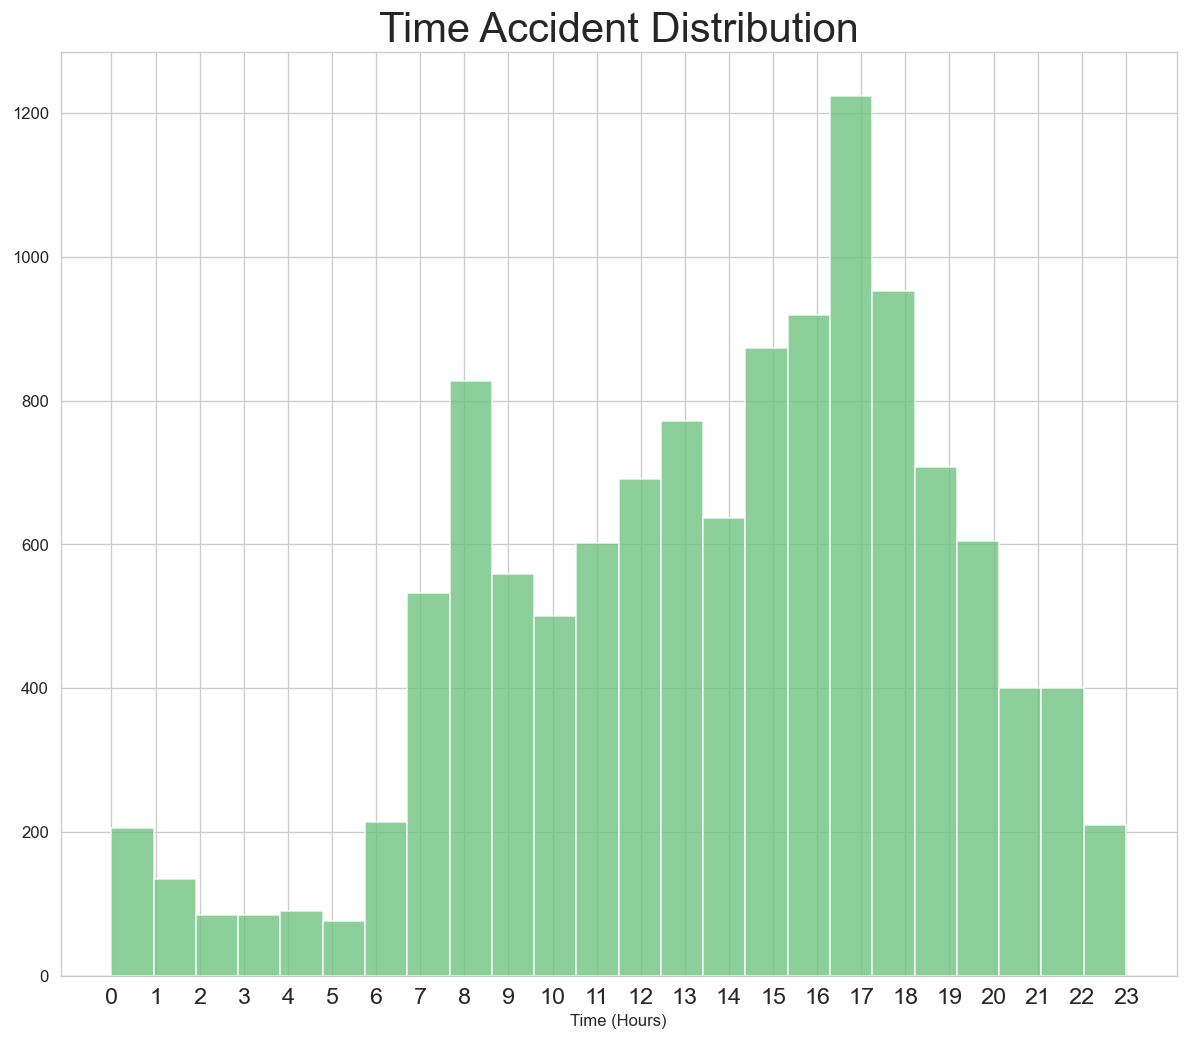

In [46]:
sns.set_style('whitegrid')

plt.figure(figsize=(12,10), dpi = 120)
plt.title('Time Accident Distribution', fontsize = 25)
plt.hist(accident['Hour_of_day'],
          color= '#6FC381',
          bins=24,
          stacked=True, 
          alpha=0.8)
plt.xlabel('Time (Hours)')
plt.xticks(list(range(0,24,1)), fontsize = 14)
plt.show()

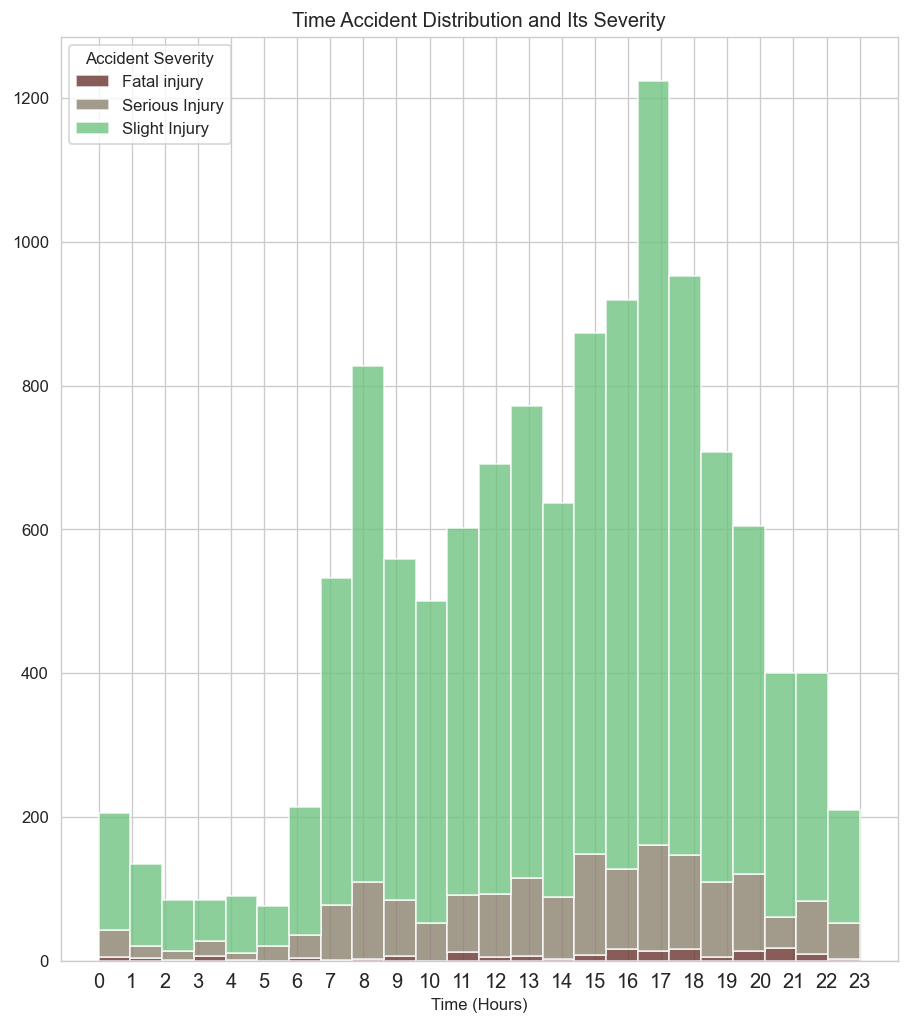

In [47]:
sns.set_style('whitegrid')

plt.figure(figsize=(9,10), dpi = 120)
plt.title('Time Accident Distribution and Its Severity')
plt.hist([accident[accident['Accident_severity'] == 'Fatal injury']['Hour_of_day'],
          accident[accident['Accident_severity'] == 'Serious Injury']['Hour_of_day'],
          accident[accident['Accident_severity'] == 'Slight Injury']['Hour_of_day']],
          color= ['#6A352F','#8B826F','#6FC381'],
          bins=24,
          stacked=True, 
          alpha=0.8)
plt.legend(['Fatal injury', 'Serious Injury', 'Slight Injury'], title = 'Accident Severity', loc= 2)
plt.xlabel('Time (Hours)')
plt.xticks(list(range(0,24,1)), fontsize = 12)
plt.show()

In [48]:
time_severity = accident.groupby(['Hour_of_day', 'Accident_severity'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
time_severity['percent'] = 100*(round(time_severity['count'] / time_severity['count'].sum(),4))
time_severity_pivot = time_severity.pivot_table(columns='Hour_of_day', index= 'Accident_severity', values='percent')

time_severity_pivot = time_severity_pivot.reindex(accident_order, axis= 0)

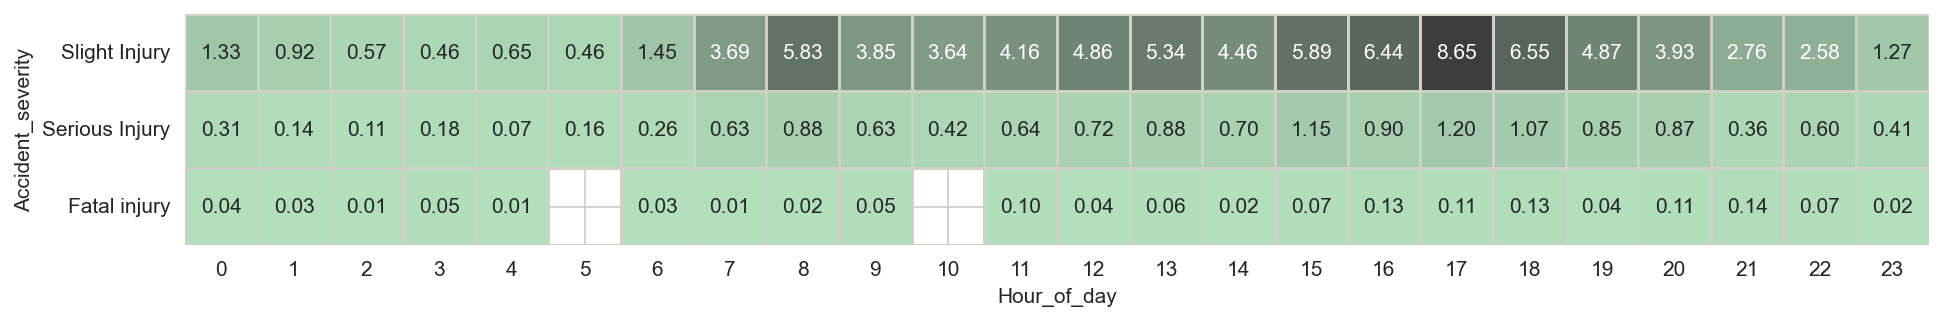

In [49]:
plt.figure(figsize=(15,2), dpi = 150)
sns.heatmap(time_severity_pivot, 
            cmap= color_map2, 
            annot=True, 
            fmt= '.2f', 
            linewidths=0.5, 
            linecolor='#CFD1C7', 
            cbar=False)
plt.show()

Plot Interpretation (3 Plot above):
- Most accidents are happened during the rush hour (08:00 and 17:00)

##### Week

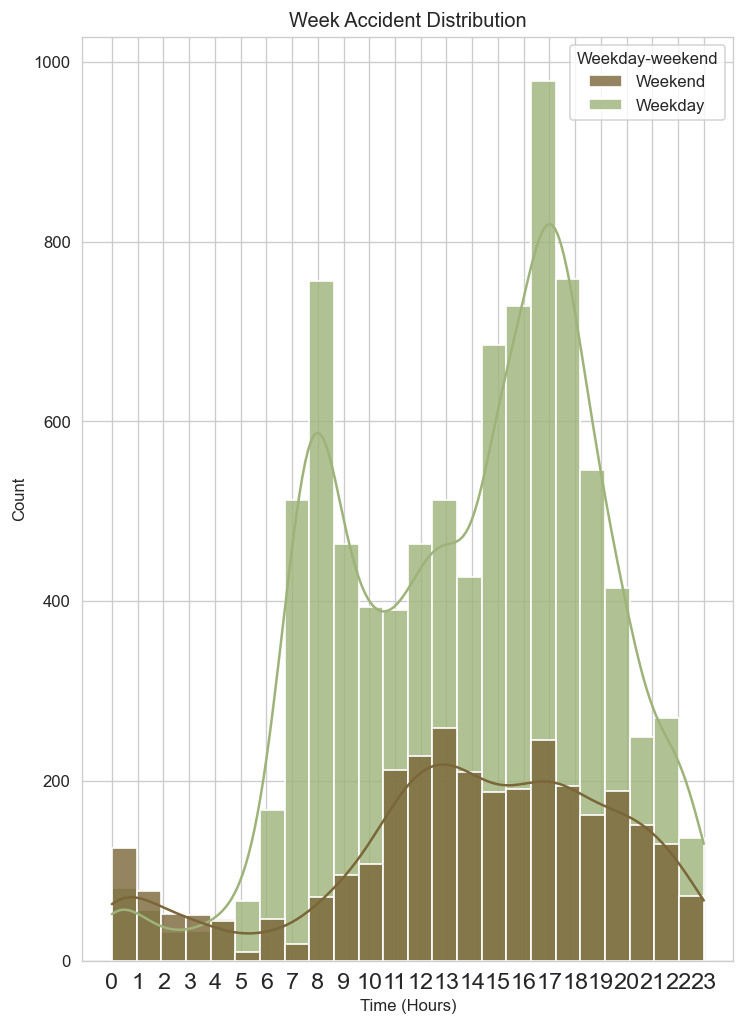

In [50]:
sns.set_style('whitegrid')

plt.figure(figsize=(7,10), dpi = 120)
plt.title('Week Accident Distribution')
sns.histplot(x = accident['Hour_of_day'],
             hue= accident['Weekday-weekend'],
             hue_order= ['Weekend', 'Weekday'],
             palette= ['#7A6638', '#9DB379'],
             kde=True,
             bins=24, 
             alpha=0.8)
plt.xlabel('Time (Hours)')
plt.xticks(list(range(0,24,1)), fontsize = 14)
plt.show()

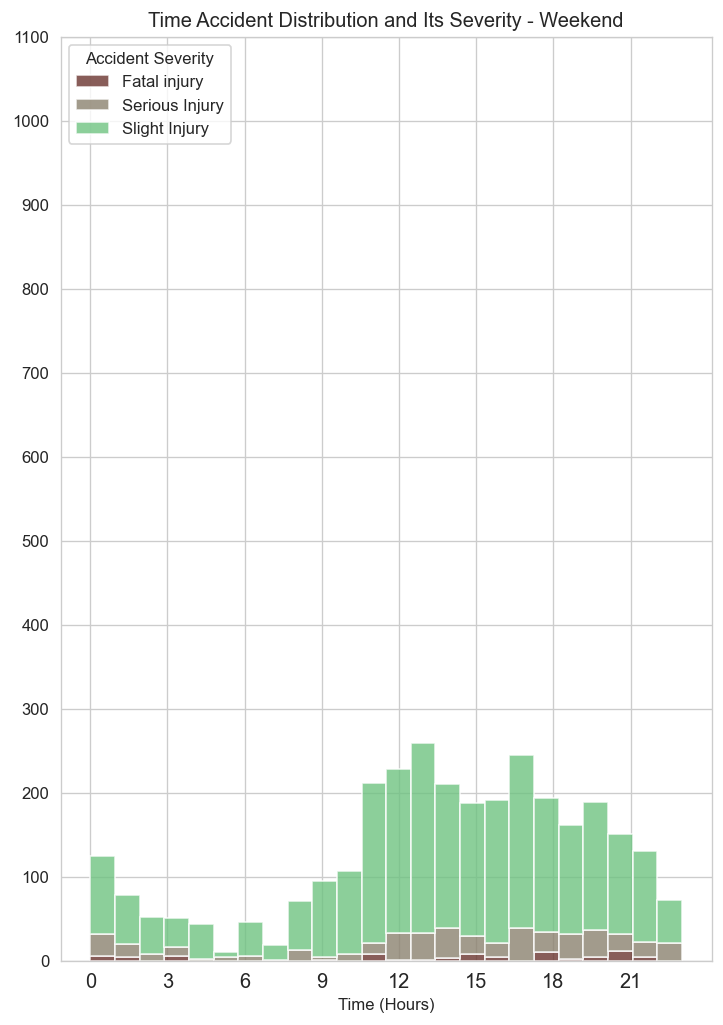

In [51]:
sns.set_style('whitegrid')

plt.figure(figsize=(7,10), dpi = 120)
plt.title('Time Accident Distribution and Its Severity - Weekend')
plt.hist([accident[(accident['Accident_severity'] == 'Fatal injury') & (accident['Weekday-weekend'] == 'Weekend')]['Hour_of_day'],
          accident[(accident['Accident_severity'] == 'Serious Injury') & (accident['Weekday-weekend'] == 'Weekend')]['Hour_of_day'],
          accident[(accident['Accident_severity'] == 'Slight Injury') & (accident['Weekday-weekend'] == 'Weekend')]['Hour_of_day']],
          color= ['#6A352F','#8B826F','#6FC381'],
          bins=24,
          stacked=True, 
          alpha=0.8)
plt.legend(['Fatal injury', 'Serious Injury', 'Slight Injury'], title = 'Accident Severity', loc= 2)
plt.yticks(list(range(0,1150,100)))
plt.xlabel('Time (Hours)')
plt.xticks(list(range(0,24,3)), fontsize = 12)
plt.show()

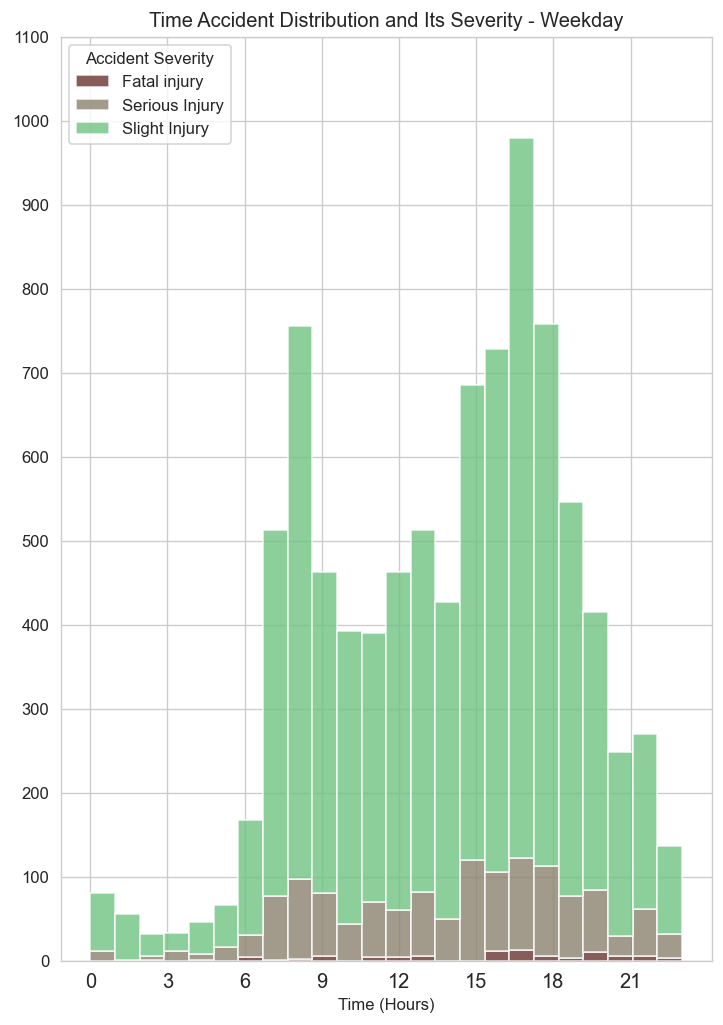

In [52]:
sns.set_style('whitegrid')

plt.figure(figsize=(7,10), dpi = 120)
plt.title('Time Accident Distribution and Its Severity - Weekday')
plt.hist([accident[(accident['Accident_severity'] == 'Fatal injury') & (accident['Weekday-weekend'] == 'Weekday')]['Hour_of_day'],
          accident[(accident['Accident_severity'] == 'Serious Injury') & (accident['Weekday-weekend'] == 'Weekday')]['Hour_of_day'],
          accident[(accident['Accident_severity'] == 'Slight Injury') & (accident['Weekday-weekend'] == 'Weekday')]['Hour_of_day']],
          color= ['#6A352F','#8B826F','#6FC381'],
          bins=24,
          stacked=True, 
          alpha=0.8)
plt.legend(['Fatal injury', 'Serious Injury', 'Slight Injury'], title = 'Accident Severity', loc= 2)
plt.xlabel('Time (Hours)')
plt.yticks(list(range(0,1150,100)))
plt.xlabel('Time (Hours)')
plt.xticks(list(range(0,24,3)), fontsize = 12)
plt.show()

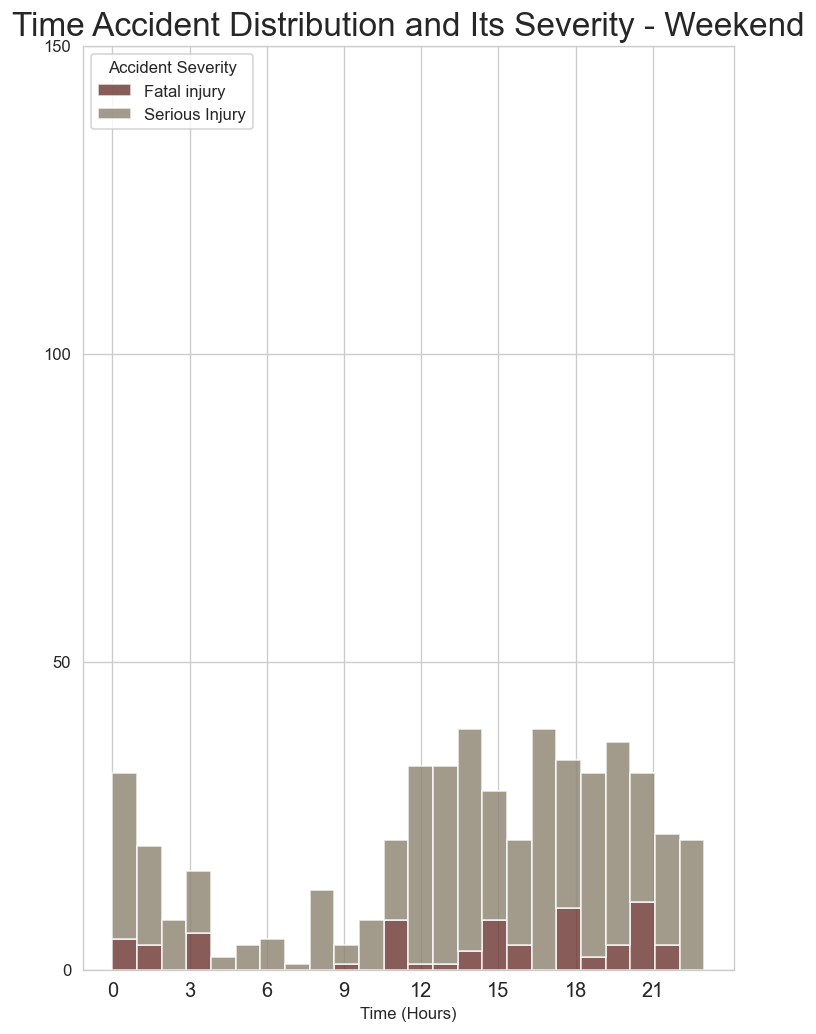

In [53]:
sns.set_style('whitegrid')

plt.figure(figsize=(7,10), dpi = 120)
plt.title('Time Accident Distribution and Its Severity - Weekend', fontsize = 20)
plt.hist([accident[(accident['Accident_severity'] == 'Fatal injury') & (accident['Weekday-weekend'] == 'Weekend')]['Hour_of_day'],
          accident[(accident['Accident_severity'] == 'Serious Injury') & (accident['Weekday-weekend'] == 'Weekend')]['Hour_of_day']],
          color= ['#6A352F','#8B826F'],
          bins=24,
          stacked=True, 
          alpha=0.8)
plt.legend(['Fatal injury', 'Serious Injury', 'Slight Injury'], title = 'Accident Severity', loc= 2)
plt.yticks(list(range(0,200,50)))
plt.xlabel('Time (Hours)')
plt.xticks(list(range(0,24,3)), fontsize = 12)
plt.show()

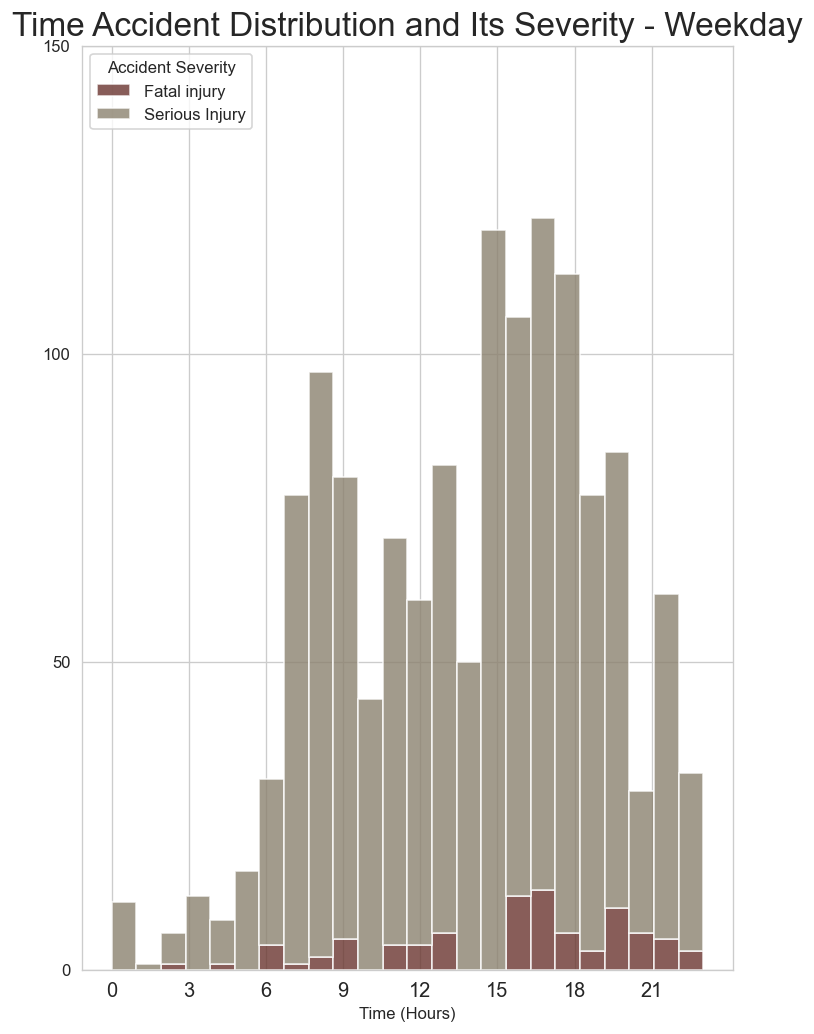

In [54]:
sns.set_style('whitegrid')

plt.figure(figsize=(7,10), dpi = 120)
plt.title('Time Accident Distribution and Its Severity - Weekday', fontsize = 20)
plt.hist([accident[(accident['Accident_severity'] == 'Fatal injury') & (accident['Weekday-weekend'] == 'Weekday')]['Hour_of_day'],
          accident[(accident['Accident_severity'] == 'Serious Injury') & (accident['Weekday-weekend'] == 'Weekday')]['Hour_of_day']],
          color= ['#6A352F','#8B826F'],
          bins=24,
          stacked=True, 
          alpha=0.8)
plt.legend(['Fatal injury', 'Serious Injury', 'Slight Injury'], title = 'Accident Severity', loc= 2)
plt.xlabel('Time (Hours)')
plt.yticks(list(range(0,200,50)))
plt.xlabel('Time (Hours)')
plt.xticks(list(range(0,24,3)), fontsize = 12)
plt.show()

Week Interpretation (5 plots above):
- Accidents on midnight occurs more often On weekends than weekdays.
- Apparently, serious to fatal accidents also occurs more often during midnight on weekends.

#### Cause of Accident by Day (Especially Drunk and Drugs)

In [55]:
day_cause = accident.groupby(['Day_of_week', 'Cause_of_accident'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
day_cause_filtered = day_cause[(day_cause['Cause_of_accident'] == 'Drunk driving') | (day_cause['Cause_of_accident'] == 'Driving under the influence of drugs')]

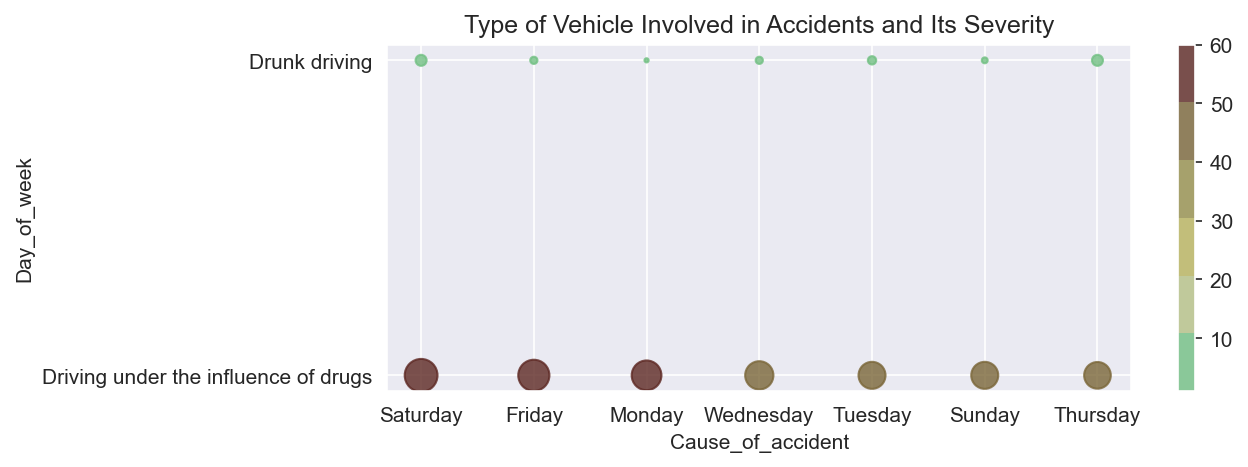

In [56]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,3), dpi = 150)
plt.title('Type of Vehicle Involved in Accidents and Its Severity')
plt.scatter(x= day_cause_filtered['Day_of_week'], 
            y= day_cause_filtered['Cause_of_accident'], 
            c = day_cause_filtered['count'],
            cmap = color_map6,
            s = day_cause_filtered['count']*4,
            alpha = 0.8,
            vmax = 60
            )
plt.xlabel('Cause_of_accident')
plt.ylabel('Day_of_week')
plt.colorbar()
plt.show()

Saturday have the highest number of accident caused by drunk driving or driving under the influence of drugs.

#### Casualty (or Accident?) Severity on Casualty Classes

<Axes: title={'center': 'Number of Casualty Class and Its Severity'}, xlabel='Casualty_class', ylabel='count'>

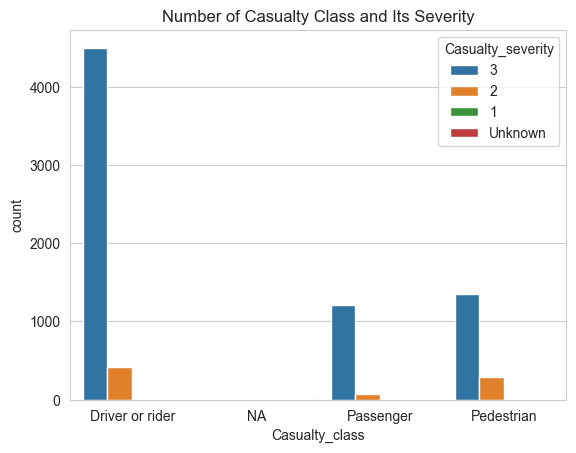

In [57]:
casualty_class_severity = accident.groupby(['Casualty_class','Casualty_severity'])['Time'].count().reset_index().rename(columns={'Time':'count'})

sns.set_style('whitegrid')
plt.title('Number of Casualty Class and Its Severity')
sns.barplot(x= casualty_class_severity['Casualty_class'],
            y= casualty_class_severity['count'],
            hue=casualty_class_severity['Casualty_severity'],
            hue_order=['3','2','1','Unknown'])

<Axes: title={'center': 'Number of Casualty Class and Accident Severity'}, xlabel='Casualty_class', ylabel='count'>

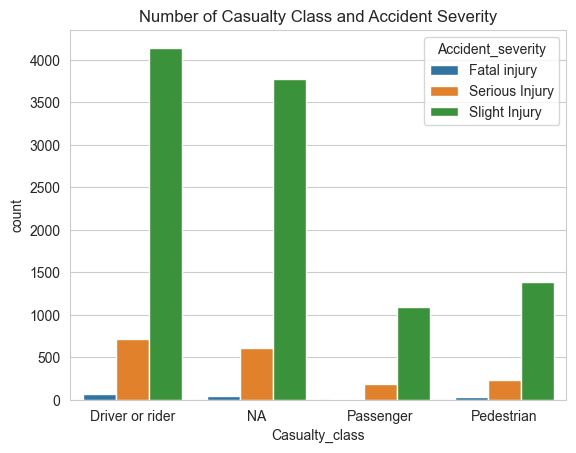

In [58]:
casualty_class_severity = accident.groupby(['Casualty_class','Accident_severity'])['Time'].count().reset_index().rename(columns={'Time':'count'})

sns.set_style('whitegrid')
plt.title('Number of Casualty Class and Accident Severity')
sns.barplot(x= casualty_class_severity['Casualty_class'],
            y= casualty_class_severity['count'],
            hue=casualty_class_severity['Accident_severity'])

Casualty Severity didn't have a logical information, like does level 3 casualty severity considered as death? but why there's a lot of 3 casualty severity level but considered as slight accident?

#### Number of Vehicle Involved & Casualties Resulted & Its Severity

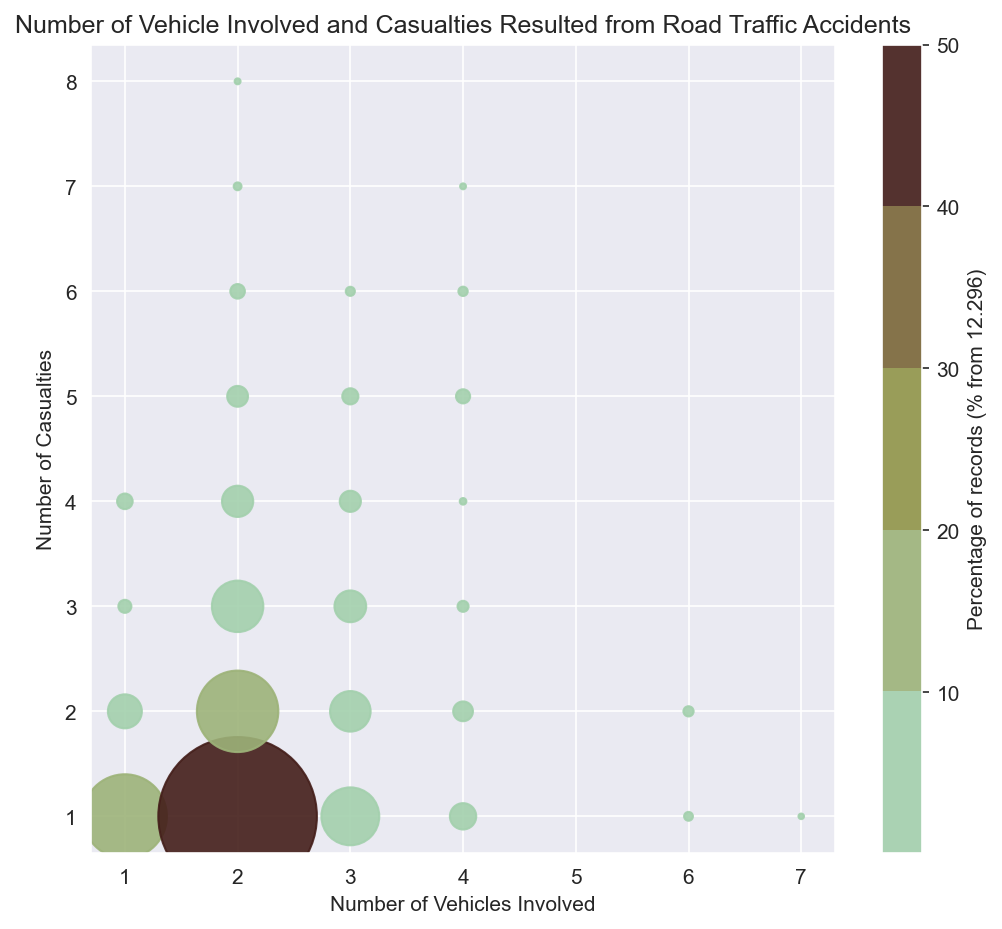

In [59]:
number_vehicle_casualties = accident.groupby(['Number_of_vehicles_involved', 'Number_of_casualties'])['Time'].count().reset_index().rename(columns={'Time':'count'})
number_vehicle_casualties['percent'] = 100*(round(number_vehicle_casualties['count'] / number_vehicle_casualties['count'].sum(),4))

sns.set_style('darkgrid')
plt.figure(figsize=(8,7), dpi = 150)
plt.title('Number of Vehicle Involved and Casualties Resulted from Road Traffic Accidents')
ax = plt.scatter(x= number_vehicle_casualties['Number_of_vehicles_involved'], 
            y= number_vehicle_casualties['Number_of_casualties'], 
            c = number_vehicle_casualties['percent'],
            cmap=color_map4,
            s = number_vehicle_casualties['count'],
            alpha = 0.9,
            vmax = 50
            )
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Casualties')
plt.colorbar().ax.set_ylabel('Percentage of records (% from 12.296)')
plt.show()

In [60]:
accident[['Number_of_vehicles_involved', 'Number_of_casualties']].corr()

Number_of_vehicles_involved  Number_of_casualties
Number_of_vehicles_involved                     1.000000              0.212718
Number_of_casualties                            0.212718              1.000000

In [61]:
number_vehicle_casualties = accident.groupby(['Number_of_vehicles_involved', 'Number_of_casualties'])['Time'].count().reset_index().rename(columns={'Time':'count'})
number_vehicle_casualties['percent'] = 100*(round(number_vehicle_casualties['count'] / number_vehicle_casualties['count'].sum(),4))
number_vehicle_casualties_pivot = number_vehicle_casualties.pivot_table(columns='Number_of_vehicles_involved', index= 'Number_of_casualties', values='percent')

number_vehicle_casualties_pivot = number_vehicle_casualties_pivot.reindex(list(range(8,0,-1)), axis=0)
number_vehicle_casualties_pivot = number_vehicle_casualties_pivot.reindex(list(range(1,8,1)), axis=1)

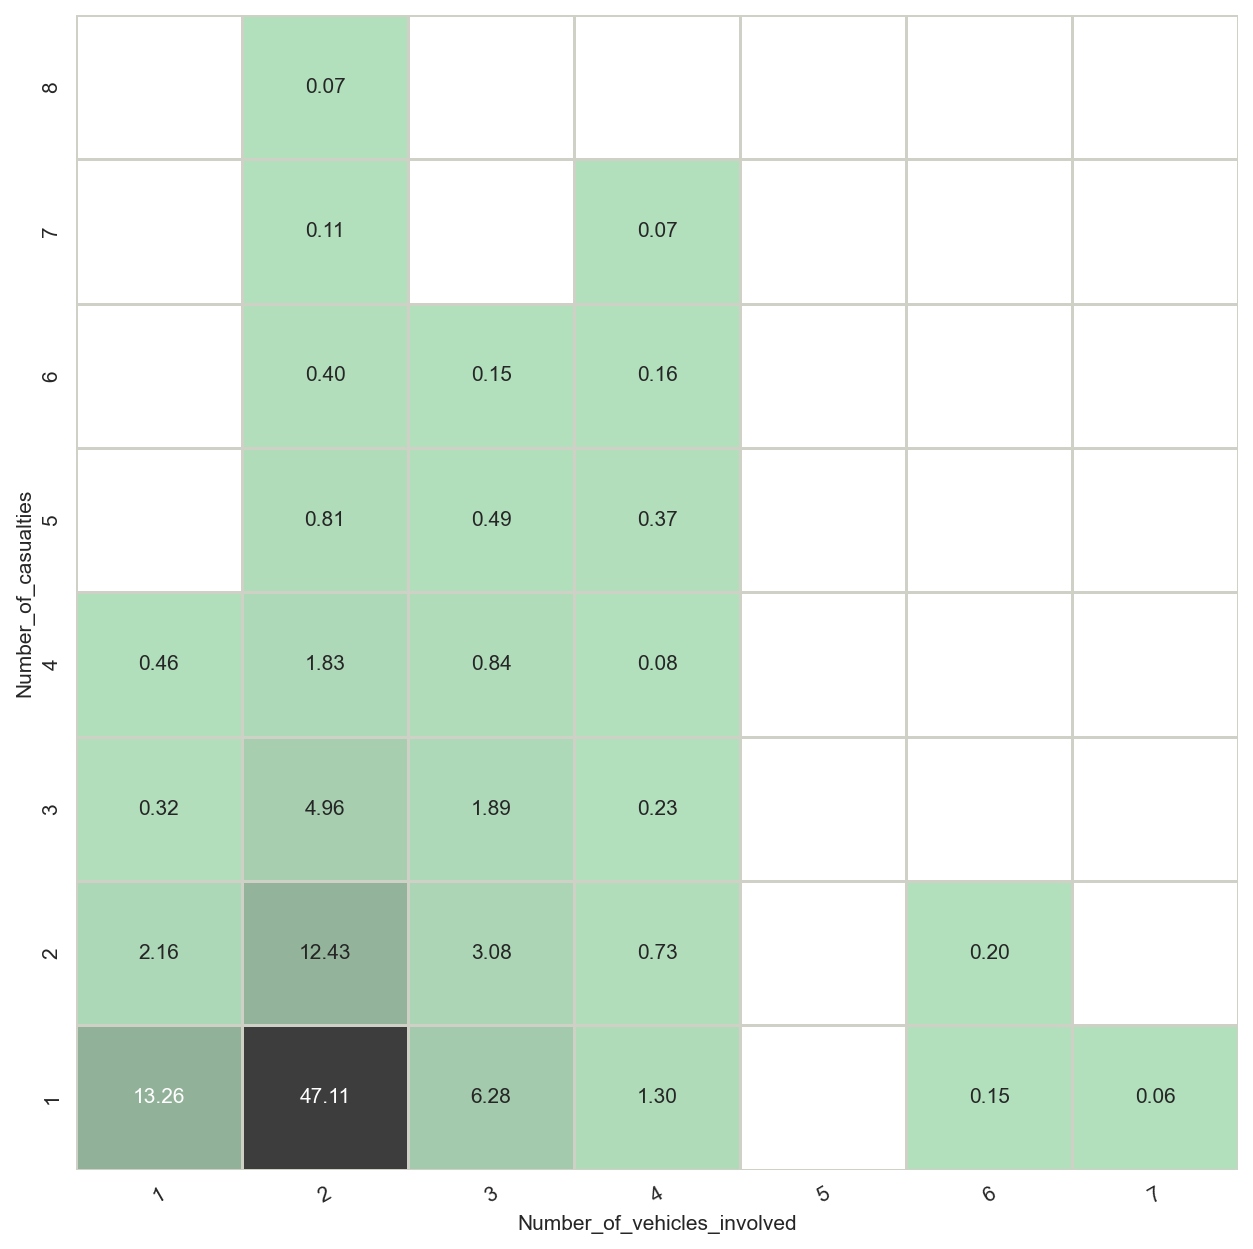

In [62]:
sns.set_style('white')
plt.figure(figsize=(10,10), dpi = 150)
sns.heatmap(number_vehicle_casualties_pivot, 
            cmap= color_map2, 
            annot=True, 
            fmt= '.2f', 
            linewidths=0.5, 
            linecolor='#CFD1C7', 
            cbar=False)
plt.xticks(rotation = 30)
plt.show()

Plot interpretation (2 plots above):
- 47.11% of traffic accidents are involving 2 vehicles with 1 casualties or injured.
- Number of vehicle and casualties have a correlation score of 0.213, which is pretty small correlated.


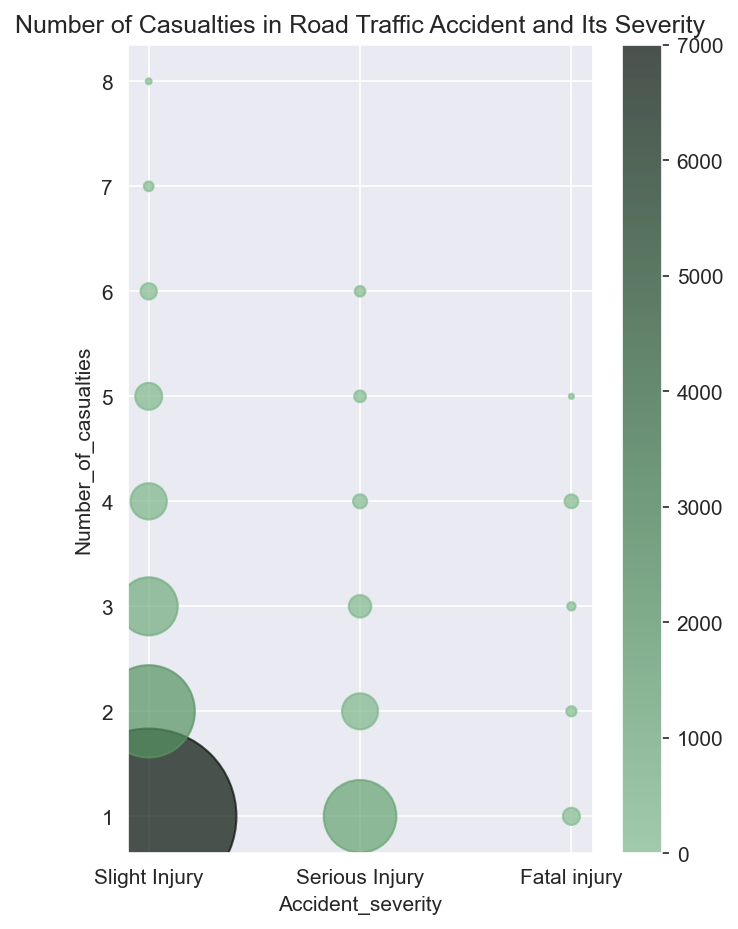

In [63]:
number_casualties_ac_severity = accident.groupby(['Number_of_casualties', 'Accident_severity'])['Time'].count().reset_index().sort_values(by = 'Time',ascending=False).rename(columns={'Time':'count'})

cmap2 = sns.cubehelix_palette(start=2, rot=0, dark=0.05, light=.65, as_cmap=True)

sns.set_style('darkgrid')
plt.figure(figsize=(5,7), dpi = 150)
plt.title('Number of Casualties in Road Traffic Accident and Its Severity')
plt.scatter(x= number_casualties_ac_severity['Accident_severity'], 
            y= number_casualties_ac_severity['Number_of_casualties'], 
            c = number_casualties_ac_severity['count'],
            cmap = cmap2,
            s = number_casualties_ac_severity['count'],
            alpha = 0.7,
            vmin = 0,
            vmax= 7000
            )
plt.xlabel('Accident_severity')
plt.xticks(['Slight Injury', 'Serious Injury', 'Fatal injury'])
plt.ylabel('Number_of_casualties')
plt.colorbar()
plt.show()

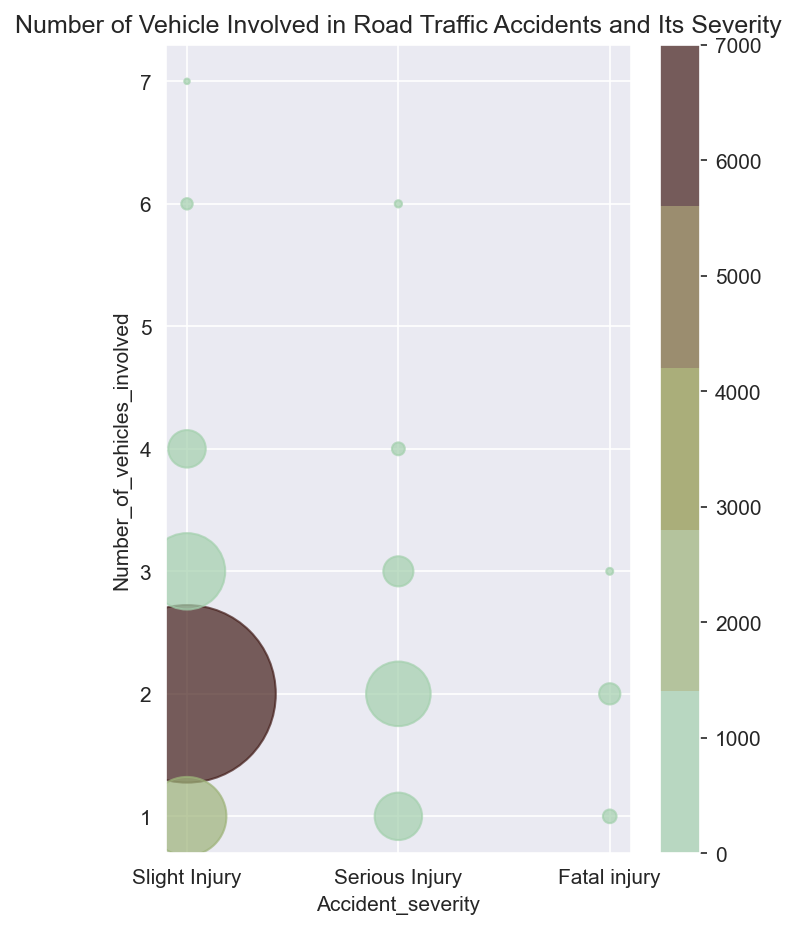

In [64]:
number_vehicle_ac_severity = accident.groupby(['Number_of_vehicles_involved', 'Accident_severity'])['Time'].count().reset_index().sort_values(by = 'Time',ascending=False).rename(columns={'Time':'count'})

sns.set_style('darkgrid')
plt.figure(figsize=(5,7), dpi = 150)
plt.title('Number of Vehicle Involved in Road Traffic Accidents and Its Severity')
plt.scatter(x= number_vehicle_ac_severity['Accident_severity'], 
            y= number_vehicle_ac_severity['Number_of_vehicles_involved'], 
            c = number_vehicle_ac_severity['count'],
            cmap = color_map4,
            s = number_vehicle_ac_severity['count'],
            alpha = 0.7,
            vmin = 0,
            vmax= 7000
            )
plt.xlabel('Accident_severity')
plt.ylabel('Number_of_vehicles_involved')
plt.colorbar()
plt.show()

The numbers follows the biggest records (data are focused on slight injuries), which doesnt give much information.

#### Cause of Every Collisions and Its Consequences

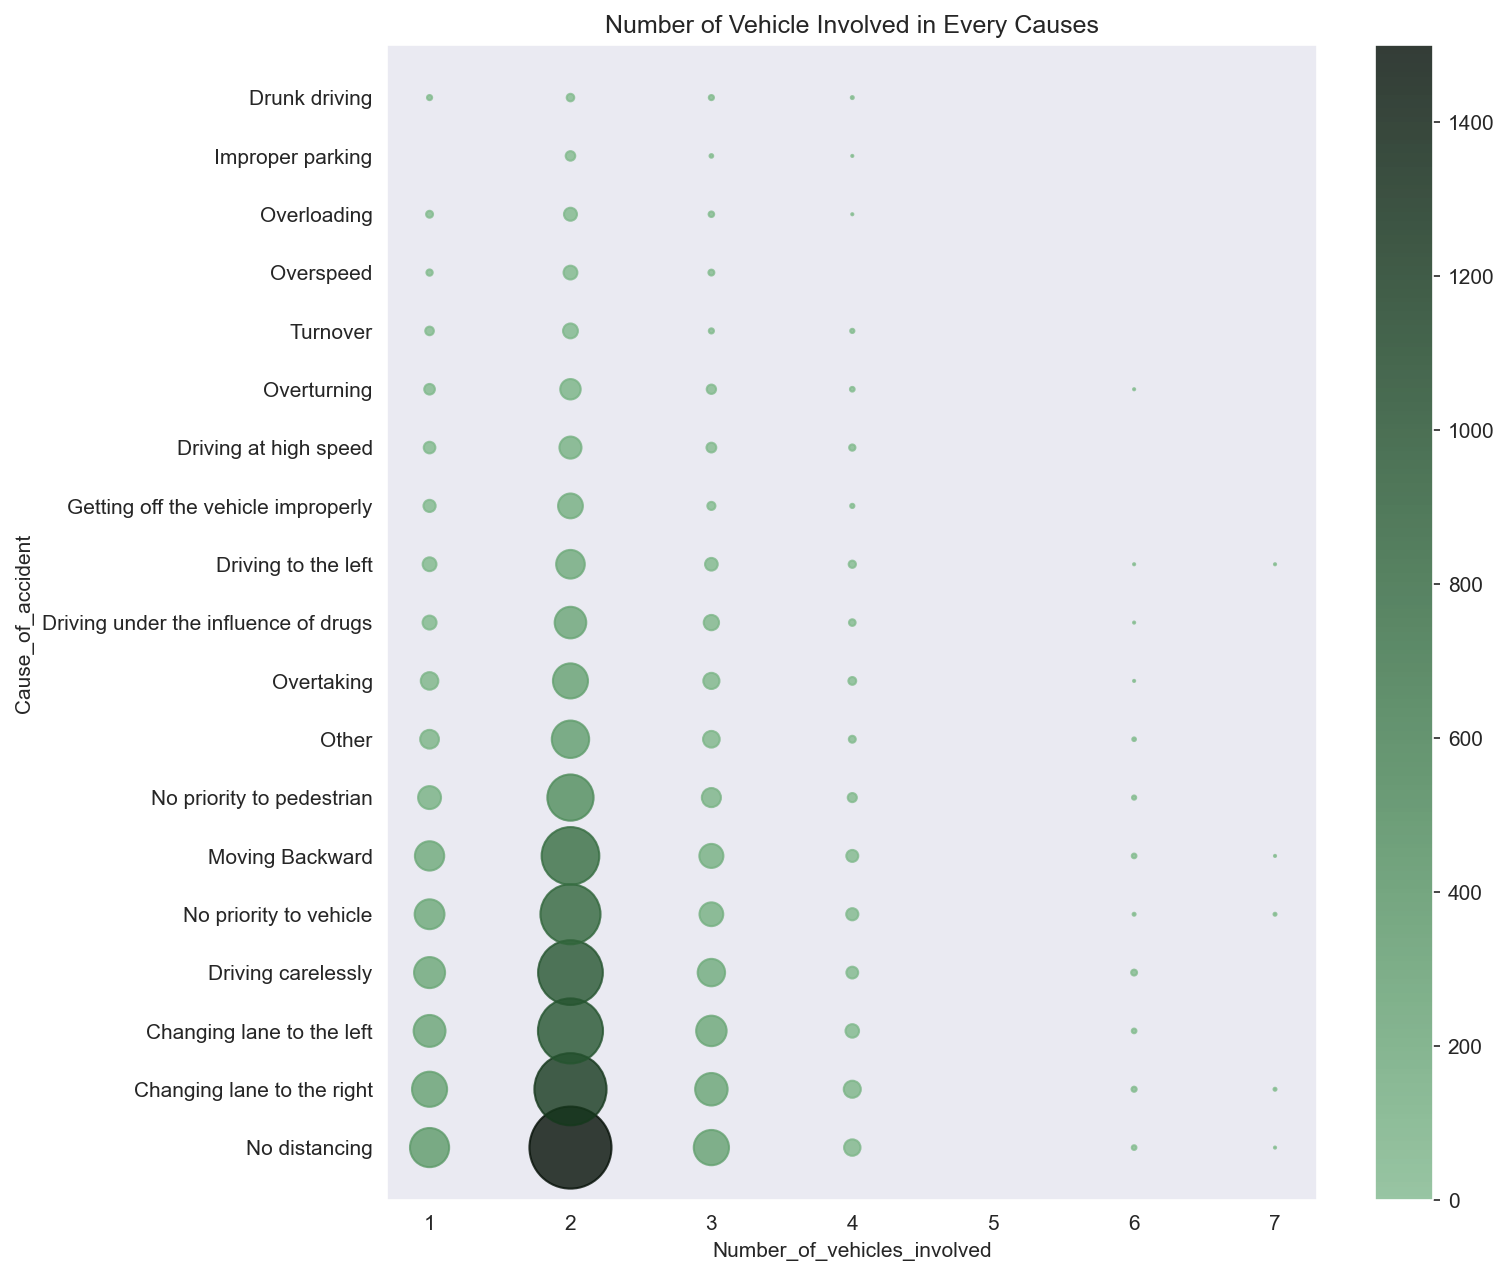

In [65]:
vehicle_invol_by_accident = accident.groupby(['Cause_of_accident', 'Number_of_vehicles_involved'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})

sns.set_style('dark')
plt.figure(figsize=(10,10), dpi = 150)
plt.title('Number of Vehicle Involved in Every Causes')
plt.scatter(y= vehicle_invol_by_accident['Cause_of_accident'], 
            x= vehicle_invol_by_accident['Number_of_vehicles_involved'], 
            c = vehicle_invol_by_accident['count'],
            cmap = cmap2,
            s = vehicle_invol_by_accident['count'],
            alpha = 0.8,
            vmin = 0,
            vmax= 1500
            )
plt.xlabel('Number_of_vehicles_involved')
plt.ylabel('Cause_of_accident')
plt.colorbar()
plt.show()

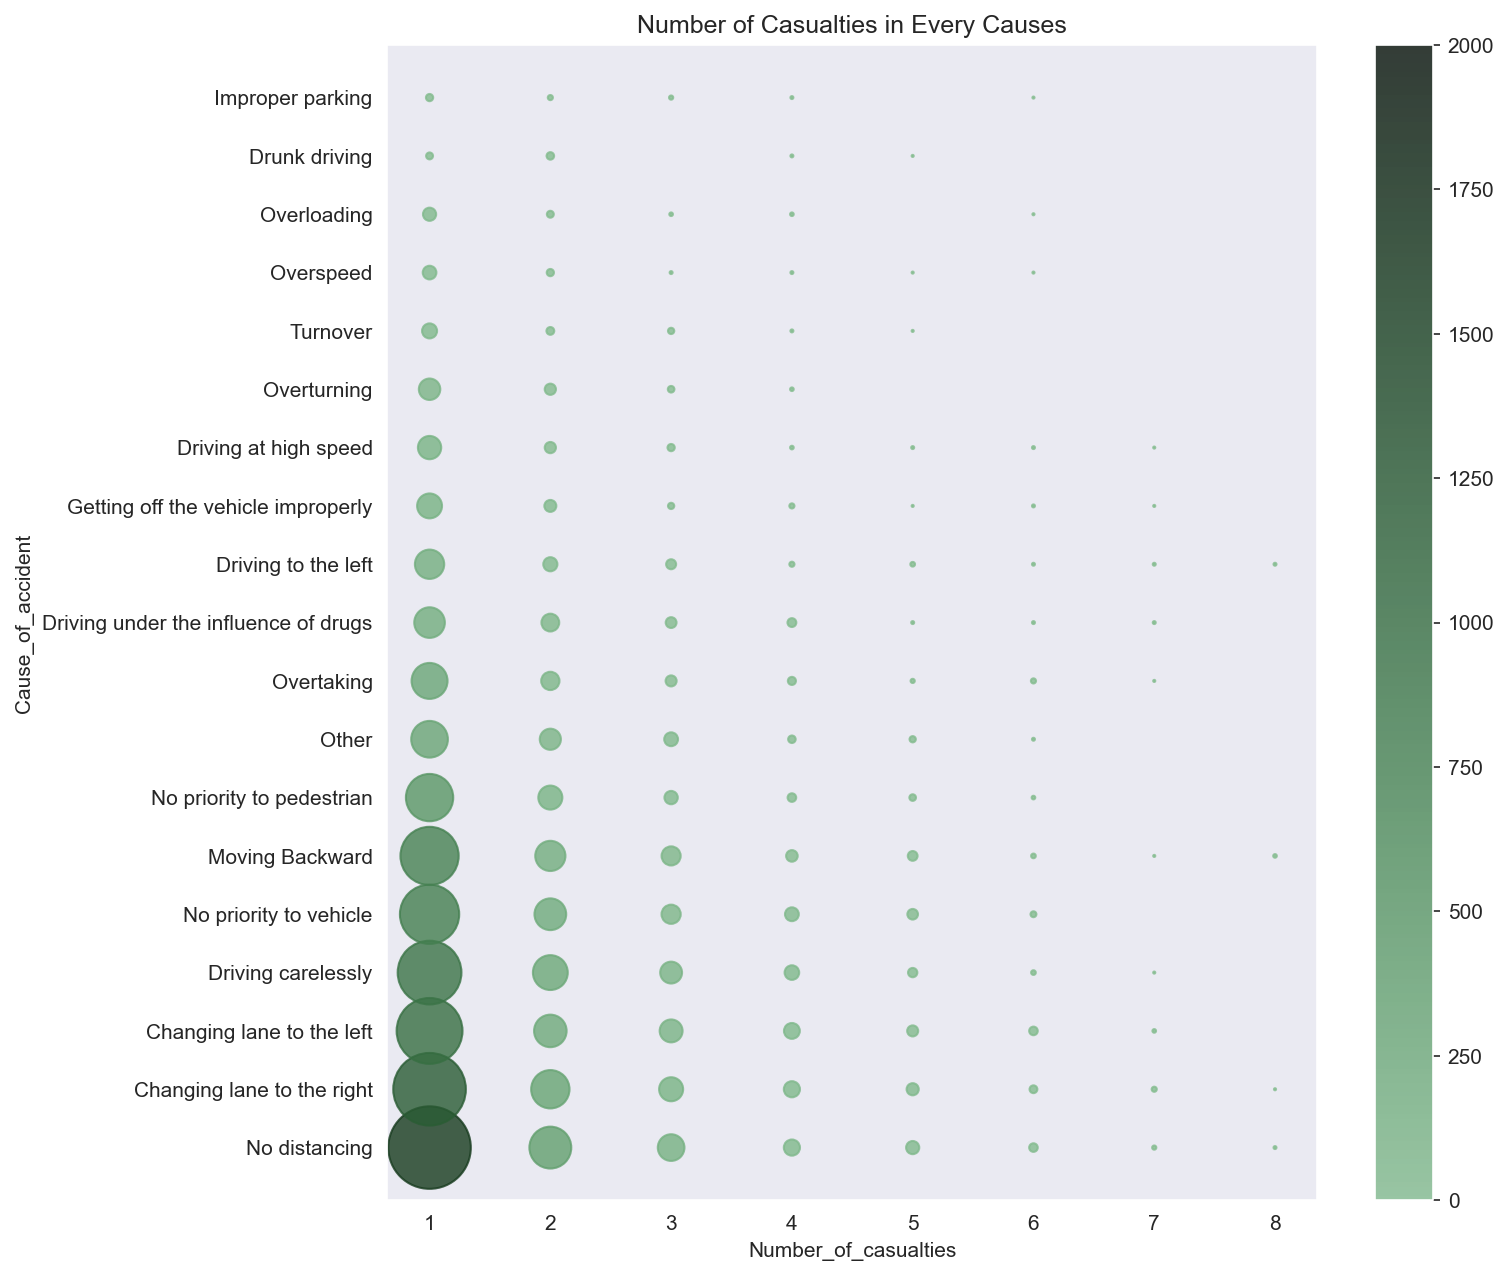

In [66]:
casualty_by_accident = accident.groupby(['Cause_of_accident', 'Number_of_casualties'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})

sns.set_style('dark')
plt.figure(figsize=(10,10), dpi = 150)
plt.title('Number of Casualties in Every Causes')
plt.scatter(y= casualty_by_accident['Cause_of_accident'], 
            x= casualty_by_accident['Number_of_casualties'], 
            c = casualty_by_accident['count'],
            cmap = cmap2,
            s = casualty_by_accident['count'],
            alpha = 0.8,
            vmin = 0,
            vmax= 2000
            )
plt.xlabel('Number_of_casualties')
plt.ylabel('Cause_of_accident')
plt.colorbar()
plt.show()

#### Cause of Accident by Driving Experience

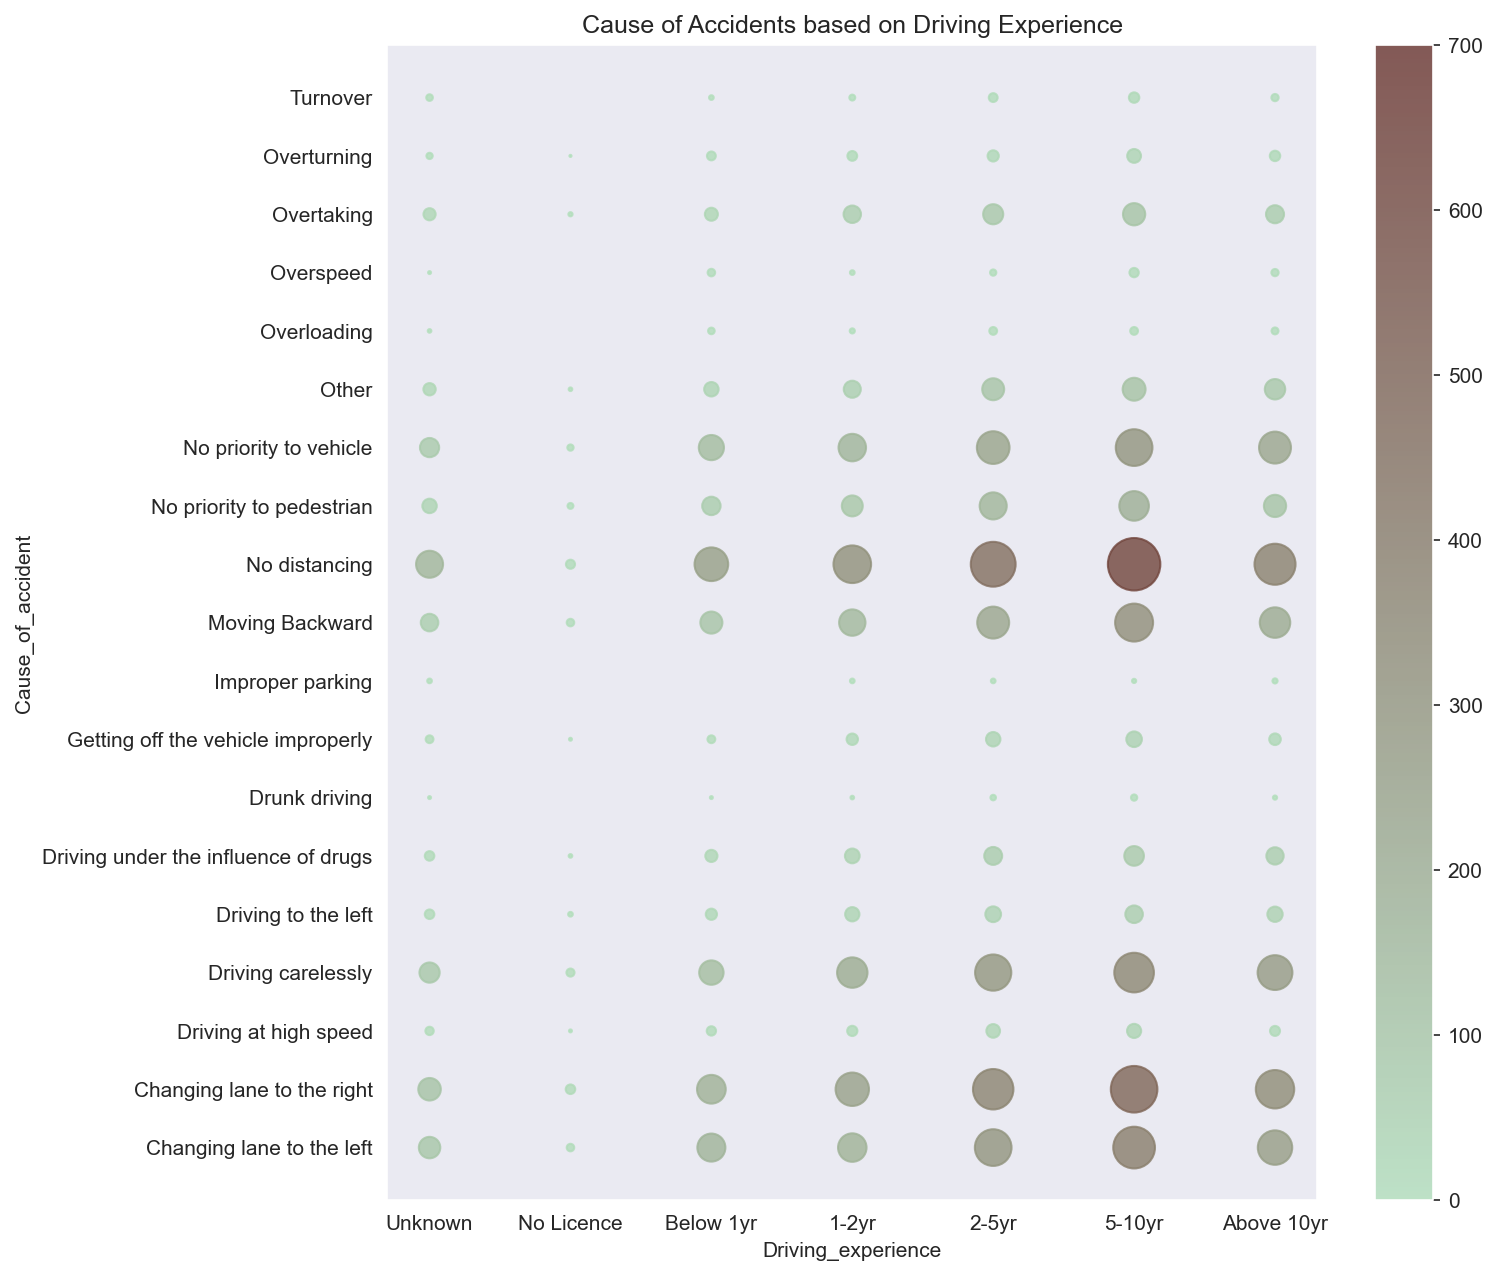

In [67]:
experience_causes = accident.groupby(['Driving_experience', 'Cause_of_accident'])['Time'].count().loc[['Unknown', 'No Licence', 'Below 1yr', '1-2yr', '2-5yr', '5-10yr', 'Above 10yr']].reset_index().rename(columns={'Time':'count'})

sns.set_style('dark')
plt.figure(figsize=(10,10), dpi = 150)
plt.title('Cause of Accidents based on Driving Experience')
plt.scatter(y= experience_causes['Cause_of_accident'], 
            x= experience_causes['Driving_experience'], 
            c = experience_causes['count'],
            cmap = color_map,
            s = experience_causes['count'],
            alpha = 0.8,
            vmin = 0,
            vmax= 700
            )
plt.xlabel('Driving_experience')
plt.ylabel('Cause_of_accident')
plt.colorbar()
plt.show()

Apparently driving experience doesn't seems to be correlated with less accident, so accidents doesn't see the drivers' experience, the risk and danger keep linger to them.

#### Areas with Bad Lighting Conditions and The Accident Severity

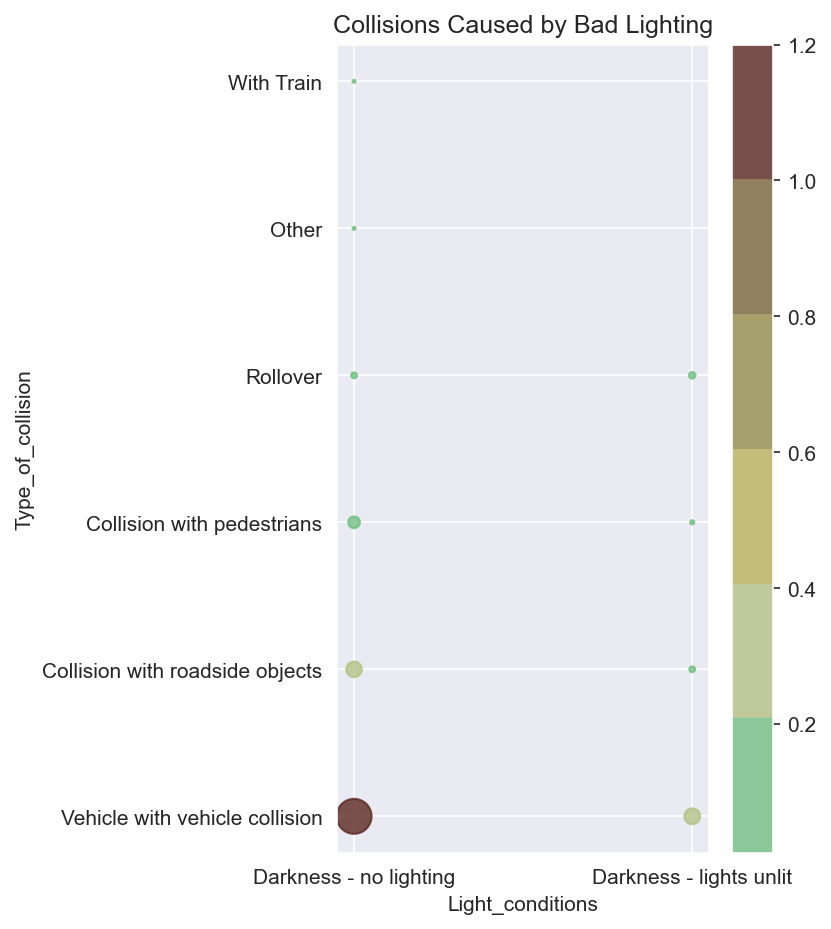

In [68]:
bad_light_collision = accident.groupby(['Light_conditions', 'Type_of_collision'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
bad_light_collision['percent'] = 100*(round(bad_light_collision['count'] / bad_light_collision['count'].sum(), 4))
bad_light_collision_filtered = bad_light_collision[(bad_light_collision['Light_conditions'] == 'Darkness - no lighting') | (bad_light_collision['Light_conditions'] == 'Darkness - lights unlit')]

sns.set_style('darkgrid')
plt.figure(figsize=(4,7), dpi = 150)
plt.title('Collisions Caused by Bad Lighting')
plt.scatter(y= bad_light_collision_filtered['Type_of_collision'], 
            x= bad_light_collision_filtered['Light_conditions'], 
            c = bad_light_collision_filtered['percent'],
            cmap = color_map6,
            s = bad_light_collision_filtered['count']*2,
            alpha = 0.8,
            vmax = 1.2
            )
plt.xlabel('Light_conditions')
plt.ylabel('Type_of_collision')
plt.colorbar()
plt.show()

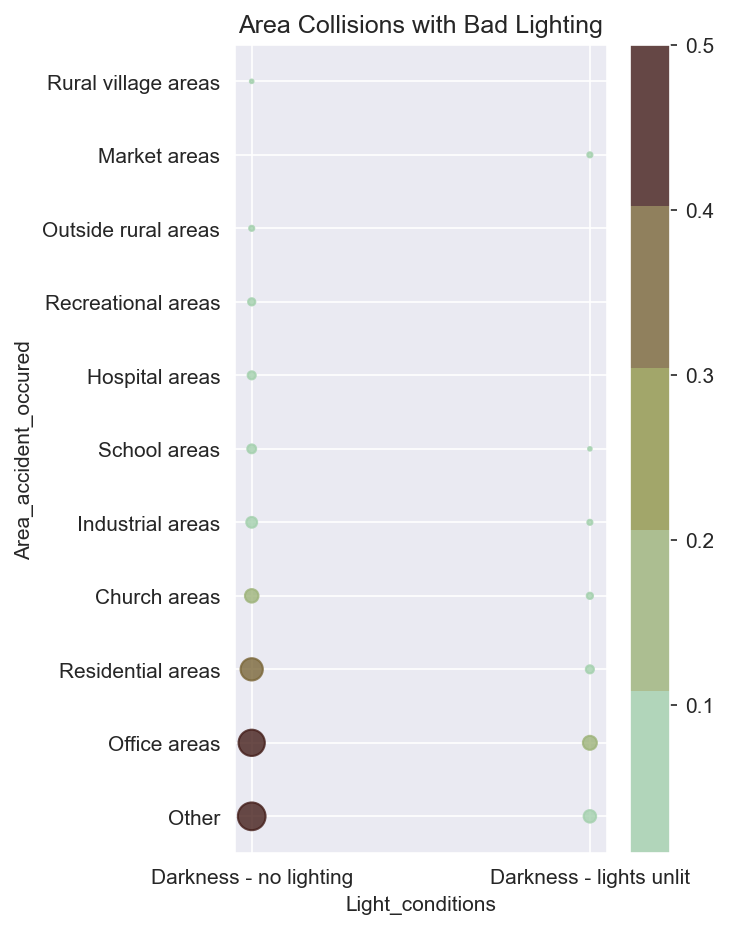

In [69]:
bad_light_area = accident.groupby(['Light_conditions', 'Area_accident_occured'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
bad_light_area['percent'] = 100*(round(bad_light_area['count'] / bad_light_area['count'].sum(), 4))
bad_light_area_filtered = bad_light_area[(bad_light_area['Light_conditions'] == 'Darkness - no lighting') | (bad_light_area['Light_conditions'] == 'Darkness - lights unlit')]

sns.set_style('darkgrid')
plt.figure(figsize=(4,7), dpi = 150)
plt.title('Area Collisions with Bad Lighting')
plt.scatter(y= bad_light_area_filtered['Area_accident_occured'], 
            x= bad_light_area_filtered['Light_conditions'], 
            c = bad_light_area_filtered['percent'],
            cmap = color_map4,
            s = bad_light_area_filtered['count']*3,
            alpha = 0.8,
            vmax = 0.5
            )
plt.xlabel('Light_conditions')
plt.ylabel('Area_accident_occured')
plt.colorbar()
plt.show()

Apparently the accidents more likely to be happen in bad lighting conditions because of no lighting conditions.

#### Areas and Its Roads Condition

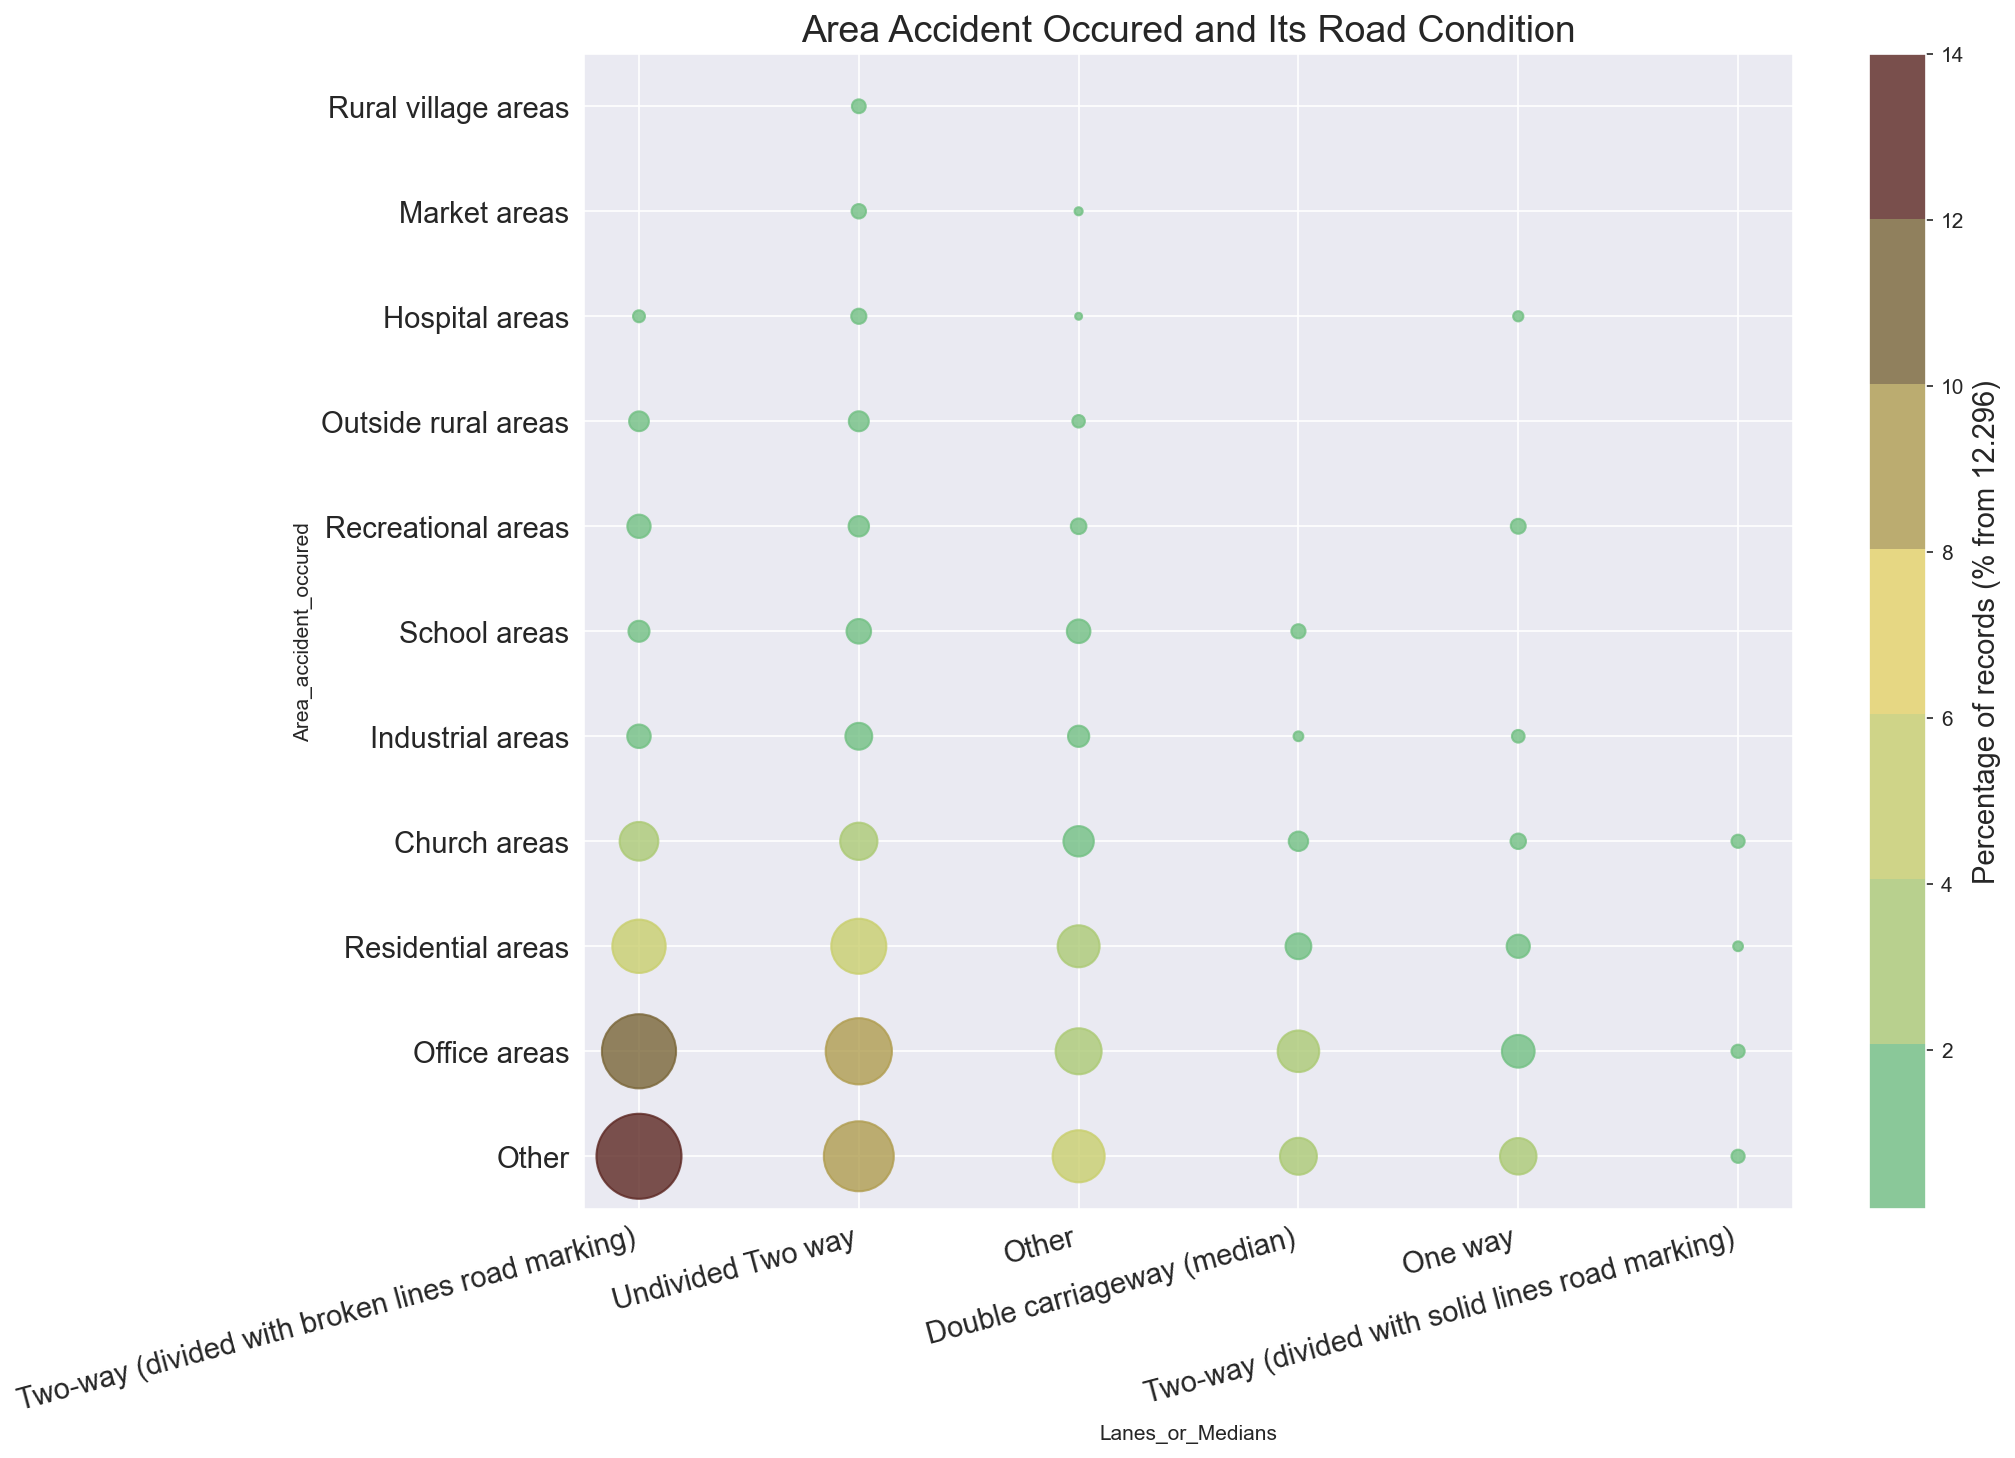

In [70]:
lanes_area = accident.groupby(['Lanes_or_Medians', 'Area_accident_occured'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
lanes_area['percent'] = 100*(round(lanes_area['count'] / lanes_area['count'].sum(), 4))

color_map5 = colors.ListedColormap(['#72C083', '#ACCA75', '#C9CF6E', '#E6D367', '#B09D50', '#7a6638', '#5d2823'])

sns.set_style('darkgrid')
plt.figure(figsize=(13,10), dpi = 150)
plt.title('Area Accident Occured and Its Road Condition', fontsize = 18)
plt.scatter(x= lanes_area['Lanes_or_Medians'], 
            y= lanes_area['Area_accident_occured'], 
            c = lanes_area['percent'],
            cmap = color_map5,
            s = lanes_area['count'],
            alpha = 0.8,
            vmax = 14
            )
plt.xlabel('Lanes_or_Medians')
plt.xticks(rotation = 15, ha = 'right', fontsize = 14)
plt.ylabel('Area_accident_occured')
plt.yticks(fontsize = 14)
plt.colorbar().ax.set_ylabel('Percentage of records (% from 12.296)', fontsize = 14)
plt.show()

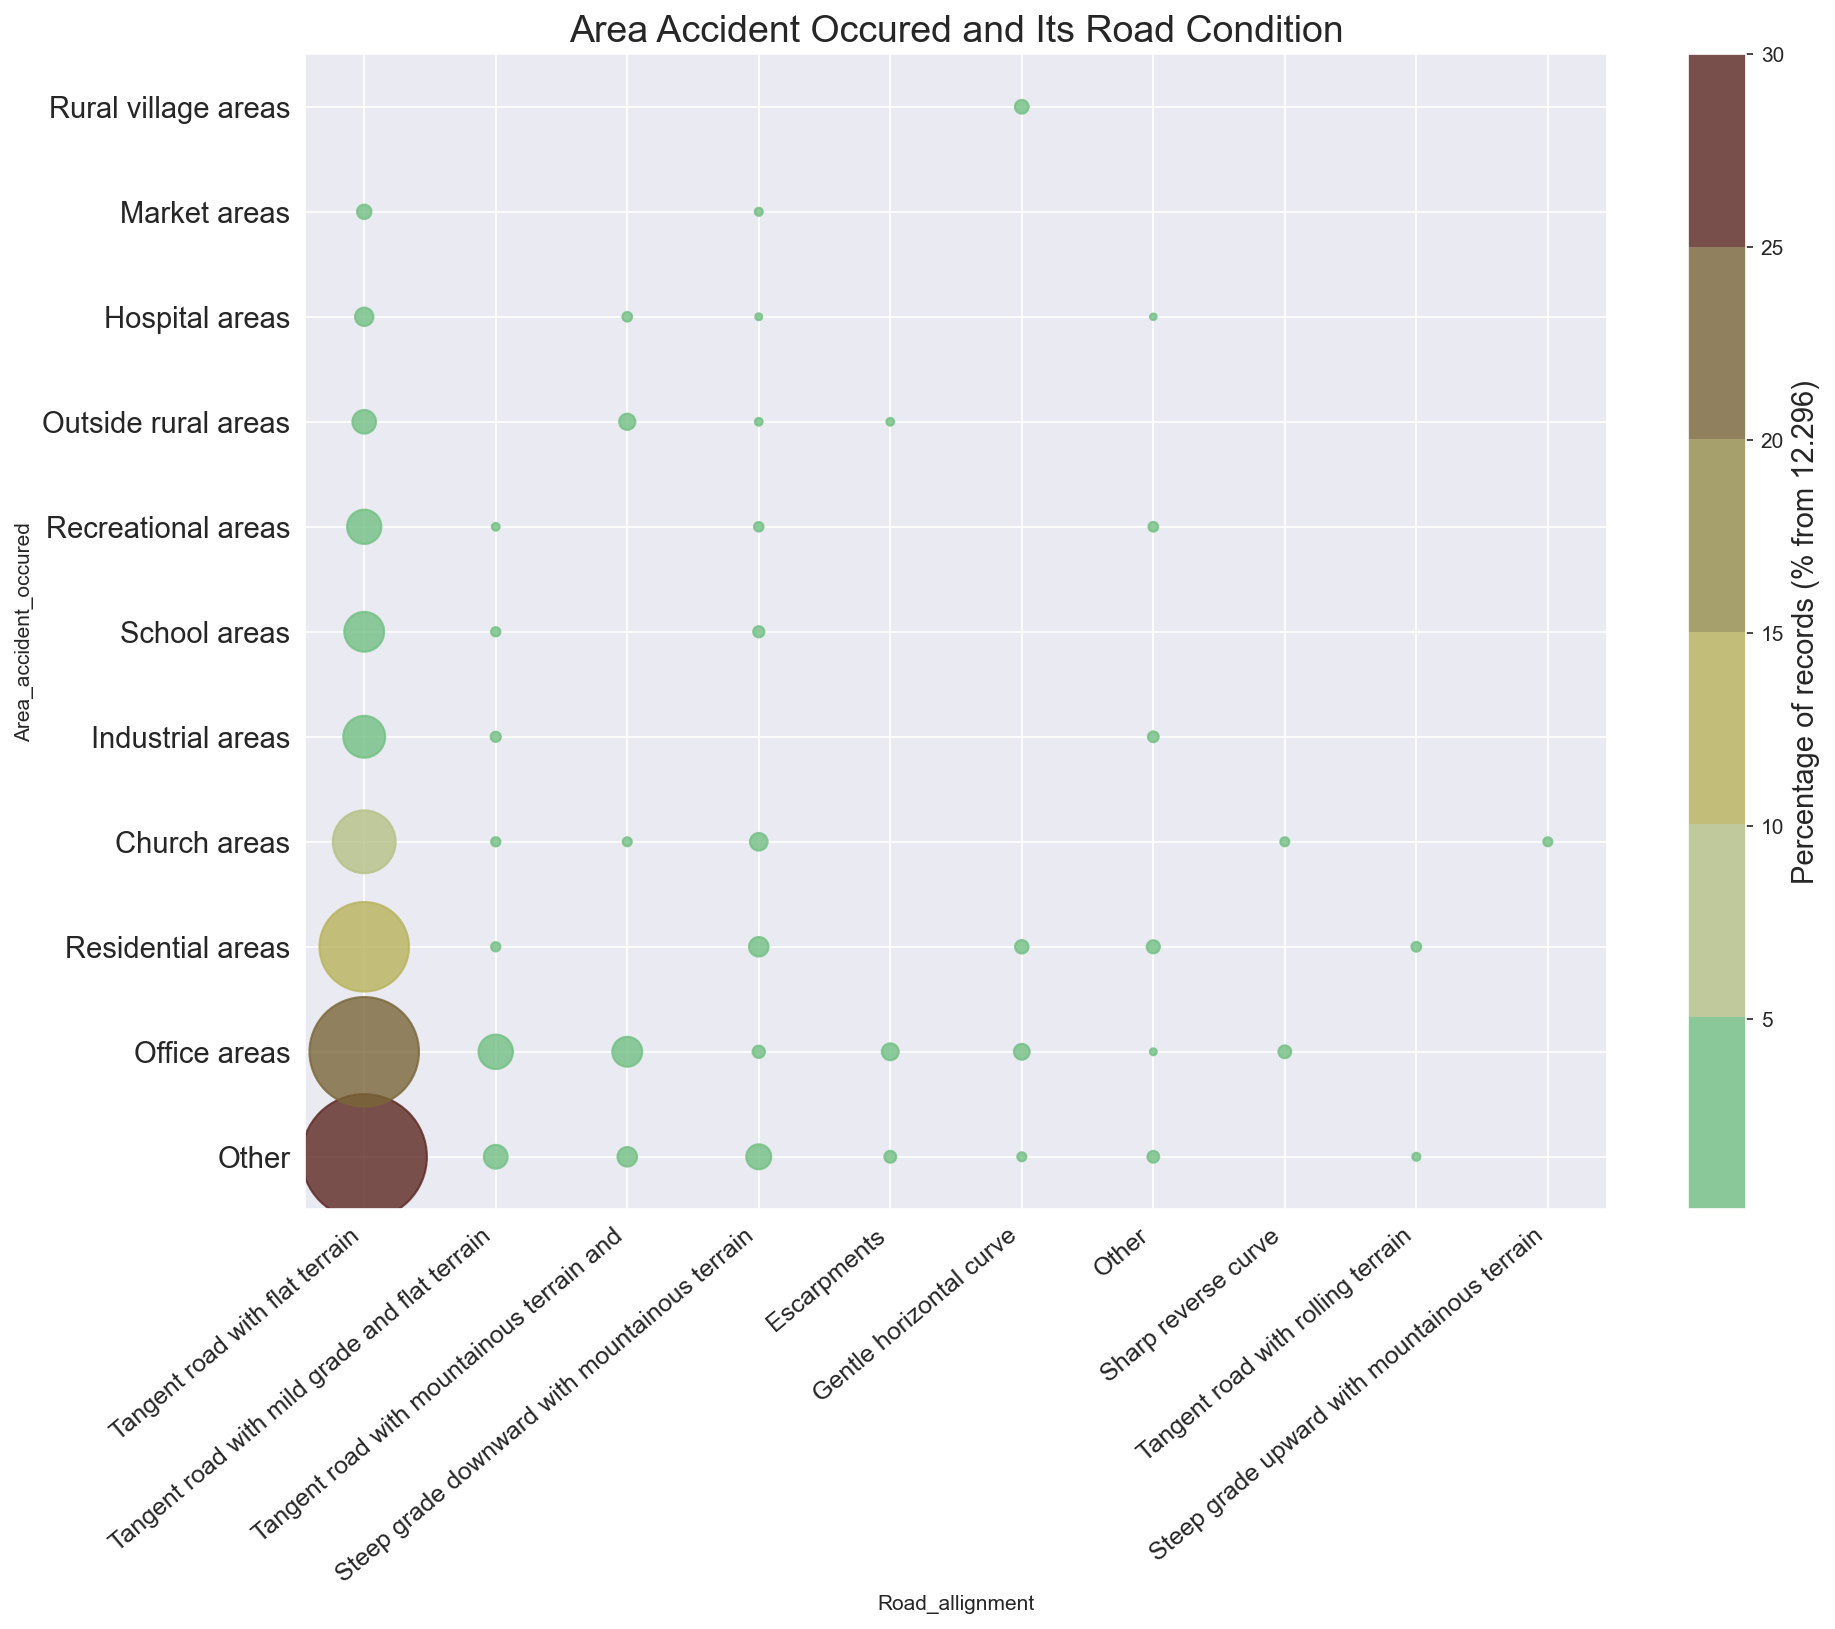

In [71]:
aligment_area = accident.groupby(['Road_allignment', 'Area_accident_occured'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
aligment_area['percent'] = 100*(round(aligment_area['count'] / aligment_area['count'].sum(), 4))

color_map6 = colors.ListedColormap(['#72C083', '#B6C185', '#B8B35C', '#958f4a', '#7a6638', '#5d2823'])

sns.set_style('darkgrid')
plt.figure(figsize=(14,10), dpi = 150)
plt.title('Area Accident Occured and Its Road Condition', fontsize = 18)
plt.scatter(x= aligment_area['Road_allignment'], 
            y= aligment_area['Area_accident_occured'], 
            c = aligment_area['percent'],
            cmap = color_map6,
            s = aligment_area['count'],
            alpha = 0.8,
            vmax = 30
            )
plt.xlabel('Road_allignment')
plt.xticks(rotation = 40, ha = 'right', fontsize = 12)
plt.ylabel('Area_accident_occured')
plt.yticks(fontsize = 14)
plt.colorbar().ax.set_ylabel('Percentage of records (% from 12.296)', fontsize = 14)
plt.show()

Plot interpretation (2 plots above):
- Roads with improper line markings are happened in every area that traffic accidents occur.
- Traffic accidents on undivided two-way road are more likely to be happened in every areas.
- Seems like traffic accidents in rural village areas occurred because of undivided two-way road.
- Accidents on tangent road with flat or mild grade terrain are almost happened on every road, except rural village areas.
- Roads on rural village areas that traffic accidents occurred are only undivided two-way curvy roads.

#### Severity Plots

This section is to see the severity of every causes for feature selection purposes. The rule is selecting features that in accordance to the theory and well-distributed (every target have its representation on each feature)

In [72]:
weather_severity = accident.groupby(['Weather_conditions', 'Accident_severity'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
weather_severity_pivot = weather_severity.pivot_table(index='Weather_conditions', columns= 'Accident_severity', values='count', fill_value = 0)
weather_severity_pivot = weather_severity_pivot.reindex(weather_severity_pivot['Slight Injury'].sort_values(ascending=False).index)
weather_severity_pivot = weather_severity_pivot.reindex(accident_order, axis= 1)

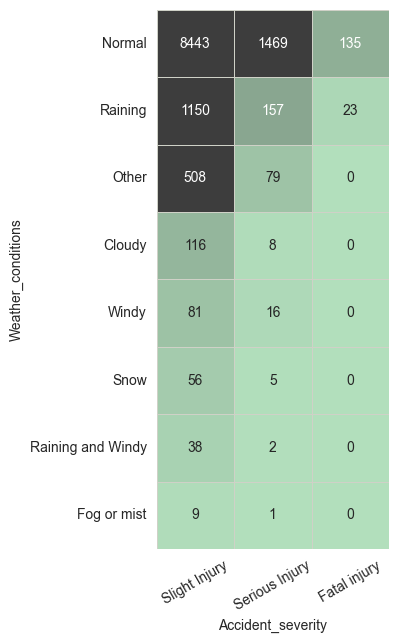

In [73]:
plt.figure(figsize=(3,7))
sns.heatmap(weather_severity_pivot, 
            cmap= color_map2, 
            vmax = 450, 
            annot=True, fmt= '.0f', 
            linewidths=0.5, 
            linecolor='#CFD1C7', 
            cbar=False)
plt.xticks(rotation = 30)
plt.show()

In [74]:
lanes_severity = accident.groupby(['Lanes_or_Medians', 'Accident_severity'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
lanes_severity_pivot = lanes_severity.pivot_table(index='Lanes_or_Medians', columns= 'Accident_severity', values='count', fill_value = 0)
lanes_severity_pivot = lanes_severity_pivot.reindex(lanes_severity_pivot['Slight Injury'].sort_values(ascending=False).index)
lanes_severity_pivot = lanes_severity_pivot.reindex(accident_order, axis= 1)

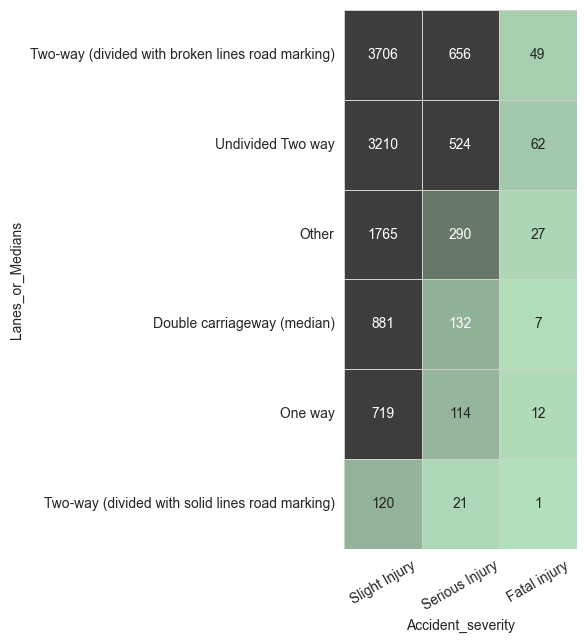

In [75]:
plt.figure(figsize=(3,7))
sns.heatmap(lanes_severity_pivot, 
            cmap= color_map2, 
            vmax = 450, 
            annot=True, fmt= '.0f', 
            linewidths=0.5, 
            linecolor='#CFD1C7', 
            cbar=False)
plt.xticks(rotation = 30)
plt.show()

In [76]:
alignment_severity = accident.groupby(['Road_allignment', 'Accident_severity'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
alignment_severity_pivot = alignment_severity.pivot_table(index='Road_allignment', columns= 'Accident_severity', values='count', fill_value = 0)
alignment_severity_pivot = alignment_severity_pivot.reindex(alignment_severity_pivot['Slight Injury'].sort_values(ascending=False).index)
alignment_severity_pivot = alignment_severity_pivot.reindex(accident_order, axis= 1)

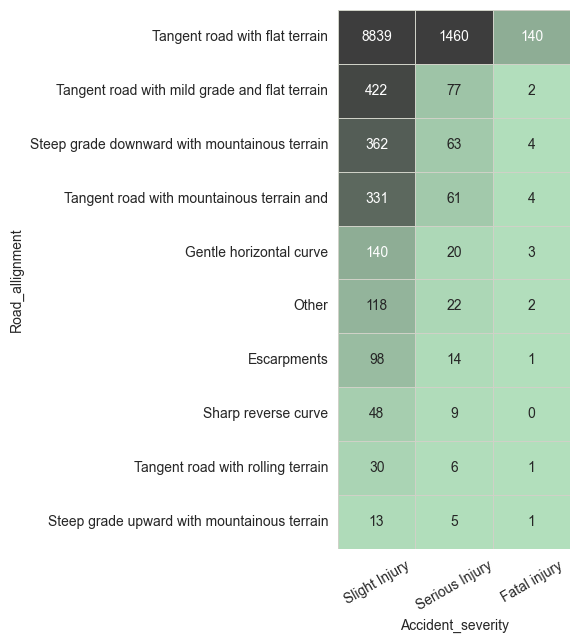

In [77]:
plt.figure(figsize=(3,7))
sns.heatmap(alignment_severity_pivot, 
            cmap= color_map2, 
            vmax = 450, 
            annot=True, fmt= '.0f', 
            linewidths=0.5, 
            linecolor='#CFD1C7', 
            cbar=False)
plt.xticks(rotation = 30)
plt.show()

In [78]:
movement_severity = accident.groupby(['Vehicle_movement', 'Accident_severity'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
movement_severity_pivot = movement_severity.pivot_table(index='Vehicle_movement', columns= 'Accident_severity', values='count', fill_value = 0)
movement_severity_pivot = movement_severity_pivot.reindex(movement_severity_pivot['Slight Injury'].sort_values(ascending=False).index)
movement_severity_pivot = movement_severity_pivot.reindex(accident_order, axis= 1)

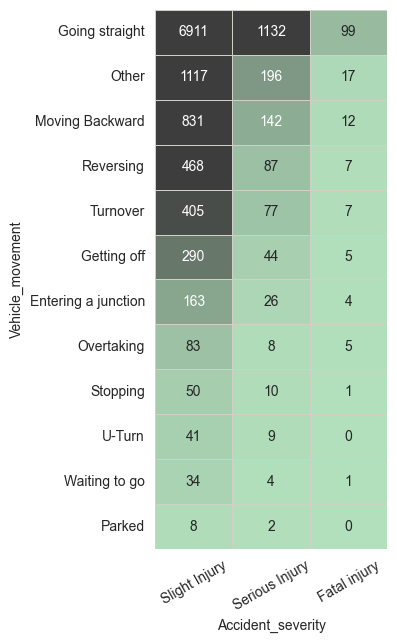

In [79]:
plt.figure(figsize=(3,7))
sns.heatmap(movement_severity_pivot, 
            cmap= color_map2, 
            vmax = 450, 
            annot=True, fmt= '.0f', 
            linewidths=0.5, 
            linecolor='#CFD1C7', 
            cbar=False)
plt.xticks(rotation = 30)
plt.show()

In [80]:
surface_type_severity = accident.groupby(['Road_surface_type', 'Accident_severity'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
surface_type_severity_pivot = surface_type_severity.pivot_table(index='Road_surface_type', columns= 'Accident_severity', values='count', fill_value = 0)
surface_type_severity_pivot = surface_type_severity_pivot.reindex(surface_type_severity_pivot['Slight Injury'].sort_values(ascending=False).index)
surface_type_severity_pivot = surface_type_severity_pivot.reindex(accident_order, axis= 1)

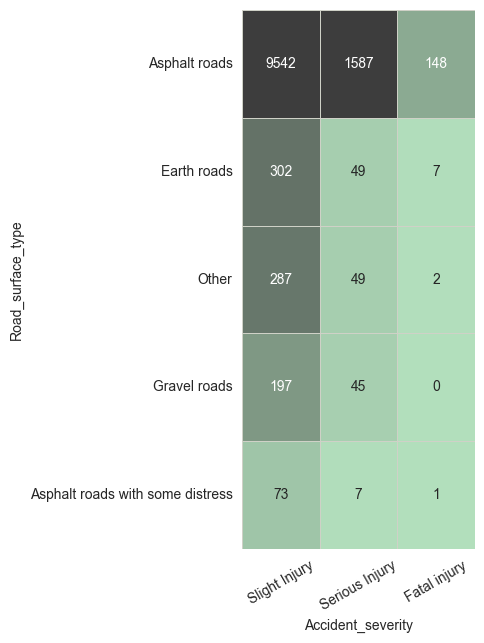

In [81]:
plt.figure(figsize=(3,7))
sns.heatmap(surface_type_severity_pivot, 
            cmap= color_map2, 
            vmax = 450, 
            annot=True, fmt= '.0f', 
            linewidths=0.5, 
            linecolor='#CFD1C7', 
            cbar=False)
plt.xticks(rotation = 30)
plt.show()

In [82]:
surface_condition_severity = accident.groupby(['Road_surface_conditions', 'Accident_severity'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
surface_condition_severity_pivot = surface_condition_severity.pivot_table(index='Road_surface_conditions', columns= 'Accident_severity', values='count', fill_value = 0)
surface_condition_severity_pivot = surface_condition_severity_pivot.reindex(surface_condition_severity_pivot['Slight Injury'].sort_values(ascending=False).index)
surface_condition_severity_pivot = surface_condition_severity_pivot.reindex(accident_order, axis= 1)

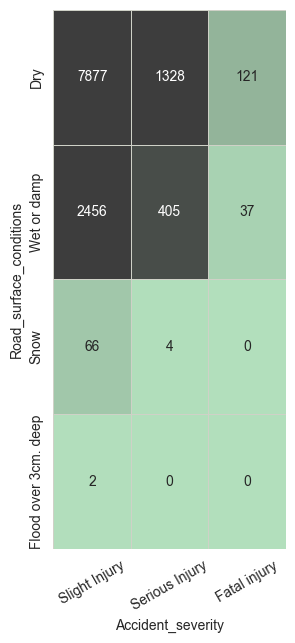

In [83]:
plt.figure(figsize=(3,7))
sns.heatmap(surface_condition_severity_pivot, 
            cmap= color_map2, 
            vmax = 450, 
            annot=True, fmt= '.0f', 
            linewidths=0.5, 
            linecolor='#CFD1C7', 
            cbar=False)
plt.xticks(rotation = 30)
plt.show()

In [84]:
service_severity = accident.groupby(['Service_year_of_vehicle', 'Accident_severity'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
service_severity_pivot = service_severity.pivot_table(index='Service_year_of_vehicle', columns= 'Accident_severity', values='count', fill_value = 0)
service_severity_pivot = service_severity_pivot.reindex(service_severity_pivot['Slight Injury'].sort_values(ascending=False).index)
service_severity_pivot = service_severity_pivot.reindex(accident_order, axis= 1)

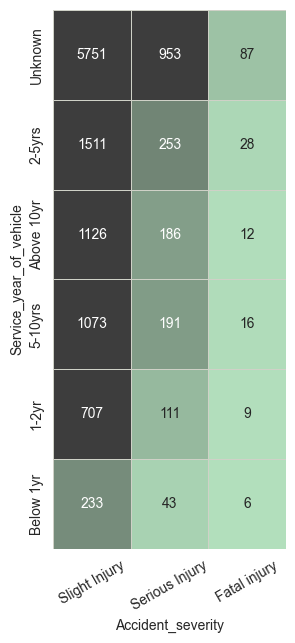

In [85]:
plt.figure(figsize=(3,7))
sns.heatmap(service_severity_pivot, 
            cmap= color_map2, 
            vmax = 450, 
            annot=True, fmt= '.0f', 
            linewidths=0.5, 
            linecolor='#CFD1C7', 
            cbar=False)
plt.xticks(rotation = 30)
plt.show()

In [86]:
exp_severity = accident.groupby(['Driving_experience', 'Accident_severity'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
exp_severity_pivot = exp_severity.pivot_table(index='Driving_experience', columns= 'Accident_severity', values='count', fill_value = 0)
exp_severity_pivot = exp_severity_pivot.reindex(exp_severity_pivot['Slight Injury'].sort_values(ascending=False).index)
exp_severity_pivot = exp_severity_pivot.reindex(accident_order, axis= 1)

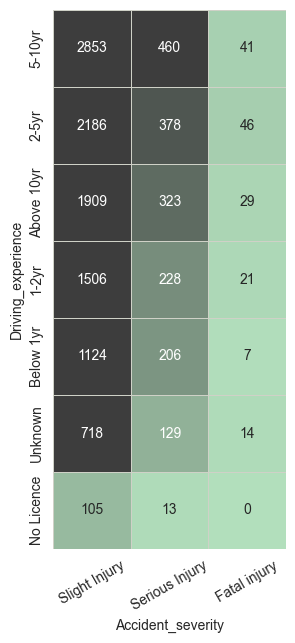

In [87]:
plt.figure(figsize=(3,7))
sns.heatmap(exp_severity_pivot, 
            cmap= color_map2, 
            vmax = 450, 
            annot=True, fmt= '.0f', 
            linewidths=0.5, 
            linecolor='#CFD1C7', 
            cbar=False)
plt.xticks(rotation = 30)
plt.show()

In [88]:
edu_severity = accident.groupby(['Educational_level', 'Accident_severity'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
edu_severity_pivot = edu_severity.pivot_table(index='Educational_level', columns= 'Accident_severity', values='count', fill_value = 0)
edu_severity_pivot = edu_severity_pivot.reindex(edu_severity_pivot['Slight Injury'].sort_values(ascending=False).index)
edu_severity_pivot = edu_severity_pivot.reindex(accident_order, axis= 1)

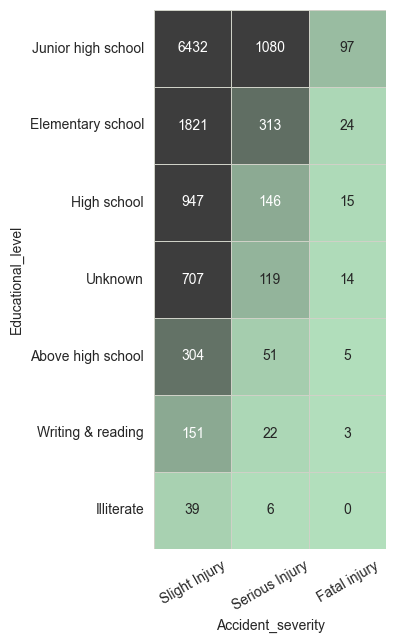

In [89]:
plt.figure(figsize=(3,7))
sns.heatmap(edu_severity_pivot, 
            cmap= color_map2, 
            vmax = 450, 
            annot=True, fmt= '.0f', 
            linewidths=0.5, 
            linecolor='#CFD1C7', 
            cbar=False)
plt.xticks(rotation = 30)
plt.show()

In [90]:
age_severity = accident.groupby(['Age_band_of_driver', 'Accident_severity'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
age_severity_pivot = age_severity.pivot_table(index='Age_band_of_driver', columns= 'Accident_severity', values='count', fill_value = 0)
age_severity_pivot = age_severity_pivot.reindex(age_severity_pivot['Slight Injury'].sort_values(ascending=False).index)
age_severity_pivot = age_severity_pivot.reindex(accident_order, axis= 1)

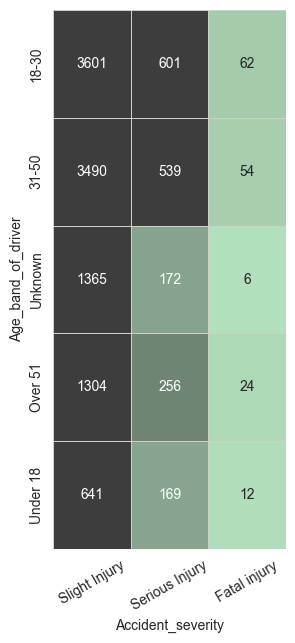

In [91]:
plt.figure(figsize=(3,7))
sns.heatmap(age_severity_pivot, 
            cmap= color_map2, 
            vmax = 450, 
            annot=True, fmt= '.0f', 
            linewidths=0.5, 
            linecolor='#CFD1C7', 
            cbar=False)
plt.xticks(rotation = 30)
plt.show()

In [92]:
area_severity = accident.groupby(['Area_accident_occured', 'Accident_severity'])['Time'].count().reset_index().sort_values(by = 'Time', ascending=False).rename(columns={'Time':'count'})
area_severity_pivot = area_severity.pivot_table(index='Area_accident_occured', columns= 'Accident_severity', values='count', fill_value = 0)
area_severity_pivot = area_severity_pivot.reindex(area_severity_pivot['Slight Injury'].sort_values(ascending=False).index)
area_severity_pivot = area_severity_pivot.reindex(accident_order, axis= 1)

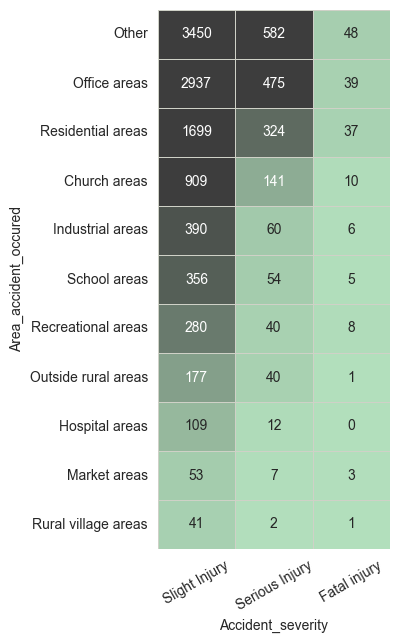

In [93]:
plt.figure(figsize=(3,7))
sns.heatmap(area_severity_pivot, 
            cmap= color_map2, 
            vmax = 450, 
            annot=True, fmt= '.0f', 
            linewidths=0.5, 
            linecolor='#CFD1C7', 
            cbar=False)
plt.xticks(rotation = 30)
plt.show()

In this plots, 

## Statistical Testing (Chi-Square)

In [95]:
cols = accident.columns.to_list()

In [96]:
from scipy.stats import chi2_contingency

dependent = [] # p-value <= alpha
independent = [] # p-value > alpha
alpha = 0.05

for i in cols:
    encode_table = pd.crosstab(accident[i], accident['Accident_severity'])
    chi2, p, dof, expected = chi2_contingency(encode_table)
    if (p >= alpha): # type: ignore
        independent.append(i)
    elif (p < alpha) & (p != 0): # type: ignore
        dependent.append(i)

In [97]:
dependent

['Day_of_week',
 'Age_band_of_driver',
 'Type_of_vehicle',
 'Area_accident_occured',
 'Types_of_Junction',
 'Light_conditions',
 'Weather_conditions',
 'Number_of_vehicles_involved',
 'Number_of_casualties',
 'Age_band_of_casualty',
 'Hour_of_day',
 'Single_pileup_collision',
 'Weekday-weekend']

In [98]:
dependent.remove('Single_pileup_collision')
dependent.remove('Weekday-weekend')

In [99]:
encode_table = pd.crosstab(accident['Weather_conditions'], accident['Accident_severity'])
encode_table

Accident_severity   Fatal injury  Serious Injury  Slight Injury
Weather_conditions                                             
Cloudy                         0               8            116
Fog or mist                    0               1              9
Normal                       135            1469           8443
Other                          0              79            508
Raining                       23             157           1150
Raining and Windy              0               2             38
Snow                           0               5             56
Windy                          0              16             81

In [100]:
chi2, p, dof, expected = chi2_contingency(encode_table)
print(f"Chi-Square: {chi2}, P-Value: {p}")

Chi-Square: 33.97371936588112, P-Value: 0.002080745827355591


H0: features and Accident_severity aren't dependent (independent variables)
H1: features and Accident_severity are dependent variables

In [101]:
alpha = 0.05
if p >= alpha: # type: ignore
    print("is not dependent/significant (independent)")
else:
    print("is dependent/significant")

is dependent/significant


For better machine learning results, we'll use dependent features to accident severity through Chi-Square

## D. Predictive Machine Learning Application

### 1. Dataset Preparation

In [102]:
# split dataset into feature and target
feature = accident[dependent]
target = accident[['Accident_severity']]

In [103]:
# incase when native features and target are needed
feature_native = feature.copy()
target_native = target.copy()

In [104]:
feature_native.head()

Day_of_week Age_band_of_driver      Type_of_vehicle Area_accident_occured  \
0      Monday              18-30           Automobile     Residential areas   
1      Monday              31-50  Public (> 45 seats)          Office areas   
2      Monday              18-30      Lorry (41-100Q)    Recreational areas   
3      Sunday              18-30  Public (> 45 seats)          Office areas   
4      Sunday              18-30                Other      Industrial areas   

  Types_of_Junction       Light_conditions Weather_conditions  \
0       No junction               Daylight             Normal   
1       No junction               Daylight             Normal   
2       No junction               Daylight             Normal   
3           Y Shape  Darkness - lights lit             Normal   
4           Y Shape  Darkness - lights lit             Normal   

   Number_of_vehicles_involved  Number_of_casualties Age_band_of_casualty  \
0                            2                     2                   NA   
1                            2                     2                   NA   
2                            2                     2                31-50   
3                            2                     2                18-30   
4                            2                     2                   NA   

   Hour_of_day  
0           17  
1           17  
2           17  
3            1  
4            1

In [105]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12296 entries, 0 to 12315
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12296 non-null  object
 1   Age_band_of_driver           12296 non-null  object
 2   Type_of_vehicle              12296 non-null  object
 3   Area_accident_occured        12296 non-null  object
 4   Types_of_Junction            12296 non-null  object
 5   Light_conditions             12296 non-null  object
 6   Weather_conditions           12296 non-null  object
 7   Number_of_vehicles_involved  12296 non-null  int32 
 8   Number_of_casualties         12296 non-null  int32 
 9   Age_band_of_casualty         12296 non-null  object
 10  Hour_of_day                  12296 non-null  int32 
dtypes: int32(3), object(8)
memory usage: 1008.7+ KB


a `fatal injury` is one which causes death less than 30 days after the accident; <br>
a `fatal accident` is an accident in which at least one person is fatally injured;

a `serious accident` is one in which at least one person is seriously injured, but no-one suffers a fatal injury; <br>
a `serious injury` is one which does not cause death less than 30 days after the accident, and which is in one (or more) of the following categories:
- an injury for which a person is detained in hospital as an in-patient; 
- any of the following injuries (whether or not the person is detained in hospital): fractures, concussion, internal injuries, crushings, severe cuts and lacerations, severe general shock requiring treatment
- any injury causing death 30 or more days after the accident;


a `slight injury` is any injury which is neither fatal nor serious – for example, a sprain, bruise or cut which is not judged to be severe, or slight shock requiring roadside attention;<br>
a `slight accident` is one in which at least one person suffers slight injuries, but no-one is seriously injured, or fatally injured.

Since the model will be used to predict how many equipments and rescue labor needed based on accident severity, and seems like the equipment needed for Fatal and Serious accident are the same (both need more tow trucks, ambulances, and probably helicopters), we can merge it into one value, such as Serious to Fatal Accident.

In [106]:
# merge Serious and Fatal Injury for simpler confusion matrix and class weighting/sampling

target = target.mask(target == 'Slight Injury', 'Slight Accident')
target = target.mask(target == 'Serious Injury', 'Serious to Fatal Accident')
target = target.mask(target == 'Fatal injury', 'Serious to Fatal Accident')

In [107]:
dependent

['Day_of_week',
 'Age_band_of_driver',
 'Type_of_vehicle',
 'Area_accident_occured',
 'Types_of_Junction',
 'Light_conditions',
 'Weather_conditions',
 'Number_of_vehicles_involved',
 'Number_of_casualties',
 'Age_band_of_casualty',
 'Hour_of_day']

In [108]:
# group features into ordinal categories and non-ordinal category
cat = ['Day_of_week',
 'Type_of_vehicle',
 'Area_accident_occured',
 'Types_of_Junction',
 'Light_conditions',
 'Weather_conditions']
cat_ord = ['Age_band_of_driver', 'Age_band_of_casualty']

# get dummies (one-hot encoding)
feature = pd.get_dummies(feature, columns=cat, dtype=int)
target = pd.get_dummies(target, columns=['Accident_severity'], dtype=int)
target = target.drop(columns= ['Accident_severity_Slight Accident'])

# drop Other/Unknown values
keyword = ['Unknown', 'Other', 'Monday']
for i in keyword:
    feature = feature.drop(columns= list(feature.columns[feature.columns.str.contains(i)]))

In [109]:
accident['Age_band_of_casualty'].value_counts()

Age_band_of_casualty
NA          4435
18-30       3139
31-50       2450
Under 18    1034
Over 51      994
5            244
Name: count, dtype: int64

In [110]:
# mapping ordinal feature
map_age_driver = {'Under 18': 1, 'Unknown': 2, '18-30': 3, '31-50': 4, 'Over 51': 5}
map_age_casualty = {'5': 1, 'Under 18': 2, 'NA': 3, '18-30': 4, '31-50': 5, 'Over 51': 6}

In [111]:
# ordinal encoding
feature['Age_band_of_driver'] = feature['Age_band_of_driver'].map(map_age_driver)
feature['Age_band_of_casualty'] = feature['Age_band_of_casualty'].map(map_age_casualty)

In [112]:
feature

Age_band_of_driver  Number_of_vehicles_involved  Number_of_casualties  \
0                       3                            2                     2   
1                       4                            2                     2   
2                       3                            2                     2   
3                       3                            2                     2   
4                       3                            2                     2   
...                   ...                          ...                   ...   
12311                   4                            2                     1   
12312                   2                            2                     1   
12313                   5                            1                     1   
12314                   3                            2                     1   
12315                   3                            2                     1   

       Age_band_of_casualty  Hour_of_day  Day_of_week_Friday  \
0                         3           17                   0   
1                         3           17                   0   
2                         5           17                   0   
3                         4            1                   0   
4                         3            1                   0   
...                     ...          ...                 ...   
12311                     3           16                   0   
12312                     3           18                   0   
12313                     5           13                   0   
12314                     3           13                   0   
12315                     1           13                   0   

       Day_of_week_Saturday  Day_of_week_Sunday  Day_of_week_Thursday  \
0                         0                   0                     0   
1                         0                   0                     0   
2                         0                   0                     0   
3                         0                   1                     0   
4                         0                   1                     0   
...                     ...                 ...                   ...   
12311                     0                   0                     0   
12312                     0                   1                     0   
12313                     0                   1                     0   
12314                     0                   1                     0   
12315                     0                   1                     0   

       Day_of_week_Tuesday  Day_of_week_Wednesday  Type_of_vehicle_Automobile  \
0                        0                      0                           1   
1                        0                      0                           0   
2                        0                      0                           0   
3                        0                      0                           0   
4                        0                      0                           0   
...                    ...                    ...                         ...   
12311                    0                      1                           0   
12312                    0                      0                           1   
12313                    0                      0                           0   
12314                    0                      0                           0   
12315                    0                      0                           0   

       Type_of_vehicle_Bajaj  Type_of_vehicle_Bicycle  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   
...                      ...                      ...   
12311                      0

In [113]:
# extract feature columns name into list
feature_names = feature.columns.to_list()

In [114]:
# find the number of balanced class weight
from collections import Counter

class_counts = Counter(target['Accident_severity_Serious to Fatal Accident'])
total_samples = sum(class_counts.values())

class_weights = {label: total_samples / (len(class_counts) * count) 
                 for label, count in class_counts.items()}

print(class_weights)

{0: 0.5910970099028939, 1: 3.2443271767810025}


In [115]:
target.value_counts()

Accident_severity_Serious to Fatal Accident
0                                              10401
1                                               1895
Name: count, dtype: int64

Since the target is still imbalanced after we merged serious and fatal injury, we have to use SMOTE oversampling on the training.

In [116]:
from imblearn import over_sampling

feature_smote, target_smote = over_sampling.SMOTE().fit_resample(feature, target) # type:ignore

In [117]:
target_smote.value_counts()

Accident_severity_Serious to Fatal Accident
0                                              10401
1                                              10401
Name: count, dtype: int64

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size= 0.2, random_state=42)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(feature_smote, target_smote, test_size= 0.2, random_state=42)

In [119]:
X_train.count()

Age_band_of_driver                           9836
Number_of_vehicles_involved                  9836
Number_of_casualties                         9836
Age_band_of_casualty                         9836
Hour_of_day                                  9836
Day_of_week_Friday                           9836
Day_of_week_Saturday                         9836
Day_of_week_Sunday                           9836
Day_of_week_Thursday                         9836
Day_of_week_Tuesday                          9836
Day_of_week_Wednesday                        9836
Type_of_vehicle_Automobile                   9836
Type_of_vehicle_Bajaj                        9836
Type_of_vehicle_Bicycle                      9836
Type_of_vehicle_Long lorry                   9836
Type_of_vehicle_Lorry (11-40Q)               9836
Type_of_vehicle_Lorry (41-100Q)              9836
Type_of_vehicle_Motorcycle                   9836
Type_of_vehicle_Pick up upto 10Q             9836
Type_of_vehicle_Public (12 seats)            9836


### 2. Model Training

#### No Oversampling

In [120]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [121]:
y_pred_dt_train = dt.predict(X_train)
y_pred_dt_test = dt.predict(X_test)

print('Recall Score:', recall_score(y_train, y_pred_dt_train))
print('Recall Score:', recall_score(y_test, y_pred_dt_test))
print('F1 Score:', f1_score(y_train, y_pred_dt_train))
print('F1 Score:', f1_score(y_test, y_pred_dt_test))

Recall Score: 0.9940357852882704
Recall Score: 0.3471502590673575
F1 Score: 0.9970089730807578
F1 Score: 0.33753148614609574


<Figure size 1000x1000 with 0 Axes>

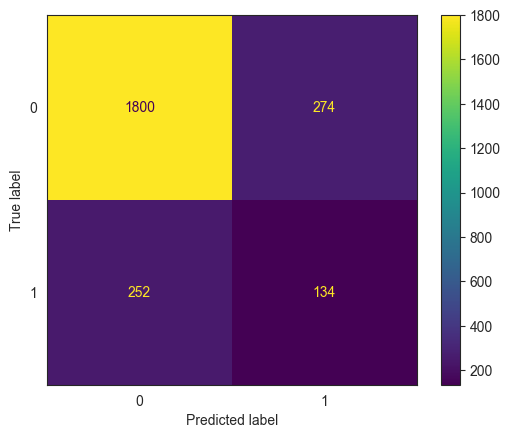

In [122]:
sns.set_style('white')
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred_dt_test) # type: ignore
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot() # type: ignore

In [123]:
from sklearn.tree import DecisionTreeClassifier

%time
dt_custom = DecisionTreeClassifier(class_weight= class_weights, random_state=42)
dt_custom.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


DecisionTreeClassifier(class_weight={0: 0.5910970099028939,
                                     1: 3.2443271767810025},
                       random_state=42)

In [124]:
y_pred_dt_custom_train = dt_custom.predict(X_train)
y_pred_dt_custom_test = dt_custom.predict(X_test)

print('Recall Score:', recall_score(y_train, y_pred_dt_custom_train))
print('Recall Score:', recall_score(y_test, y_pred_dt_custom_test))
print('F1 Score:', f1_score(y_train, y_pred_dt_custom_train))
print('F1 Score:', f1_score(y_test, y_pred_dt_custom_test))

Recall Score: 1.0
Recall Score: 0.34974093264248707
F1 Score: 0.9966974900924703
F1 Score: 0.3479381443298969


<Figure size 1000x1000 with 0 Axes>

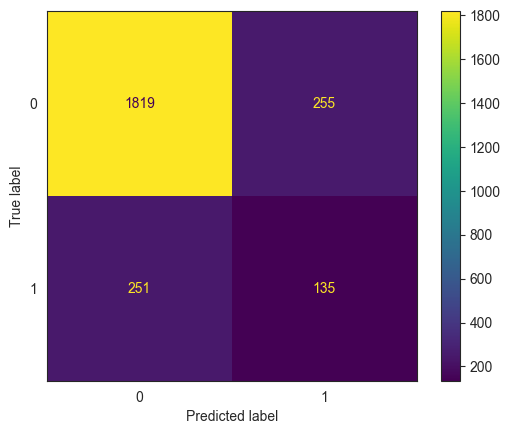

In [125]:
sns.set_style('white')
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred_dt_custom_test) # type: ignore
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot() # type: ignore

In [126]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

In [127]:
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

print('Recall Score:', recall_score(y_train, y_pred_rf_train))
print('Recall Score:', recall_score(y_test, y_pred_rf_test))
print('F1 Score:', f1_score(y_train, y_pred_rf_train))
print('F1 Score:', f1_score(y_test, y_pred_rf_test))

Recall Score: 0.9940357852882704
Recall Score: 0.11139896373056994
F1 Score: 0.9970089730807578
F1 Score: 0.1958997722095672


<Figure size 1000x1000 with 0 Axes>

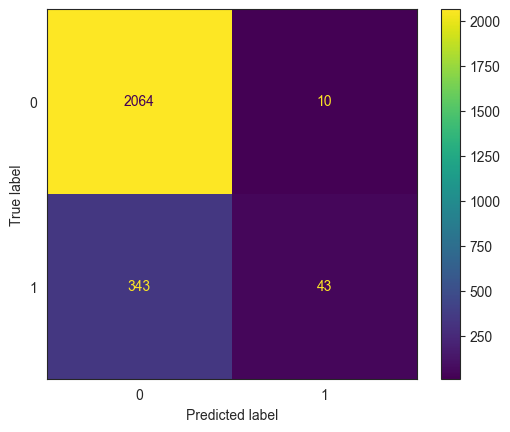

In [128]:
sns.set_style('white')
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred_rf_test) # type: ignore
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot() # type: ignore

#### Oversampling

In [129]:
from sklearn.tree import DecisionTreeClassifier

dt_smote = DecisionTreeClassifier(random_state=42)
dt_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

In [130]:
y_pred_dt_train_smote = dt_smote.predict(X_train_smote)
y_pred_dt_test_smote = dt_smote.predict(X_test_smote)

print('Recall Score:', recall_score(y_train_smote, y_pred_dt_train_smote))
print('Recall Score:', recall_score(y_test_smote, y_pred_dt_test_smote))
print('F1 Score:', f1_score(y_train_smote, y_pred_dt_train_smote))
print('F1 Score:', f1_score(y_test_smote, y_pred_dt_test_smote))

Recall Score: 0.997471402769416
Recall Score: 0.8530534351145038
F1 Score: 0.997471402769416
F1 Score: 0.8188687886420883


<Figure size 1000x1000 with 0 Axes>

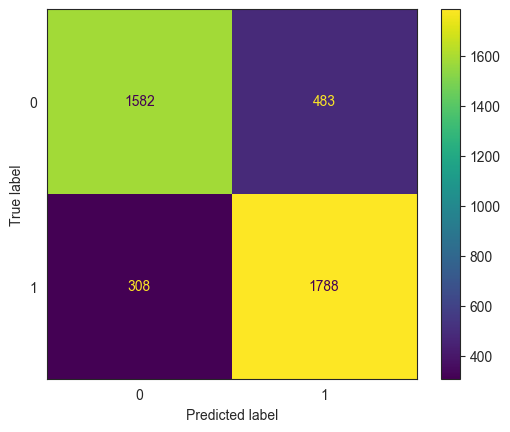

In [131]:
sns.set_style('white')
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test_smote, y_pred_dt_test_smote) # type: ignore
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot() # type: ignore

In [132]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote.values.ravel())

RandomForestClassifier(random_state=42)

In [133]:
y_pred_rf_train_smote = rf.predict(X_train_smote)
y_pred_rf_test_smote = rf.predict(X_test_smote)

print('Recall Score:', recall_score(y_train_smote, y_pred_rf_train_smote))
print('Recall Score:', recall_score(y_test_smote, y_pred_rf_test_smote))
print('F1 Score:', f1_score(y_train_smote, y_pred_rf_train_smote))
print('F1 Score:', f1_score(y_test_smote, y_pred_rf_test_smote))

Recall Score: 0.9986754966887417
Recall Score: 0.8668893129770993
F1 Score: 0.9974744437763079
F1 Score: 0.8758737045071101


<Figure size 1000x1000 with 0 Axes>

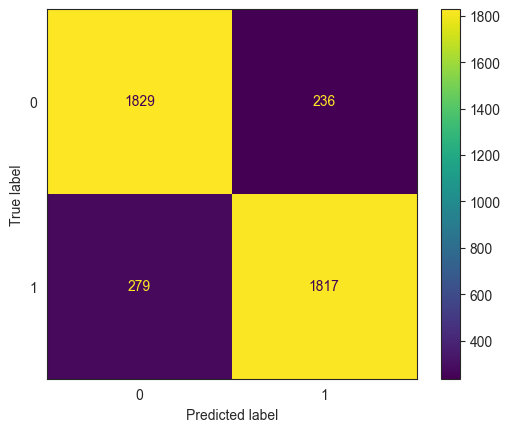

In [134]:
sns.set_style('white')
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test_smote, y_pred_rf_test_smote) # type: ignore
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot() # type: ignore

#### Hyperparameter Tuning

In [135]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': (4,5,6,7,8,9,10,11,12,13,14,15)
}

# we will use F1 score
dtc_gridcv = GridSearchCV(dt, parameters, cv=5, scoring='recall')
dtc_gridcv.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': (4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15)},
             scoring='recall')

In [136]:
gridcv_result = pd.DataFrame(dtc_gridcv.cv_results_) #type: ignore
cols = ['params', 'mean_test_score','rank_test_score']
gridcv_result[cols].sort_values('rank_test_score').head(10)

params  mean_test_score  rank_test_score
11  {'max_depth': 15}         0.858639                1
10  {'max_depth': 14}         0.848043                2
9   {'max_depth': 13}         0.837809                3
8   {'max_depth': 12}         0.836484                4
6   {'max_depth': 10}         0.833955                5
7   {'max_depth': 11}         0.832631                6
5    {'max_depth': 9}         0.787839                7
4    {'max_depth': 8}         0.783745                8
1    {'max_depth': 5}         0.773028                9
2    {'max_depth': 6}         0.761951               10

In [137]:
dtc_gridcv.best_estimator_

DecisionTreeClassifier(max_depth=15, random_state=42)

In [138]:
from sklearn.tree import DecisionTreeClassifier

dt_custom_14 = DecisionTreeClassifier(max_depth = 15, random_state=42)
dt_custom_14.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [139]:
y_pred_dt_train_smote = dt_custom_14.predict(X_train_smote)
y_pred_dt_test_smote = dt_custom_14.predict(X_test_smote)

print('Recall Score:', recall_score(y_train_smote, y_pred_dt_train_smote))
print('Recall Score:', recall_score(y_test_smote, y_pred_dt_test_smote))
print('F1 Score:', f1_score(y_train_smote, y_pred_dt_train_smote))
print('F1 Score:', f1_score(y_test_smote, y_pred_dt_test_smote))

Recall Score: 0.9287176399759182
Recall Score: 0.8525763358778626
F1 Score: 0.855716425361957
F1 Score: 0.7789886660854403


<Figure size 1000x1000 with 0 Axes>

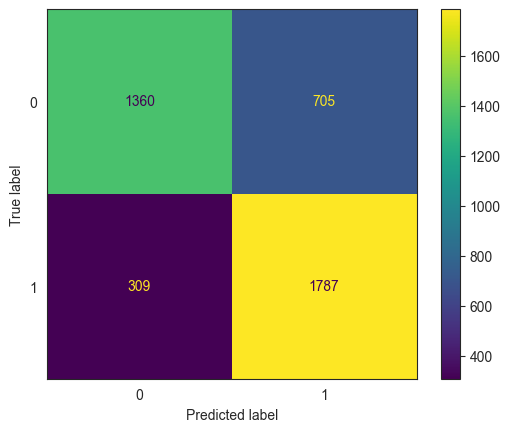

In [140]:
sns.set_style('white')
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test_smote, y_pred_dt_test_smote) # type: ignore
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot() # type: ignore

In [141]:
from sklearn.tree import DecisionTreeClassifier

dt_custom_cw_4 = DecisionTreeClassifier(class_weight= class_weights, max_depth=15, random_state=42)
dt_custom_cw_4.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(class_weight={0: 0.5910970099028939,
                                     1: 3.2443271767810025},
                       max_depth=15, random_state=42)

In [142]:
y_pred_dt_custom_train_smote = dt_custom_cw_4.predict(X_train_smote)
y_pred_dt_custom_test_smote = dt_custom_cw_4.predict(X_test_smote)

print('Recall Score:', recall_score(y_train_smote, y_pred_dt_custom_train_smote))
print('Recall Score:', recall_score(y_test_smote, y_pred_dt_custom_test_smote))
print('F1 Score:', f1_score(y_train_smote, y_pred_dt_custom_train_smote))
print('F1 Score:', f1_score(y_test_smote, y_pred_dt_custom_test_smote))

Recall Score: 0.9918121613485852
Recall Score: 0.924618320610687
F1 Score: 0.8170816387263168
F1 Score: 0.7574750830564784


<Figure size 1000x1000 with 0 Axes>

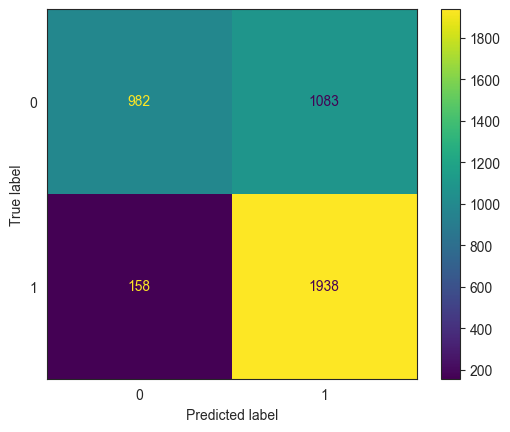

In [143]:
sns.set_style('white')
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test_smote, y_pred_dt_custom_test_smote) # type: ignore
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot() # type: ignore

In [144]:
result_df = pd.DataFrame({})

In [145]:
dfFeatures = pd.DataFrame({'Features':feature_names,'Importances':dt_custom_cw_4.feature_importances_})
dfFeatures.sort_values(by='Importances',ascending=False).head(10)

Features  Importances
4                       Hour_of_day     0.158977
1       Number_of_vehicles_involved     0.079684
0                Age_band_of_driver     0.069913
3              Age_band_of_casualty     0.067197
2              Number_of_casualties     0.060542
16  Type_of_vehicle_Lorry (41-100Q)     0.029691
37       Types_of_Junction_Crossing     0.026499
10            Day_of_week_Wednesday     0.024189
38    Types_of_Junction_No junction     0.023108
42        Types_of_Junction_Y Shape     0.022945

Notes for Streamlit:
- Visualize distribution plots with drop down filter
- Visualize time severity with Day, hours, week select box
- Use prediction model with drop down or input (hours, Day, number of vehicles, approx. number of casualties, area of incident, type of vehicle)